<a href="https://colab.research.google.com/github/ravi-gopalan/ipl_analysis/blob/master/ipl_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The objective is to create a prediction model to predict the outcome of cricket matches**
(Here, I am using the data of IPL matches.)

How do we go about this?

IPL is a treasure trove of cricketing data and hence analyzing IPL results could well prove to be interesting. Its played in the exciting 20–20 format. 

If we obtain encouraging results, we could then go ahead and create a prediction mechanism for the longer formats of the game.

* Business Understanding
* Data Understanding
* Prepare Data
* Data Modeling
* Evaluate the Results


In [2]:
!ls -la

total 16
drwxr-xr-x 1 root root 4096 Aug 27 16:17 .
drwxr-xr-x 1 root root 4096 Sep 16 12:35 ..
drwxr-xr-x 1 root root 4096 Sep  9 16:05 .config
drwxr-xr-x 1 root root 4096 Aug 27 16:17 sample_data


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
cd /content

/content


In [ ]:
!mkdir ipl

In [6]:
cd /root

/root


In [ ]:
# create .kaggle directory within /root
!mkdir .kaggle

In [ ]:
# copy the kaggle.json file onto /root so that you can use Kaggle API to download data
!cp '/content/gdrive/My Drive/Colab_stuff/kaggle.json' /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
cd /content/ipl

/content/ipl


In [10]:
!kaggle datasets download -d ravijee/ipl-2008-to-2019 -p /content/ipl

100% 4.07M/4.07M [00:00<00:00, 10.1MB/s]



In [11]:
!ls -la

total 4180
drwxr-xr-x 2 root root    4096 Sep 16 13:17 .
drwxr-xr-x 1 root root    4096 Sep 16 13:17 ..
-rw-r--r-- 1 root root 4268495 Sep 16 13:17 ipl-2008-to-2019.zip


In [ ]:
!unzip -q /content/ipl/ipl-2008-to-2019.zip

In [13]:
!ls -la

total 60900
drwxr-xr-x 2 root root     4096 Sep 16 13:17 .
drwxr-xr-x 1 root root     4096 Sep 16 13:17 ..
---------- 1 root root 55848188 Jun 18 00:41 ball_by_ball_details.csv
-rw-r--r-- 1 root root  4268495 Sep 16 13:17 ipl-2008-to-2019.zip
---------- 1 root root   166458 Jun 18 00:41 ipl_summary.csv
---------- 1 root root  2060580 Jun 18 00:41 ipl.zip


The YAML files within ipl.zip have been processed to create 2 csv files - `ipl_summary.csv` and `ball_by_ball_details.csv`. We'll use these 2 files for all our analysis

# Basic Processing of Data

Import necessary libraries - 
* Data Processing - `pandas`, `numpy`, `datetime`, `joblib`, `timeit` 
* Data Visualization - `matplotlib.pyplot`, `matplotlib.gridspec`, `seaborn` 
* Folder Operations - `pathlib`
* Modeling - `sklearn`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from pathlib import Path
import joblib
import timeit
import datetime as dt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier



In [ ]:
base_dir = Path('/content/ipl')

## Create base DataFrames 
### `df_match_summary` for summary data processing
### prep `df_match_summary` to simpify


In [16]:
df_match_summary = pd.read_csv('ipl_summary.csv')
df_match_summary.head()

,match_id,city,competition,decision,eliminator,gender,match_type,method,neutral_venue,#_of_overs,player_of_match,result,teams,umpires,venue,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date,season
0,548314,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,['RG Sharma'],NaN,"['Deccan Chargers', 'Mumbai Indians']","['AK Chaudhary', 'JD Cloete']",Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Mumbai Indians,Deccan Chargers,NaN,5.0,2012-04-09,2012
1,1178429,Bengaluru,IPL,field,NaN,male,T20,NaN,NaN,20,['SO Hetmyer'],NaN,"['Royal Challengers Bangalore', 'Sunrisers Hyd...","['NJ Llong', 'AK Chaudhary']",M.Chinnaswamy Stadium,Royal Challengers Bangalore,Royal Challengers Bangalore,NaN,4.0,2019-05-04,2019
2,419157,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,['R McLaren'],NaN,"['Royal Challengers Bangalore', 'Mumbai Indians']","['HDPK Dharmasena', 'SJA Taufel']",M Chinnaswamy Stadium,Mumbai Indians,Royal Challengers Bangalore,57.0,NaN,2010-04-17,2010
3,548375,Pune,IPL,bat,NaN,male,T20,NaN,NaN,20,['Shakib Al Hasan'],NaN,"['Pune Warriors', 'Kolkata Knight Riders']","['S Asnani', 'BR Doctrove']",Subrata Roy Sahara Stadium,Kolkata Knight Riders,Kolkata Knight Riders,34.0,NaN,2012-05-19,2012
4,392234,Durban,IPL,bat,NaN,male,T20,NaN,1.0,20,['M Muralitharan'],NaN,"['Chennai Super Kings', 'Kings XI Punjab']","['BG Jerling', 'SJA Taufel']",Kingsmead,Chennai Super Kings,Chennai Super Kings,24.0,NaN,2009-05-20,2009


In [17]:
df_match_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 21 columns):
match_id              756 non-null int64
city                  743 non-null object
competition           756 non-null object
decision              756 non-null object
eliminator            9 non-null object
gender                756 non-null object
match_type            756 non-null object
method                19 non-null object
neutral_venue         77 non-null float64
#_of_overs            756 non-null int64
player_of_match       752 non-null object
result                13 non-null object
teams                 756 non-null object
umpires               755 non-null object
venue                 756 non-null object
winner                756 non-null object
winner_toss           743 non-null object
outcome_by_runs       337 non-null float64
outcome_by_wickets    406 non-null float64
match_date            756 non-null object
season                756 non-null int64
dtypes: float64(3)

### The DataFrame has 756 rows of information in 21 columns in total with an integer index. 
Each row represents a match in the IPL for e.g. match_id 548314 was played in Vishakapatnam between Deccan Chargers and Mumbai Indians on 9th April 2012. Deccan Chargers won the toss and decided to bat. The match was won by Mumbai Indians by 5 wickets and RG Sharma was the player of the match. This match was officiated by AK Chaudhary and JD Cloete. This type of rich summary information is available for each match. There are a few rows where information is not available for all rows.




## Create base DataFrames 
### `df_details` for detailed data processing
### prep the `df_details` DataFrame

In [18]:
# There is no need to load the match_summary fields onto details these can always be linked by the match_id
# Use usecols to read only the fields needed for processing

df_details = pd.read_csv('ball_by_ball_details.csv',\
                         usecols=lambda column : column not in ['Unnamed: 0' ,'city','venue','competition',\
                                                                'decision','eliminator','gender','match_type',\
                                                               'method','neutral_venue','#_of_overs','player_of_match',\
                                                               'result','teams','umpires','winner','winner_toss',\
                                                                'outcome_by_runs','outcome_by_wickets',\
                                                               'match_date','season'])
df_details.head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,fielders,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,over
0,PA Patel,0.0,Deccan Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,NaN,inning_1,0.1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,1
1,PA Patel,0.0,Deccan Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,NaN,inning_1,0.2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,1
2,PA Patel,1.0,Deccan Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,NaN,inning_1,0.3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,1
3,S Dhawan,0.0,Deccan Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,NaN,inning_1,0.4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,1
4,S Dhawan,0.0,Deccan Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,NaN,inning_1,0.5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,1


In [19]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 20 columns):
batsman         178940 non-null object
batsman_runs    178940 non-null float64
batting_team    178949 non-null object
bowler          178940 non-null object
byes            480 non-null float64
extras_runs     178299 non-null float64
fielders        6338 non-null object
kind            8827 non-null object
legbyes         2933 non-null float64
inning          178949 non-null object
delivery        178949 non-null float64
match_id        178949 non-null int64
noballs         712 non-null float64
non_striker     178940 non-null object
player_out      8827 non-null object
total           178940 non-null float64
wides           5405 non-null float64
non_boundary    14 non-null float64
penalty         2 non-null float64
over            178949 non-null int64
dtypes: float64(10), int64(2), object(8)
memory usage: 27.3+ MB


### The DataFrame has 178949 rows of information in 20 columns in total with an integer index. 
Each row represents an individual delivery in the IPL and represent what happened in each ball. for e.g. match_id 548314 - PA Patel was the batsman who faced the 0.1 delivery of the 1st over that was bowled by Harbhajan Singh and the non-striker was S Dhawan. There was no run scored off the ball.

# Prepare Data

### Let's first look at the `df_match_summary` dataframe and prepare the data further
Match_date is coded as a string. Lets change it to date. We are going to perform analysis by year/season. Lets create a season variable

In [20]:
df_match_summary['match_date'] = pd.to_datetime(df_match_summary['match_date'])
df_match_summary['season'] = df_match_summary['match_date'].dt.year
df_match_summary.head(2)

,match_id,city,competition,decision,eliminator,gender,match_type,method,neutral_venue,#_of_overs,player_of_match,result,teams,umpires,venue,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date,season
0,548314,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,['RG Sharma'],NaN,"['Deccan Chargers', 'Mumbai Indians']","['AK Chaudhary', 'JD Cloete']",Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Mumbai Indians,Deccan Chargers,NaN,5.0,2012-04-09,2012
1,1178429,Bengaluru,IPL,field,NaN,male,T20,NaN,NaN,20,['SO Hetmyer'],NaN,"['Royal Challengers Bangalore', 'Sunrisers Hyd...","['NJ Llong', 'AK Chaudhary']",M.Chinnaswamy Stadium,Royal Challengers Bangalore,Royal Challengers Bangalore,NaN,4.0,2019-05-04,2019


Some of the data is provided as lists within square brackets 
simplify them by removing the brackets, quotes etc

*   `player_of_match` - represents the best player in the match - remove brackets and quotes
*   `teams` - represents the two teams in the match as a list - lets simplify them as `team_1` and `team_2`
*   `umpires` - represents all the umpires in the match, usually 2 per match but there could be more - lets simplify them by creating as many umpire columns as required
*  team names - lets abbreviate and standardize the team-names
* `decision` - rename to `toss_decision` as this corresponds to the decision of the winner of the toss



In [ ]:
df_match_summary['player_of_match'] = df_match_summary['player_of_match'].str[2:-2]
df_match_summary.rename(columns={'decision':'toss_decision'}, inplace=True)

In [22]:
# create a teams DataFrame df_teams to process the changes to the teamnames and simplification

df_teams = pd.DataFrame(df_match_summary.teams.str.split(',',n=2,expand=True))
df_teams.rename(columns={0:'team_1',1:'team_2'},inplace=True)
df_teams.team_1 = df_teams.team_1.str[2:-1] 
df_teams.team_2 = df_teams.team_2.str[2:-2] 
df_teams.head()

,team_1,team_2
0,Deccan Chargers,Mumbai Indians
1,Royal Challengers Bangalore,Sunrisers Hyderabad
2,Royal Challengers Bangalore,Mumbai Indians
3,Pune Warriors,Kolkata Knight Riders
4,Chennai Super Kings,Kings XI Punjab


In [23]:
# create an umpires DataFrame df_umpires to process the changes to the umpires field and simplification
df_umpires = pd.DataFrame(df_match_summary.umpires.str.split(',',n=4,expand=True))
df_umpires.rename(columns={0:'umpire_1',1:'umpire_2',2:'umpire_3',3:'umpire_4'},inplace=True)
df_umpires.umpire_1 = df_umpires.umpire_1.str[2:-1] 
df_umpires.umpire_2 = df_umpires.umpire_2.str[2:-2]
df_umpires.umpire_3 = df_umpires.umpire_3.str[2:-2]
df_umpires.umpire_4 = df_umpires.umpire_4.str[2:-2]

df_umpires.head()

,umpire_1,umpire_2,umpire_3,umpire_4
0,AK Chaudhary,JD Cloete,None,None
1,NJ Llong,AK Chaudhary,None,None
2,HDPK Dharmasena,SJA Taufel,None,None
3,S Asnani,BR Doctrove,None,None
4,BG Jerling,SJA Taufel,None,None


Join the teams and umpires back to the summary DataFrame `df_match_summary`

In [ ]:
df_match_summary = df_match_summary.join(df_teams) 
df_match_summary = df_match_summary.join(df_umpires) 
df_match_summary.drop(['teams','umpires'], axis=1, inplace=True)

In [ ]:
# The Rising Pune Supergiants and Rising Pune Supergiant team have been coded as RPS because the team_name was changed
team_names = {'Rajasthan Royals':'RR',\
              'Mumbai Indians' : 'MI',\
              'Delhi Daredevils':'DD',\
              'Kolkata Knight Riders':'KKR',\
              'Kings XI Punjab':'KXP',\
              'Sunrisers Hyderabad':'SRH',\
              'Deccan Chargers':'DC-Chargers',\
              'Chennai Super Kings':'CSK',\
              'Rising Pune Supergiants':'RPS',\
              'Royal Challengers Bangalore':'RCB',\
              'Pune Warriors':'PW',\
              'Gujarat Lions':'GL',\
              'Delhi Capitals':'DC-Capitals',\
              'Rising Pune Supergiant':'RPS',\
              'Kochi Tuskers Kerala':'KTK'
             }

Map team names to abbreviations and standardize names

In [ ]:
df_match_summary['winner_toss'] = df_match_summary['winner_toss'].map(team_names)
df_match_summary['winner'] = df_match_summary['winner'].map(team_names)
df_match_summary['team_1'] = df_match_summary['team_1'].map(team_names)
df_match_summary['team_2'] = df_match_summary['team_2'].map(team_names)

Some of the columns are obvious in this dataset and don't change
*  `competition` which is always IPL 
*  `gender` which is always male
*  `match_type` which is always T20
*  `#_of_overs` which is always 20
Remove these columns

In [ ]:
df_match_summary.drop(['competition','gender','match_type','#_of_overs'], axis=1, inplace=True)

Does the `city` and `venue` columns make any difference?
The venue and city can be combined and simplified to create a single field `venue` 

In [ ]:
venue_names = {'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium':'YSR Visakhapatnam','M.Chinnaswamy Stadium':'Chinnaswamy, Bengaluru','M Chinnaswamy Stadium':'Chinnaswamy, Bengaluru',
               'Subrata Roy Sahara Stadium':'Sahara, Pune','Kingsmead':'Kingsmead, Durban','Wankhede Stadium':'Wankhede, Mumbai','Dr DY Patil Sports Academy':'DY Patil, Mumbai',
               'Brabourne Stadium':'Brabourne, Mumbai','Eden Gardens':'Eden Gardens, Kolkata','Sawai Mansingh Stadium':'Sawai Mansingh, Jaipur','Newlands':'Newlands, Capetown',
               'Himachal Pradesh Cricket Association Stadium':'HPCA, Dharamsala','Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi, Hyderabad','JSCA International Stadium Complex':'JSCA, Ranchi',
               'Maharashtra Cricket Association Stadium':'MCAS, Pune','Feroz Shah Kotla':'Feroz Shah Kotla, Delhi','De Beers Diamond Oval':'De Beers, Kimberley',
               'MA Chidambaram Stadium, Chepauk':'MA Chidambaram Stadium, Chennai','Punjab Cricket Association IS Bindra Stadium, Mohali':'PCA, Mohali','Nehru Stadium':'Nehru, Kochi',
               'Green Park':'Green Park, Kanpur','Saurashtra Cricket Association Stadium':'SCA, Rajkot','Vidarbha Cricket Association Stadium, Jamtha':'VCA, Nagpur',
               'Punjab Cricket Association Stadium, Mohali':'PCA, Mohali','Shaheed Veer Narayan Singh International Stadium':'Shaheed Veer Narayan Singh, Raipur',
               'SuperSport Park':'Centurion, Gauteng','Holkar Cricket Stadium':'Holkar, Indore','Sardar Patel Stadium, Motera':'Sardar Patel, Ahmedabad','Barabati Stadium':'Barabati, Cuttack',
               'Sharjah Cricket Stadium':'Sharjah','Dubai International Cricket Stadium':'Dubai','Sheikh Zayed Stadium':'Abu Dhabi','OUTsurance Oval':'Bloemfontein',
               "St George's Park":'Port Elizabeth','Buffalo Park':'East London','New Wanderers Stadium':'Johannesburg'}

In [29]:
df_match_summary['venue'] = df_match_summary['venue'].map(venue_names)
df_match_summary.drop(['city'], axis=1, inplace=True)
df_match_summary.to_csv('match_summary.csv')
df_match_summary.head()

,match_id,toss_decision,eliminator,method,neutral_venue,player_of_match,result,venue,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date,season,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4
0,548314,bat,NaN,NaN,NaN,RG Sharma,NaN,YSR Visakhapatnam,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
1,1178429,field,NaN,NaN,NaN,SO Hetmyer,NaN,"Chinnaswamy, Bengaluru",RCB,RCB,NaN,4.0,2019-05-04,2019,RCB,SRH,NJ Llong,AK Chaudhary,None,None
2,419157,field,NaN,NaN,NaN,R McLaren,NaN,"Chinnaswamy, Bengaluru",MI,RCB,57.0,NaN,2010-04-17,2010,RCB,MI,HDPK Dharmasena,SJA Taufel,None,None
3,548375,bat,NaN,NaN,NaN,Shakib Al Hasan,NaN,"Sahara, Pune",KKR,KKR,34.0,NaN,2012-05-19,2012,PW,KKR,S Asnani,BR Doctrove,None,None
4,392234,bat,NaN,NaN,1.0,M Muralitharan,NaN,"Kingsmead, Durban",CSK,CSK,24.0,NaN,2009-05-20,2009,CSK,KXP,BG Jerling,SJA Taufel,None,None


## Store the simplified match_summary file as a csv 

## Now, lets look at how we can prepare the df_details DataFrame further

In [ ]:
# Simplify the team_names
df_details['batting_team'] = df_details['batting_team'].map(team_names)

### Process fielders column
fielders column is a list of all fielders involved in a run_out;
we'll need the specific fielder involved in the run-out
create 3 fielder columns to get exact individuals

Clean the columns and join them back

In [31]:
# create df_fielders to isolate the fielders involved
df_fielders = pd.DataFrame(df_details.fielders.str.split(',',n=2,expand=True))


df_fielders.rename(columns={0:'fielder_1',1:'fielder_2',2:'fielder_3'},inplace=True)

df_fielders.replace(regex=True,inplace=True,to_replace=[r"\[",r"\]",r"\'"],value=[r"",r"",r""])
print(df_fielders[df_fielders['fielder_1'].notnull() & df_fielders['fielder_2'].notnull() & df_fielders['fielder_3'].notnull()].head(5))
print(df_fielders[df_fielders['fielder_1'].notnull()].head(5))
# join the fielders column back to the df_details dataframe and drop the 'fielders' column
df_details = df_details.join(df_fielders)
df_details.drop(['fielders'], axis=1, inplace=True)

             fielder_1     fielder_2   fielder_3
26055           Z Khan       KK Nair   Q de Kock
27099        STR Binny   Sachin Baby   KK Cooper
30038          M Vijay      MS Dhoni   JA Morkel
64223           P Negi     CH Morris   Q de Kock
90188  Joginder Sharma      JDP Oram    MS Dhoni
      fielder_1 fielder_2 fielder_3
9     RG Sharma      None      None
18   SL Malinga      None      None
41   KA Pollard      None      None
109  KA Pollard      None      None
113    MM Patel      None      None


In [32]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 22 columns):
batsman         178940 non-null object
batsman_runs    178940 non-null float64
batting_team    178949 non-null object
bowler          178940 non-null object
byes            480 non-null float64
extras_runs     178299 non-null float64
kind            8827 non-null object
legbyes         2933 non-null float64
inning          178949 non-null object
delivery        178949 non-null float64
match_id        178949 non-null int64
noballs         712 non-null float64
non_striker     178940 non-null object
player_out      8827 non-null object
total           178940 non-null float64
wides           5405 non-null float64
non_boundary    14 non-null float64
penalty         2 non-null float64
over            178949 non-null int64
fielder_1       6338 non-null object
fielder_2       391 non-null object
fielder_3       11 non-null object
dtypes: float64(10), int64(2), object(10)
memory usage:

## Determine the over from the delivery
## Determine which quarter of the inning the delivery belongs to

In [ ]:
# create a delivery mapping which maps each delivery to the over it corresponds to; 
# Each over generally contains 6 deliveries but there are a few additional deliveries if there are wides and no-balls
delivery_map = {'0.1': '1','0.2': '2', '0.3': '3', '0.4': '4', '0.5': '5', '0.6': '6', '0.7': '7', '0.8': '8', '0.9': '9',\
         '1.1': '1','1.2': '2', '1.3': '3', '1.4': '4', '1.5': '5', '1.6': '6', '1.7': '7', '1.8': '8', '1.9': '9',\
         '2.1': '1','2.2': '2', '2.3': '3', '2.4': '4', '2.5': '5', '2.6': '6', '2.7': '7', '2.8': '8', '2.9': '9',\
         '3.1': '1','3.2': '2', '3.3': '3', '3.4': '4', '3.5': '5', '3.6': '6', '3.7': '7', '3.8': '8', '3.9': '9',\
         '4.1': '1','4.2': '2', '4.3': '3', '4.4': '4', '4.5': '5', '4.6': '6', '4.7': '7', '4.8': '8', '4.9': '9',\
         '5.1': '1','5.2': '2', '5.3': '3', '5.4': '4', '5.5': '5', '5.6': '6', '5.7': '7', '5.8': '8', '5.9': '9',\
         '6.1': '1','6.2': '2', '6.3': '3', '6.4': '4', '6.5': '5', '6.6': '6', '6.7': '7', '6.8': '8', '6.9': '9',\
         '7.1': '1','7.2': '2', '7.3': '3', '7.4': '4', '7.5': '5', '7.6': '6', '7.7': '7', '7.8': '8', '7.9': '9',\
         '8.1': '1','8.2': '2', '8.3': '3', '8.4': '4', '8.5': '5', '8.6': '6', '8.7': '7', '8.8': '8', '8.9': '9',\
         '9.1': '1','9.2': '2', '9.3': '3', '9.4': '4', '9.5': '5', '9.6': '6', '9.7': '7', '9.8': '8', '9.9': '9',\
         '10.1': '1','10.2': '2', '10.3': '3', '10.4': '4', '10.5': '5', '10.6': '6', '10.7': '7', '10.8': '8', '10.9': '9',\
         '11.1': '1','11.2': '2', '11.3': '3', '11.4': '4', '11.5': '5', '11.6': '6', '11.7': '7', '11.8': '8', '11.9': '9',\
         '12.1': '1','12.2': '2', '12.3': '3', '12.4': '4', '12.5': '5', '12.6': '6', '12.7': '7', '12.8': '8', '12.9': '9',\
         '13.1': '1','13.2': '2', '13.3': '3', '13.4': '4', '13.5': '5', '13.6': '6', '13.7': '7', '13.8': '8', '13.9': '9',\
         '14.1': '1','14.2': '2', '14.3': '3', '14.4': '4', '14.5': '5', '14.6': '6', '14.7': '7', '14.8': '8', '14.9': '9',\
         '15.1': '1','15.2': '2', '15.3': '3', '15.4': '4', '15.5': '5', '15.6': '6', '15.7': '7', '15.8': '8', '15.9': '9',\
         '16.1': '1','16.2': '2', '16.3': '3', '16.4': '4', '16.5': '5', '16.6': '6', '16.7': '7', '16.8': '8', '16.9': '9',\
         '17.1': '1','17.2': '2', '17.3': '3', '17.4': '4', '17.5': '5', '17.6': '6', '17.7': '7', '17.8': '8', '17.9': '9',\
         '18.1': '1','18.2': '2', '18.3': '3', '18.4': '4', '18.5': '5', '18.6': '6', '18.7': '7', '18.8': '8', '18.9': '9',\
         '19.1': '1','19.2': '2', '19.3': '3', '19.4': '4', '19.5': '5', '19.6': '6', '19.7': '7', '19.8': '8', '19.9': '9',\
        }
df_details['delivery'] = df_details['delivery'].astype(str)
df_details['delivery_in_over'] = df_details['delivery'].map(delivery_map)

In [ ]:
# Divide each inning into 4 quarters i.e. overs 1-5 in Q1, 6-10 in Q2, 11-15 in Q3 and 16-20 in Q4
df_details['over'] = df_details['over'].astype(str)
inning_quarter = {'1': 'Q1','2': 'Q1', '3': 'Q1', '4': 'Q1', '5': 'Q1', \
                '6': 'Q2', '7': 'Q2', '8': 'Q2', '9': 'Q2', '10': 'Q2',\
                '11': 'Q3','12': 'Q3', '13': 'Q3', '14': 'Q3', '15': 'Q3',\
                '16': 'Q4', '17': 'Q4', '18': 'Q4', '19': 'Q4', '20': 'Q4'\
                }
df_details['inning_quarter'] = df_details['over'].map(inning_quarter)

In [35]:
df_details.head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,over,fielder_1,fielder_2,fielder_3,delivery_in_over,inning_quarter
0,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,1,Q1
1,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1
2,PA Patel,1.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,1,NaN,NaN,NaN,3,Q1
3,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,4,Q1
4,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,5,Q1


## Apart from runs scored, batting averages and strike rates will be very important in this analysis
### Determing the batsmen who were 'undefeated' in an inning or 'Not outs' as they are more commonly called are very important in the determination of batting averages. so we need to determine the dismissals

In [36]:
# Find out all the instances in the IPL where there has been a dismissal - i.e. where player_out is not a NaN
df_details[df_details.player_out.notna()].head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,over,fielder_1,fielder_2,fielder_3,delivery_in_over,inning_quarter
9,PA Patel,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,1.4,548314,NaN,S Dhawan,PA Patel,0.0,NaN,NaN,NaN,2,RG Sharma,None,None,4,Q1
18,B Chipli,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,3.1,548314,NaN,S Dhawan,B Chipli,0.0,NaN,NaN,NaN,4,SL Malinga,None,None,1,Q1
41,S Dhawan,0.0,DC-Chargers,SL Malinga,NaN,0.0,caught,NaN,inning_1,6.6,548314,NaN,DT Christian,S Dhawan,0.0,NaN,NaN,NaN,7,KA Pollard,None,None,6,Q2
75,KC Sangakkara,0.0,DC-Chargers,MM Patel,NaN,0.0,bowled,NaN,inning_1,12.3,548314,NaN,DT Christian,KC Sangakkara,0.0,NaN,NaN,NaN,13,NaN,NaN,NaN,3,Q3
109,DT Christian,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,17.6,548314,NaN,CL White,DT Christian,0.0,NaN,NaN,NaN,18,KA Pollard,None,None,6,Q4


In [37]:
# What are the different kinds of dismissals
# Except for nan the rest are all a mode of dismissal 
df_details['kind'].unique()

array([nan, 'caught', 'bowled', 'caught and bowled', 'lbw', 'stumped',
       'run out', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

### Create functions to ensure catches and wickets are correctly attributed to the right individuals 

In [ ]:
# determine the player to whom the catches and wickets are attributed to
def attribute_catch (row):
  '''
  This function takes a row as an input and determines who gets credit for a catch.
  Catches can be taken by a fielder in a normal 'caught' scenario and can also be taken by a bowler in a 'caught and bowled' scenario.
  If there was no catch taken, there is no point in crediting anyone with a catch
  INPUT: A row column from a DataFrame
  OUTPUT: value from either fielder_1 column or bowler column or None
  '''
  if row['kind'] == 'caught':
    value = row['fielder_1']
  elif row['kind'] == 'caught and bowled':
    value = row['bowler']
  else:
    value = None
  return value

# The column 'catch_attributed_to' is populated by applying the lambda function 'attribute_catch' along the entire dataframe.
# The result of applying this function will ensure that whenever the dismissal was a 'caught' or 'caught and bowled' the right team member is given credit   
df_details['catch_attributed_to'] = df_details.apply (lambda row: attribute_catch(row), axis=1)

# determine the player to whom the wickets are attributed to
def attribute_wicket (row):
  '''
  This function takes a row as an input and determines who gets credit for a wicket.
  There are 9 modes of dismissals of a player, i.e. 'caught', 'bowled', 'caught and bowled', 
  'lbw', 'stumped', 'run out', 'retired hurt', 'hit wicket', 'obstructing the field'
  The wicket is attributed to the bowler in most of the cases except 'run out', 'retired hurt' and 'obstructing the field'
  This function enables the attribution of the wicket

  INPUT: A row column from a DataFrame
  OUTPUT: value from either bowler column or None
  '''

  if row['kind'] == 'caught':
    value = row['bowler']
  elif row['kind'] == 'lbw':
    value = row['bowler']
  elif row['kind'] == 'stumped':
    value = row['bowler']
  elif row['kind'] == 'bowled':
    value = row['bowler']
  elif row['kind'] == 'hit wicket':
    value = row['bowler']
  elif row['kind'] == 'caught and bowled':
    value = row['bowler']
  else:
    value = None
  return value
# The column 'wicket_attributed_to' is populated by applying the lambda function 'attribute_wicket' along the entire dataframe.
# The result of applying this function will ensure that whenever the dismissal is 'caught', 'caught and bowled', 'stumped' , 'lbw', 'bowled' or 'hit wicket' the bowler is given credit   
df_details['wicket_attributed_to'] = df_details.apply( lambda row: attribute_wicket(row), axis = 1)

In [39]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 26 columns):
batsman                 178940 non-null object
batsman_runs            178940 non-null float64
batting_team            178949 non-null object
bowler                  178940 non-null object
byes                    480 non-null float64
extras_runs             178299 non-null float64
kind                    8827 non-null object
legbyes                 2933 non-null float64
inning                  178949 non-null object
delivery                178949 non-null object
match_id                178949 non-null int64
noballs                 712 non-null float64
non_striker             178940 non-null object
player_out              8827 non-null object
total                   178940 non-null float64
wides                   5405 non-null float64
non_boundary            14 non-null float64
penalty                 2 non-null float64
over                    178949 non-null object
fielder_1  

### Based on the attribute_wicket function, the top wicket takers are as follows:

In [40]:
# Top 10 wicket takers
df_details['wicket_attributed_to'].value_counts()[0:10]

SL Malinga         170
A Mishra           157
Harbhajan Singh    150
PP Chawla          150
DJ Bravo           147
B Kumar            133
R Ashwin           125
SP Narine          122
UT Yadav           119
RA Jadeja          108
Name: wicket_attributed_to, dtype: int64

### Based on the attribute_catch function, the top catchers are the following:

In [41]:
# Top 10 fielders with catches
df_details['catch_attributed_to'].value_counts()[0:10]

KD Karthik        109
SK Raina          102
MS Dhoni           98
AB de Villiers     93
RV Uthappa         84
RG Sharma          83
KA Pollard         82
DJ Bravo           74
V Kohli            73
PA Patel           69
Name: catch_attributed_to, dtype: int64

### Lets add a few more features to the dataset




#### What was the result of each delivery in terms of the number of runs scored.
#### Did it go for a sixer or a four or was it a dot ball.  
Lets Flag each delivery that will enables us to then determine how many deliveries provided 1_run, 2_runs, 3_runs, 4_runs, 5_runs, 6_runs and  dot_balls,

In [ ]:
def flag_boundary_4 (row):
  '''
  This function takes a row as an input and provides a flag for the number of runs scored.
  This function flags those deliveries that yielded 4 runs.

  INPUT: A row column from a DataFrame
  OUTPUT: value of 1 or None
  '''  
  if row['batsman_runs'] == 4.0:
    value = 1
  else:
    value = None  
  return value

def flag_boundary_6 (row):
  '''
  This function takes a row as an input and provides a flag for the number of runs scored.
  This function flags those deliveries that yielded 6 runs.

  INPUT: A row column from a DataFrame
  OUTPUT: value of 1 or None
  ''' 
  if row['batsman_runs'] == 6.0:
    value = 1
  else:
    value = None  
  return value

def flag_dot_ball (row):
  '''
  This function takes a row as an input and provides a flag for the number of runs scored.
  This function flags those deliveries that yielded 0 runs.

  INPUT: A row column from a DataFrame
  OUTPUT: value of 1 or None
  '''   
  if row['batsman_runs'] == 0.0:
    value = 1
  else:
    value = None  
  return value
  
  
def flag_1_run_ball (row):
  '''
  This function takes a row as an input and provides a flag for the number of runs scored.
  This function flags those deliveries that yielded 1 runs.

  INPUT: A row column from a DataFrame
  OUTPUT: value of 1 or None
  '''   
  if row['batsman_runs'] == 1.0:
    value = 1
  else:
    value = None  
  return value
  
def flag_2_run_ball (row):
  '''
  This function takes a row as an input and provides a flag for the number of runs scored.
  This function flags those deliveries that yielded 2 runs.

  INPUT: A row column from a DataFrame
  OUTPUT: value of 1 or None
  '''   
  if row['batsman_runs'] == 2.0:
    value = 1
  else:
    value = None  
  return value

def flag_3_run_ball (row):
  '''
  This function takes a row as an input and provides a flag for the number of runs scored.
  This function flags those deliveries that yielded 3 runs.

  INPUT: A row column from a DataFrame
  OUTPUT: value of 1 or None
  '''   
  if row['batsman_runs'] == 3.0:
    value = 1
  else:
    value = None  
  return value
  
def flag_5_run_ball (row):
  '''
  This function takes a row as an input and provides a flag for the number of runs scored.
  This function flags those deliveries that yielded 5 runs.

  INPUT: A row column from a DataFrame
  OUTPUT: value of 1 or None
  '''   
  if row['batsman_runs'] == 5.0:
    value = 1
  else:
    value = None  
  return value
  
# 7 additional columns are created with flags 1 or None to indicate the number of runs the batsman scored off a delivery  
df_details['4_flag'] = df_details.apply(lambda row: flag_boundary_4(row), axis=1)
df_details['6_flag'] = df_details.apply( lambda row: flag_boundary_6(row), axis = 1)
df_details['dot_ball_flag'] = df_details.apply( lambda row: flag_dot_ball(row), axis = 1)
df_details['1_run_flag'] = df_details.apply( lambda row: flag_1_run_ball(row), axis = 1)
df_details['2_run_flag'] = df_details.apply( lambda row: flag_2_run_ball(row), axis = 1)
df_details['3_run_flag'] = df_details.apply( lambda row: flag_3_run_ball(row), axis = 1)
df_details['5_run_flag'] = df_details.apply( lambda row: flag_5_run_ball(row), axis = 1)

#### What was the mode of each dismissal

Lets Flag each delivery that will enables us to then determine how was the dismissal done. 
flag dismissal by type caught, lbw, bowled, stumped etc

In [ ]:
def flag_caught (row):
  '''
  This function takes a row as an input and provides a flag for the mode of dismissal.
  This function flags those dismissls that were 'caught'

  INPUT: A row column from a DataFrame
  OUTPUT: value of 1 or None
  '''   
  if row['kind'] == 'caught':
    value = 1
  else:
    value = None  
  return value

def flag_lbw (row):
  '''
  This function takes a row as an input and provides a flag for the mode of dismissal.
  This function flags those dismissls that were 'lbw'

  INPUT: A row column from a DataFrame
  OUTPUT: value of 1 or None
  '''   
  if row['kind'] == 'lbw':
    value = 1
  else:
    value = None  
  return value

def flag_stumped (row):
  '''
  This function takes a row as an input and provides a flag for the mode of dismissal.
  This function flags those dismissls that were 'stumped'

  INPUT: A row column from a DataFrame
  OUTPUT: value of 1 or None
  '''   
  if row['kind'] == 'stumped':
    value = 1
  else:
    value = None  
  return value
  
  
def flag_bowled (row):
  '''
  This function takes a row as an input and provides a flag for the mode of dismissal.
  This function flags those dismissls that were 'bowled'

  INPUT: A row column from a DataFrame
  OUTPUT: value of 1 or None
  '''   
  if row['kind'] == 'bowled':
    value = 1
  else:
    value = None  
  return value
  
def flag_run_out (row):
  '''
  This function takes a row as an input and provides a flag for the mode of dismissal.
  This function flags those dismissls that were 'run-out'

  INPUT: A row column from a DataFrame
  OUTPUT: value of 1 or None
  '''   
  if row['kind'] == 'run out':
    value = 1
  else:
    value = None  
  return value

def flag_hit_wicket (row):
  '''
  This function takes a row as an input and provides a flag for the mode of dismissal.
  This function flags those dismissls that were 'hit-wicket'

  INPUT: A row column from a DataFrame
  OUTPUT: value of 1 or None
  '''   
  if row['kind'] == 'hit wicket':
    value = 1
  else:
    value = None  
  return value
  
def flag_caught_and_bowled (row):
  '''
  This function takes a row as an input and provides a flag for the mode of dismissal.
  This function flags those dismissls that were 'caught and bowled'

  INPUT: A row column from a DataFrame
  OUTPUT: value of 1 or None
  '''   
  if row['kind'] == 'caught and bowled':
    value = 1
  else:
    value = None  
  return value

def flag_retired_hurt (row):
  '''
  This function takes a row as an input and provides a flag for the mode of dismissal.
  This function flags those dismissls that were 'retired hurt'

  INPUT: A row column from a DataFrame
  OUTPUT: value of 1 or None
  '''   
  if row['kind'] == 'retired hurt':
    value = 1
  else:
    value = None  
  return value

def flag_obstructing_the_field (row):
  '''
  This function takes a row as an input and provides a flag for the mode of dismissal.
  This function flags those dismissls that were 'obstructing the field'

  INPUT: A row column from a DataFrame
  OUTPUT: value of 1 or None
  '''   
  if row['kind'] == 'obstructing the field':
    value = 1
  else:
    value = None  
  return value  

# 9 additional columns are created with flags 1 or None to indicate the mode of dismissal  
df_details['caught_flag'] = df_details.apply(lambda row: flag_caught(row), axis=1)
df_details['lbw_flag'] = df_details.apply( lambda row: flag_lbw(row), axis = 1)
df_details['stumped_flag'] = df_details.apply( lambda row: flag_stumped(row), axis = 1)
df_details['bowled_flag'] = df_details.apply( lambda row: flag_bowled(row), axis = 1)
df_details['run_out_flag'] = df_details.apply( lambda row: flag_run_out(row), axis = 1)
df_details['hit_wicket_flag'] = df_details.apply( lambda row: flag_hit_wicket(row), axis = 1)
df_details['caught_and_bowled_flag'] = df_details.apply( lambda row: flag_caught_and_bowled(row), axis = 1)
df_details['retired_hurt_flag'] = df_details.apply( lambda row: flag_retired_hurt(row), axis = 1)
df_details['obstructing_the_field_flag'] = df_details.apply( lambda row: flag_obstructing_the_field(row), axis = 1)

#### Flag each extra - wide, noball, bye, legbye etc

In [ ]:
# Create 4 columns for the type of extras runs scored and populate the runs accordingly

df_details['wide_flag'] = df_details['wides'].notna()
df_details['noball_flag'] = df_details['noballs'].notna()
df_details['legbye_flag'] = df_details['legbyes'].notna()
df_details['bye_flag'] = df_details['byes'].notna()

In [45]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 46 columns):
batsman                       178940 non-null object
batsman_runs                  178940 non-null float64
batting_team                  178949 non-null object
bowler                        178940 non-null object
byes                          480 non-null float64
extras_runs                   178299 non-null float64
kind                          8827 non-null object
legbyes                       2933 non-null float64
inning                        178949 non-null object
delivery                      178949 non-null object
match_id                      178949 non-null int64
noballs                       712 non-null float64
non_striker                   178940 non-null object
player_out                    8827 non-null object
total                         178940 non-null float64
wides                         5405 non-null float64
non_boundary                  14 non-null float64

In [46]:
# As previously mentioned, determining the not outs is important in calculating averages
# A new dataframe df_not_out_check is first created with the relevant columns and duplicates are removed
df_not_out_check = df_details[['match_id','inning','batsman','player_out','kind']].drop_duplicates()
df_not_out_check.head(5)

,match_id,inning,batsman,player_out,kind
0,548314,inning_1,PA Patel,NaN,NaN
3,548314,inning_1,S Dhawan,NaN,NaN
9,548314,inning_1,PA Patel,PA Patel,caught
10,548314,inning_1,B Chipli,NaN,NaN
18,548314,inning_1,B Chipli,B Chipli,caught


In [47]:
# Determine who's out in the inning
def check_out(row):
  '''
  It takes a row from a DataFrame and determines who was dismissed. If there was a dismissal (and if the batsman was out, output the batsman, else, output the non-striker)
  INPUT: A row in a DataFrame
  OUTPUT: batsman or non-striker or none 
  '''
  if row['kind'] != 'NaN' and row['player_out'] == row['batsman']:
    value = row['batsman']
  elif row['kind'] !='NaN' and row['player_out'] != row['batsman']:
    value = row['player_out']
  else:
    value = None
  return value
# Populate the out column with the player who got out. (i.e. batsman or non-striker or none) 
df_not_out_check['out'] = df_not_out_check.apply(lambda row: check_out(row),axis=1)
df_not_out_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19703 entries, 0 to 178946
Data columns (total 6 columns):
match_id      19703 non-null int64
inning        19703 non-null object
batsman       19694 non-null object
player_out    8827 non-null object
kind          8827 non-null object
out           8827 non-null object
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [48]:
# check if the logic is applied ok for 'run out' mode
df_not_out_check.query('kind=="run out"').head()

,match_id,inning,batsman,player_out,kind,out
1011,392234,inning_1,GJ Bailey,GJ Bailey,run out,GJ Bailey
1102,392234,inning_1,T Thushara,T Thushara,run out,T Thushara
1550,598055,inning_1,AD Mathews,AD Mathews,run out,AD Mathews
2002,501235,inning_1,MK Pandey,Yuvraj Singh,run out,Yuvraj Singh
2049,501235,inning_1,R Sharma,R Sharma,run out,R Sharma


In [49]:
# Determine all the players who were out
df_not_out = df_not_out_check.groupby(['match_id','inning','player_out'],as_index=False)['out'].count()
df_not_out.head()

,match_id,inning,player_out,out
0,335982,inning_1,DJ Hussey,1
1,335982,inning_1,RT Ponting,1
2,335982,inning_1,SC Ganguly,1
3,335982,inning_2,AA Noffke,1
4,335982,inning_2,B Akhil,1


In [50]:
df_not_out.query('match_id =="335982"')

,match_id,inning,player_out,out
0,335982,inning_1,DJ Hussey,1
1,335982,inning_1,RT Ponting,1
2,335982,inning_1,SC Ganguly,1
3,335982,inning_2,AA Noffke,1
4,335982,inning_2,B Akhil,1
5,335982,inning_2,CL White,1
6,335982,inning_2,JH Kallis,1
7,335982,inning_2,MV Boucher,1
8,335982,inning_2,R Dravid,1
9,335982,inning_2,SB Joshi,1


In [51]:
df_not_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8827 entries, 0 to 8826
Data columns (total 4 columns):
match_id      8827 non-null int64
inning        8827 non-null object
player_out    8827 non-null object
out           8827 non-null int64
dtypes: int64(2), object(2)
memory usage: 344.8+ KB


#### Create csv files of these intermediate files

In [ ]:
df_not_out.to_csv('players_out_by_match_view.csv')
df_details.to_csv('cleansed_ball_by_ball_details.csv')

In [53]:
df_match_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 20 columns):
match_id              756 non-null int64
toss_decision         756 non-null object
eliminator            9 non-null object
method                19 non-null object
neutral_venue         77 non-null float64
player_of_match       752 non-null object
result                13 non-null object
venue                 756 non-null object
winner                756 non-null object
winner_toss           743 non-null object
outcome_by_runs       337 non-null float64
outcome_by_wickets    406 non-null float64
match_date            756 non-null datetime64[ns]
season                756 non-null int64
team_1                756 non-null object
team_2                756 non-null object
umpire_1              755 non-null object
umpire_2              755 non-null object
umpire_3              2 non-null object
umpire_4              1 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object

### Now, lets try to merge the summary and detail info

In [54]:
df_match_dates = df_match_summary[['match_id','match_date','season']]
df_match_dates.info()
df_match_dates.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 3 columns):
match_id      756 non-null int64
match_date    756 non-null datetime64[ns]
season        756 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 17.8 KB


,match_id,match_date,season
0,548314,2012-04-09,2012
1,1178429,2019-05-04,2019
2,419157,2010-04-17,2010
3,548375,2012-05-19,2012
4,392234,2009-05-20,2009


In [55]:
# Merge the season and match date to the df_details DataFrame 
df_details = df_details.merge(df_match_dates,how='left',left_on='match_id',right_on='match_id')
df_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178949 entries, 0 to 178948
Data columns (total 48 columns):
batsman                       178940 non-null object
batsman_runs                  178940 non-null float64
batting_team                  178949 non-null object
bowler                        178940 non-null object
byes                          480 non-null float64
extras_runs                   178299 non-null float64
kind                          8827 non-null object
legbyes                       2933 non-null float64
inning                        178949 non-null object
delivery                      178949 non-null object
match_id                      178949 non-null int64
noballs                       712 non-null float64
non_striker                   178940 non-null object
player_out                    8827 non-null object
total                         178940 non-null float64
wides                         5405 non-null float64
non_boundary                  14 non-null float64

In [56]:
df_combined = df_details.join(df_match_summary,on='match_id',rsuffix='_ipl_summary')
df_combined.head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,over,fielder_1,fielder_2,fielder_3,delivery_in_over,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag,match_date,season,match_id_ipl_summary,toss_decision,eliminator,method,neutral_venue,player_of_match,result,venue,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date_ipl_summary,season_ipl_summary,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4
0,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,1,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,2012-04-09,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,2012-04-09,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PA Patel,1.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,1,NaN,NaN,NaN,3,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,2012-04-09,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,4,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,2012-04-09,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,5,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,2012-04-09,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_match_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 20 columns):
match_id              756 non-null int64
toss_decision         756 non-null object
eliminator            9 non-null object
method                19 non-null object
neutral_venue         77 non-null float64
player_of_match       752 non-null object
result                13 non-null object
venue                 756 non-null object
winner                756 non-null object
winner_toss           743 non-null object
outcome_by_runs       337 non-null float64
outcome_by_wickets    406 non-null float64
match_date            756 non-null datetime64[ns]
season                756 non-null int64
team_1                756 non-null object
team_2                756 non-null object
umpire_1              755 non-null object
umpire_2              755 non-null object
umpire_3              2 non-null object
umpire_4              1 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object

In [58]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178949 entries, 0 to 178948
Data columns (total 48 columns):
batsman                       178940 non-null object
batsman_runs                  178940 non-null float64
batting_team                  178949 non-null object
bowler                        178940 non-null object
byes                          480 non-null float64
extras_runs                   178299 non-null float64
kind                          8827 non-null object
legbyes                       2933 non-null float64
inning                        178949 non-null object
delivery                      178949 non-null object
match_id                      178949 non-null int64
noballs                       712 non-null float64
non_striker                   178940 non-null object
player_out                    8827 non-null object
total                         178940 non-null float64
wides                         5405 non-null float64
non_boundary                  14 non-null float64

In [ ]:
# Save the df_combined to a separate csv file
df_combined.to_csv('full_ipl_details.csv')

# Create Batting Statistics

In [ ]:
# create a function to calculate batting strike

def calc_batting_strike_rate(row):
  '''
  This function calculates the batting strike rate as the number of runs_scored divided by the number of net balls faced

  INPUT: A row in a DataFrame
  OUTPUT: batting strike rate if net_balls_faced > 0 or 0
  '''   
  if row['net_balls_faced'] != 0:
    value = row['runs_scored']/row['net_balls_faced']
  else:
    value = 0
  return value





## Create a new DataFrame `df_batsman` to track all batting statistics

In [61]:
# Define the batsman aggregation calculations
batsman_aggregations = {
    'batsman_runs': { 'runs_scored': 'sum', 'gross_balls_faced': 'count'},
    '4_flag': {   '4s': 'count'},
    '6_flag': {    '6s': 'count'},
    'dot_ball_flag': {     # "dot_ball_flag" column
        'dot_balls': 'count'},
    'wide_flag': {     # "wide_flag" column
        'wides_faced': 'sum'},
    'noball_flag': {     # "noball_flag" column
        'no_balls_faced': 'sum'}, 
    '1_run_flag': {     # "1_run_flag" column
        '1s': 'count'},
    '2_run_flag': {     # "2_run_flag" column
        '2s': 'count'},
    '3_run_flag': {     # "3_run_flag" column
        '3s': 'count'},
    '5_run_flag': {     # "5_run_flag" column
        '5s': 'count'}  
        }
df_batsman = df_combined.groupby(['match_id','season',\
                                  'match_date','batsman'],as_index=False)['batsman_runs','4_flag','6_flag','dot_ball_flag',\
                                                                          '1_run_flag','2_run_flag','3_run_flag','5_run_flag',\
                                                                          'wide_flag','noball_flag'].agg(batsman_aggregations)

# Wides faced by batsman are not considered for strike rate calculations
# Create a net_balls_faced field to track legal balls to calculate strike rate
df_batsman['net_balls_faced'] = df_batsman['gross_balls_faced']-df_batsman['wides_faced']
df_batsman['batting_strike_rate'] = df_batsman.apply(lambda row: calc_batting_strike_rate(row), axis=1)

df_batsman.head(20)

/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,batting_strike_rate
0,335982,2008,2008-04-18,AA Noffke,9.0,12,1,0,6,2.0,0.0,5,0,0,0,10.0,0.900000
1,335982,2008,2008-04-18,B Akhil,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000
2,335982,2008,2008-04-18,BB McCullum,158.0,77,10,13,23,4.0,0.0,22,9,0,0,73.0,2.164384
3,335982,2008,2008-04-18,CL White,6.0,10,0,0,5,0.0,0.0,4,1,0,0,10.0,0.600000
4,335982,2008,2008-04-18,DJ Hussey,12.0,12,1,0,4,0.0,0.0,6,1,0,0,12.0,1.000000
5,335982,2008,2008-04-18,JH Kallis,8.0,7,0,1,4,0.0,0.0,2,0,0,0,7.0,1.142857
6,335982,2008,2008-04-18,MV Boucher,7.0,11,1,0,8,2.0,0.0,1,1,0,0,9.0,0.777778
7,335982,2008,2008-04-18,Mohammad Hafeez,5.0,3,1,0,1,0.0,0.0,1,0,0,0,3.0,1.666667
8,335982,2008,2008-04-18,P Kumar,18.0,17,1,2,12,2.0,0.0,2,0,0,0,15.0,1.200000
9,335982,2008,2008-04-18,R Dravid,2.0,3,0,0,1,0.0,0.0,2,0,0,0,3.0,0.666667


In [62]:
df_not_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8827 entries, 0 to 8826
Data columns (total 4 columns):
match_id      8827 non-null int64
inning        8827 non-null object
player_out    8827 non-null object
out           8827 non-null int64
dtypes: int64(2), object(2)
memory usage: 344.8+ KB


### Data Preparation for Batting Statistics
Batsmen dont always represent the same team franchise and may change year on year or between matches
Create a `df_batsman_teams` DataFrame to capture this relation

In [ ]:
df_batsman_teams = df_combined[['match_id','batsman','batting_team']].drop_duplicates()

In [64]:
# check this for MS Dhoni who has played for different teams
df_batsman_teams.query('batsman=="MS Dhoni"')

,match_id,batsman,batting_team
1041,392234,MS Dhoni,CSK
4293,598073,MS Dhoni,CSK
5144,733971,MS Dhoni,CSK
5558,980931,MS Dhoni,RPS
6946,336001,MS Dhoni,CSK
8571,336033,MS Dhoni,CSK
10176,1136617,MS Dhoni,CSK
11217,734003,MS Dhoni,CSK
13105,392189,MS Dhoni,CSK
13404,1082642,MS Dhoni,RPS


In [65]:
df_batsman_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11303 entries, 0 to 178946
Data columns (total 3 columns):
match_id        11303 non-null int64
batsman         11294 non-null object
batting_team    11303 non-null object
dtypes: int64(1), object(2)
memory usage: 353.2+ KB


### Batsman averages depend on their number of dismissals
Find out which of the innings the batsmen ended **"not-out"** based on the `out` column in the `df_not_out` DataFrame

In [ ]:
df_batsman = df_batsman.merge(df_not_out,how='left',left_on=['match_id','batsman'],right_on=['match_id','player_out'])

Append the team of the batsman for each match by merging with `df_batsman_teams` 

In [ ]:
df_batsman = df_batsman.merge(df_batsman_teams,how='left',left_on=['match_id','batsman'],right_on=['match_id','batsman'])

In [68]:
df_batsman.tail(10)

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,batting_strike_rate,inning,player_out,out,batting_team
11284,1181768,2019,2019-05-12,MJ McClenaghan,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_1,MJ McClenaghan,1.0,MI
11285,1181768,2019,2019-05-12,MS Dhoni,2.0,8,0,0,6,0.0,0.0,2,0,0,0,8.0,0.250000,inning_2,MS Dhoni,1.0,CSK
11286,1181768,2019,2019-05-12,Q de Kock,29.0,18,0,4,9,1.0,0.0,5,0,0,0,17.0,1.705882,inning_1,Q de Kock,1.0,MI
11287,1181768,2019,2019-05-12,RA Jadeja,5.0,5,0,0,2,0.0,0.0,1,2,0,0,5.0,1.000000,NaN,NaN,NaN,CSK
11288,1181768,2019,2019-05-12,RD Chahar,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_1,RD Chahar,1.0,MI
11289,1181768,2019,2019-05-12,RG Sharma,15.0,14,1,1,8,0.0,0.0,3,1,0,0,14.0,1.071429,inning_1,RG Sharma,1.0,MI
11290,1181768,2019,2019-05-12,SA Yadav,15.0,17,1,0,6,0.0,0.0,9,1,0,0,17.0,0.882353,inning_1,SA Yadav,1.0,MI
11291,1181768,2019,2019-05-12,SK Raina,8.0,15,0,0,8,1.0,0.0,6,1,0,0,14.0,0.571429,inning_2,SK Raina,1.0,CSK
11292,1181768,2019,2019-05-12,SN Thakur,2.0,2,0,0,1,0.0,0.0,0,1,0,0,2.0,1.000000,inning_2,SN Thakur,1.0,CSK
11293,1181768,2019,2019-05-12,SR Watson,80.0,62,8,4,30,3.0,0.0,16,4,0,0,59.0,1.355932,inning_2,SR Watson,1.0,CSK


### Create a csv file of the df_batsman DataFrame

In [ ]:
df_batsman.to_csv('batsman_stats.csv')

In [70]:
df_combined['delivery'].unique()

array(['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '1.1', '1.2', '1.3',
       '1.4', '1.5', '1.6', '2.1', '2.2', '2.3', '2.4', '2.5', '2.6',
       '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '4.1', '4.2', '4.3',
       '4.4', '4.5', '4.6', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6',
       '6.1', '6.2', '6.3', '6.4', '6.5', '6.6', '7.1', '7.2', '7.3',
       '7.4', '7.5', '7.6', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6',
       '9.1', '9.2', '9.3', '9.4', '9.5', '9.6', '10.1', '10.2', '10.3',
       '10.4', '10.5', '10.6', '11.1', '11.2', '11.3', '11.4', '11.5',
       '11.6', '11.7', '12.1', '12.2', '12.3', '12.4', '12.5', '12.6',
       '13.1', '13.2', '13.3', '13.4', '13.5', '13.6', '14.1', '14.2',
       '14.3', '14.4', '14.5', '14.6', '15.1', '15.2', '15.3', '15.4',
       '15.5', '15.6', '15.7', '16.1', '16.2', '16.3', '16.4', '16.5',
       '16.6', '17.1', '17.2', '17.3', '17.4', '17.5', '17.6', '18.1',
       '18.2', '18.3', '18.4', '18.5', '18.6', '19.1', '19.2', '19.3',
       '19

In [71]:
df_combined.head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,over,fielder_1,fielder_2,fielder_3,delivery_in_over,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag,match_date,season,match_id_ipl_summary,toss_decision,eliminator,method,neutral_venue,player_of_match,result,venue,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date_ipl_summary,season_ipl_summary,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4
0,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,1,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,2012-04-09,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,2012-04-09,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PA Patel,1.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,1,NaN,NaN,NaN,3,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,2012-04-09,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,4,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,2012-04-09,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,5,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,2012-04-09,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Analyze Data

## Create Visualization for Batting Stats

In [72]:
list_of_teams = list(df_batsman['batting_team'].unique())
list_of_teams

['RCB',
 'KKR',
 'KXP',
 'CSK',
 'RR',
 'DD',
 'MI',
 'DC-Chargers',
 'KTK',
 'PW',
 'SRH',
 'RPS',
 'GL',
 'DC-Capitals']

#### Create the palette for Seaborn with the teams' official colors

In [ ]:
ipl_palette = ['#EC1C24',
 '#2E0854',
 '#DCDDDF',
 "#FFFF3C",
 '#CBA92B',
 '#E32A26',
 '#004BA0',
 '#D5D6D0',
 '#7F3F98',
 '#2F9BE3',
 '#FF822A',
 '#FB2897',
 '#F97324',
 '#00008B']

sns.set_palette(palette=ipl_palette)

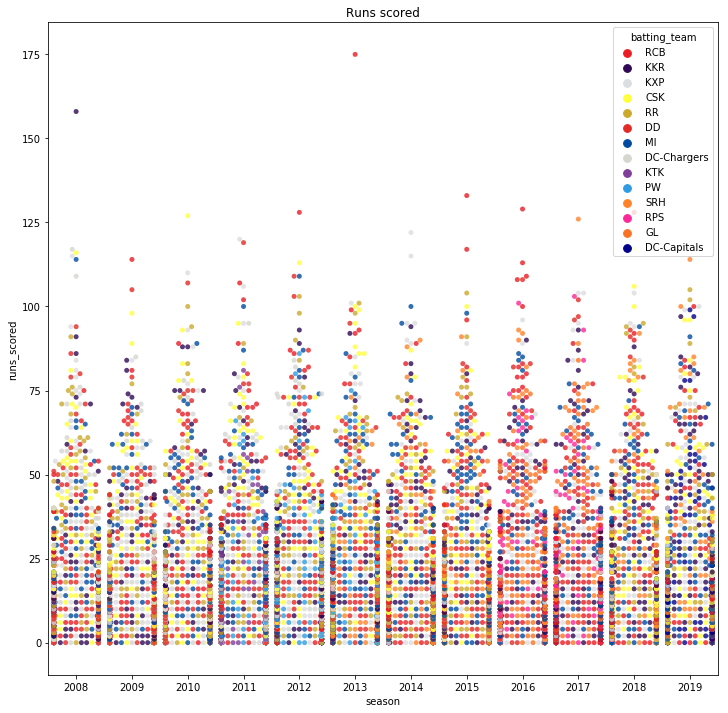

In [74]:
plt.figure(figsize=(12,12))
sns.swarmplot(data=df_batsman,x='season',y='runs_scored',hue='batting_team',alpha=0.8,).set_title('Runs scored');

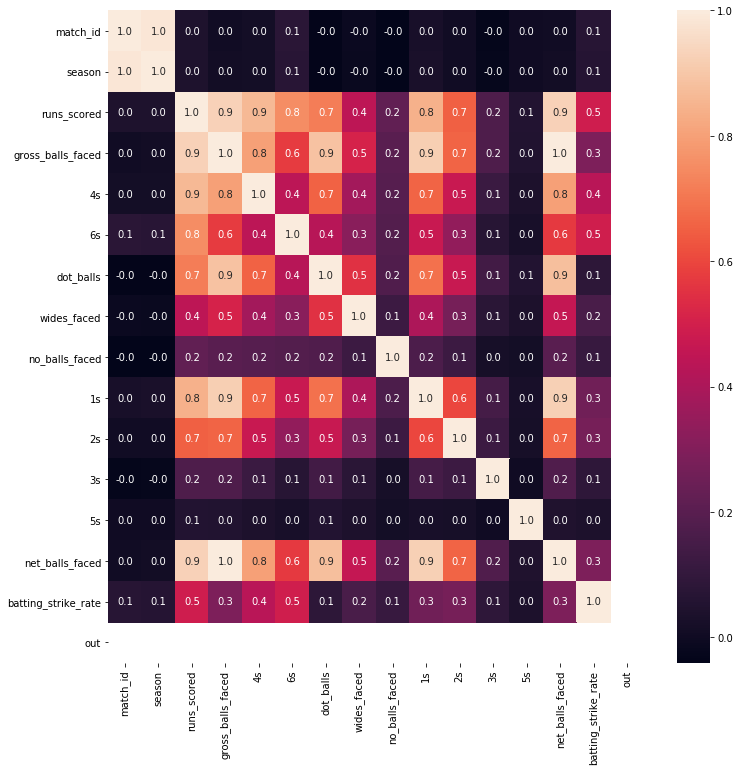

In [75]:
plt.figure(figsize=(12,12))
sns.heatmap(df_batsman.corr(),annot=True, fmt='.1f');

#### Whats the average batting strike rate?


In [76]:
df_batsman['batting_strike_rate'].mean()

1.1057432528313447

In [ ]:
df_strike_rate_by_team_by_season = df_batsman.groupby(['season','batting_team'],as_index=False)['batting_strike_rate'].mean()

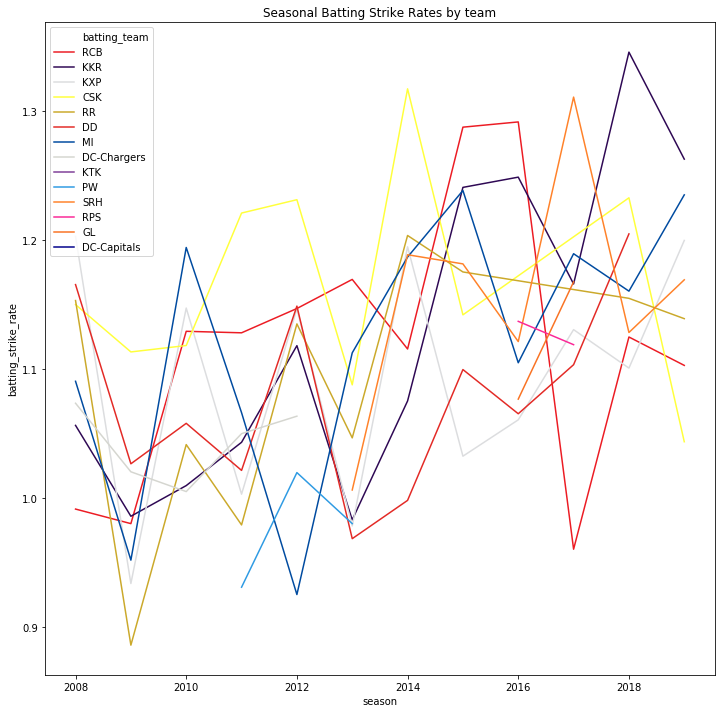

In [78]:
plt.figure(figsize=(12,12))
sns.lineplot(x='season',y='batting_strike_rate',hue='batting_team',hue_order=list_of_teams,data=df_strike_rate_by_team_by_season).set_title('Seasonal Batting Strike Rates by team');

## Lets calculate the team batting strike rates

In [79]:
list_of_seasons = list(df_batsman['season'].unique())
list_of_seasons

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [ ]:
team_batsman_performances = []


for team in list_of_teams:
  team_batsman_performances.append(df_batsman[df_batsman['batting_team'] == team])


team_batsman_seasonal_performances = []

for season in list_of_seasons:
  for team in list_of_teams:
    team_batsman_seasonal_performances.append(df_batsman[(df_batsman['batting_team'] == team) & (df_batsman['season'] == season)])


In [ ]:
team_strikes = [x['batting_strike_rate'].mean() for x in team_batsman_seasonal_performances]

In [82]:
len(team_strikes)

168

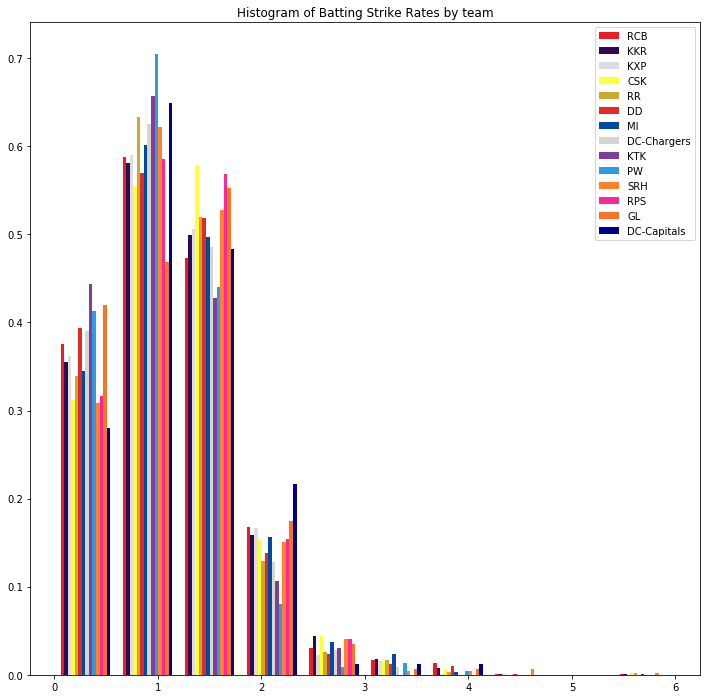

In [83]:
plt.figure(figsize=(12,12))
plt.hist([x['batting_strike_rate'] for x in team_batsman_performances], density=1, histtype='bar',label=[x for x in list_of_teams]);
plt.legend();
plt.title('Histogram of Batting Strike Rates by team');

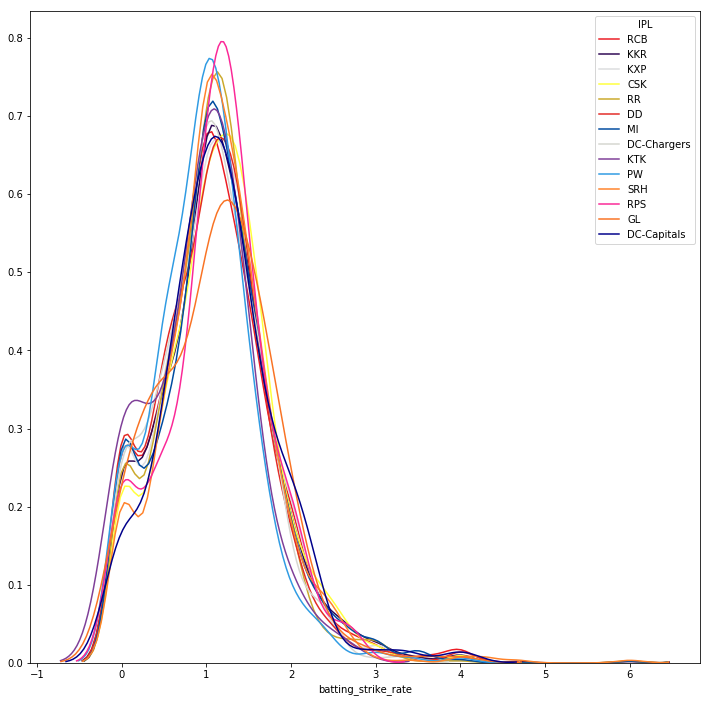

In [84]:
plt.figure(figsize=(12,12))
for i in range(len(list_of_teams)):
  g = sns.distplot(team_batsman_performances[i]['batting_strike_rate'],rug=False,hist=False,label=list_of_teams[i])

plt.legend(title='IPL', loc='upper right')
plt.show(g)


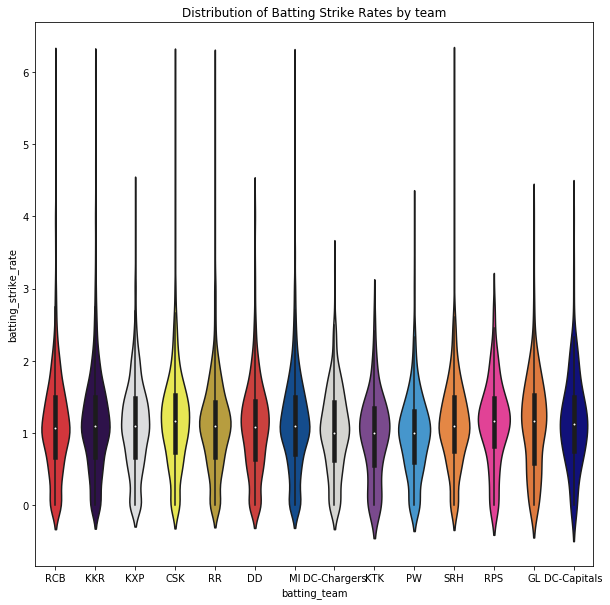

In [85]:
plt.figure(figsize=(10,10))
sns.violinplot(data=df_batsman, x='batting_team',y='batting_strike_rate').set_title('Distribution of Batting Strike Rates by team');

In [86]:
print(list_of_teams)
print(list_of_seasons)

['RCB', 'KKR', 'KXP', 'CSK', 'RR', 'DD', 'MI', 'DC-Chargers', 'KTK', 'PW', 'SRH', 'RPS', 'GL', 'DC-Capitals']
[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


### Analyze one team's batting strikes, say RCB

RCB is at index 0, 14, 28 etc.

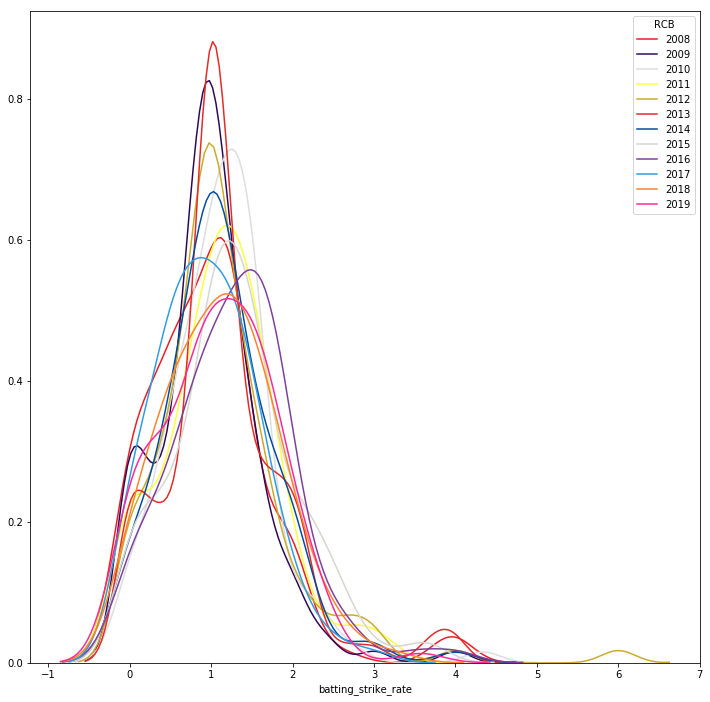

In [87]:
plt.figure(figsize=(12,12))
for i in range(len(list_of_seasons)):
  g = sns.distplot(team_batsman_seasonal_performances[14*i]['batting_strike_rate'],rug=False,hist=False,label=list_of_seasons[i])

plt.legend(title='RCB', loc='upper right')
plt.show(g)

## Runs being scored by season

## Runs by innings by season

## Highest run scorer

In [88]:
df_batsman.head()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,batting_strike_rate,inning,player_out,out,batting_team
0,335982,2008,2008-04-18,AA Noffke,9.0,12,1,0,6,2.0,0.0,5,0,0,0,10.0,0.900000,inning_2,AA Noffke,1.0,RCB
1,335982,2008,2008-04-18,B Akhil,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_2,B Akhil,1.0,RCB
2,335982,2008,2008-04-18,BB McCullum,158.0,77,10,13,23,4.0,0.0,22,9,0,0,73.0,2.164384,NaN,NaN,NaN,KKR
3,335982,2008,2008-04-18,CL White,6.0,10,0,0,5,0.0,0.0,4,1,0,0,10.0,0.600000,inning_2,CL White,1.0,RCB
4,335982,2008,2008-04-18,DJ Hussey,12.0,12,1,0,4,0.0,0.0,6,1,0,0,12.0,1.000000,inning_1,DJ Hussey,1.0,KKR


### Lets add a few more features # of 200s, 100s, 50s etc, Whats the scoring pattern - more dots, boundaries etc

In [ ]:
def flag_200s(row):
  '''
  This function flags innings where the batsman scored over 200s
  INPUT: A row in a DataFrame
  OUTPUT: 1 if 200 was scored and 0 otherwise
  '''   
  if row['runs_scored'] >= 200:
    value = 1
  else:
    value = 0
  return value

def flag_100s(row):
  '''
  This function flags innings where the batsman scored >= 100s and < 200
  INPUT: A row in a DataFrame
  OUTPUT: 1 if 100 was scored and 0 otherwise
  '''   
  if (row['runs_scored'] >= 100) & (row['runs_scored'] < 200):
    value = 1
  else:
    value = 0
  return value

def flag_50s(row):
  '''
  This function flags innings where the batsman scored >= 50s and < 100
  INPUT: A row in a DataFrame
  OUTPUT: 1 if 50 was scored and 0 otherwise
  '''   

  if (row['runs_scored'] >= 50) & (row['runs_scored'] < 100):
    value = 1
  else:
    value = 0
  return value

def flag_30s(row):
  '''
  This function flags innings where the batsman scored >=30 and < 50
  INPUT: A row in a DataFrame
  OUTPUT: 1 if 30 was scored and 0 otherwise
  '''   

  if (row['runs_scored'] >= 30) & (row['runs_scored'] < 50):
    value = 1
  else:
    value = 0
  return value

def calc_boundary_hit_rate(row):
  '''
  This function provides the proportion of balls in which scores of 4, 5 or 6 were scored in the innings
  INPUT: A row in a DataFrame
  OUTPUT: % of balls where scores of 4, 5 or 6 were scored
  '''   
  if row['net_balls_faced'] != 0:
    value = (row['6s']+row['5s']+row['4s'])/row['net_balls_faced']
  else:
    value = 0
  return value

def calc_farming_rate(row):
  '''
  This function provides the proportion of balls in which scores of 1, 2 or 3 were scored in the innings
  INPUT: A row in a DataFrame
  OUTPUT: % of balls where scores of 1, 2 or 3 were scored
  '''   
  if row['net_balls_faced'] != 0:
    value = (row['3s']+row['2s']+row['1s'])/row['net_balls_faced']
  else:
    value = 0
  return value

def calc_dot_ball_rate(row):
  '''
  This function provides the proportion of balls in which no scores were made in the innings
  INPUT: A row in a DataFrame
  OUTPUT: % of balls where 0 runs were scored
  '''   

  if row['net_balls_faced'] != 0:
    value = (row['dot_balls'])/row['net_balls_faced']
  else:
    value = 0
  return value



In [ ]:
# Apply the lambda functions to create flags for runs of 30, 50, 100, 200, boundary_rate, farming_rate and dot_rate

df_batsman['200s'] = df_batsman.apply(lambda row: flag_200s(row),axis=1)
df_batsman['100s'] = df_batsman.apply(lambda row: flag_100s(row),axis=1)
df_batsman['50s'] = df_batsman.apply(lambda row: flag_50s(row),axis=1)
df_batsman['30s'] = df_batsman.apply(lambda row: flag_30s(row),axis=1)
df_batsman['boundary_hit_rate'] = df_batsman.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_batsman['farming_rate'] = df_batsman.apply(lambda row: calc_farming_rate(row),axis=1)
df_batsman['dot_rate'] = df_batsman.apply(lambda row: calc_dot_ball_rate(row),axis=1)

In [91]:
df_batsman.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11294 entries, 0 to 11293
Data columns (total 28 columns):
match_id               11294 non-null int64
season                 11294 non-null int64
match_date             11294 non-null datetime64[ns]
batsman                11294 non-null object
runs_scored            11294 non-null float64
gross_balls_faced      11294 non-null int64
4s                     11294 non-null int64
6s                     11294 non-null int64
dot_balls              11294 non-null int64
wides_faced            11294 non-null float64
no_balls_faced         11294 non-null float64
1s                     11294 non-null int64
2s                     11294 non-null int64
3s                     11294 non-null int64
5s                     11294 non-null int64
net_balls_faced        11294 non-null float64
batting_strike_rate    11294 non-null float64
inning                 8787 non-null object
player_out             8787 non-null object
out                    8787 non-nul

In [92]:
df_batsman.tail()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,batting_strike_rate,inning,player_out,out,batting_team,200s,100s,50s,30s,boundary_hit_rate,farming_rate,dot_rate
11289,1181768,2019,2019-05-12,RG Sharma,15.0,14,1,1,8,0.0,0.0,3,1,0,0,14.0,1.071429,inning_1,RG Sharma,1.0,MI,0,0,0,0,0.142857,0.285714,0.571429
11290,1181768,2019,2019-05-12,SA Yadav,15.0,17,1,0,6,0.0,0.0,9,1,0,0,17.0,0.882353,inning_1,SA Yadav,1.0,MI,0,0,0,0,0.058824,0.588235,0.352941
11291,1181768,2019,2019-05-12,SK Raina,8.0,15,0,0,8,1.0,0.0,6,1,0,0,14.0,0.571429,inning_2,SK Raina,1.0,CSK,0,0,0,0,0.000000,0.500000,0.571429
11292,1181768,2019,2019-05-12,SN Thakur,2.0,2,0,0,1,0.0,0.0,0,1,0,0,2.0,1.000000,inning_2,SN Thakur,1.0,CSK,0,0,0,0,0.000000,0.500000,0.500000
11293,1181768,2019,2019-05-12,SR Watson,80.0,62,8,4,30,3.0,0.0,16,4,0,0,59.0,1.355932,inning_2,SR Watson,1.0,CSK,0,0,1,0,0.203390,0.338983,0.508475


#### What are the highest scores by the batsmen in an inning?

In [93]:
# List of the top scores made - CH Gayle's 175 in 2013 was the highest
df_batsman[['season','batsman','runs_scored','net_balls_faced','100s','50s','30s','6s','5s','4s','3s','2s','1s','dot_balls','batting_strike_rate']].sort_values(by=['runs_scored'],ascending=False).head(10)

,season,batsman,runs_scored,net_balls_faced,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,batting_strike_rate
5302,2013,CH Gayle,175.0,66.0,1,0,0,17,0,13,0,0,21,18,2.651515
2,2008,BB McCullum,158.0,73.0,1,0,0,13,0,10,0,9,22,23,2.164384
7528,2015,AB de Villiers,133.0,59.0,1,0,0,4,0,19,0,7,19,12,2.254237
8359,2016,AB de Villiers,129.0,52.0,1,0,0,12,0,10,0,1,15,15,2.480769
4687,2012,CH Gayle,128.0,62.0,1,0,0,13,0,7,0,1,20,21,2.064516
10149,2018,RR Pant,128.0,63.0,1,0,0,7,0,15,0,2,22,18,2.031746
2237,2010,M Vijay,127.0,56.0,1,0,0,11,1,8,0,2,20,15,2.267857
9146,2017,DA Warner,126.0,59.0,1,0,0,8,0,10,2,7,18,15,2.135593
6854,2014,V Sehwag,122.0,58.0,1,0,0,8,0,12,0,2,22,18,2.103448
2788,2011,PC Valthaty,120.0,63.0,1,0,0,2,0,19,0,5,22,16,1.904762


Gayle's 175 is the highest score in an IPL followed by McCullum's 158

### Lets add a few more features - lets get the batting average as well as balls faced in an inning

In [ ]:
def calc_batting_strike_rate(row):
  '''
  This function provides the strike rate for the batsman in an innings
  INPUT: A row in a DataFrame
  OUTPUT: # of runs scored per ball
  '''   
  
  if row['net_balls_faced'] != 0:
    value = row['runs_scored']/row['net_balls_faced']
  else:
    value = 0
  return value

def calc_batting_avg(row):
  '''
  This function provides the batting average for the batsman
  INPUT: A row in a DataFrame
  OUTPUT: batting average
  '''   
  if row['out'] != 0:
    value = row['runs_scored']/row['out']
  else:
    value = 0
  return value

def calc_balls_per_inning(row):
  '''
  This function provides the average number of balls faced by a batsman per inning
  INPUT: A row in a DataFrame
  OUTPUT: # of balls faced per inning
  '''   

  if row['out'] != 0:
    value = row['net_balls_faced']/row['out']
  else:
    value = 0
  return value

### Now lets analyze by season instead of individual innings
Create a DataFrame `df_batsman_seasonal_stats` for this

In [ ]:
df_batsman_seasonal_stats = df_batsman[['season','batsman','runs_scored','gross_balls_faced','net_balls_faced',\
                                        'out','100s','50s','30s','6s','5s','4s','3s','2s',\
                                        '1s','dot_balls','batting_strike_rate']].groupby(['season','batsman'],as_index=False)['runs_scored','gross_balls_faced','net_balls_faced','out',\
                                                                                          '100s','50s','30s','6s','5s','4s','3s',\
                                                                                          '2s','1s','dot_balls'].sum()

In [96]:
df_batsman_seasonal_stats.head(10)

,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls
0,2008,A Chopra,42.0,55,52.0,5.0,0,0,0,0,0,5,0,2,18,30
1,2008,A Kumble,13.0,17,17.0,2.0,0,0,0,0,0,1,0,1,7,8
2,2008,A Mishra,37.0,42,42.0,3.0,0,0,1,0,0,3,0,2,21,16
3,2008,A Mukund,0.0,1,1.0,1.0,0,0,0,0,0,0,0,0,0,1
4,2008,A Nehra,3.0,13,13.0,1.0,0,0,0,0,0,0,0,0,3,10
5,2008,A Symonds,161.0,111,105.0,2.0,1,0,1,9,0,15,1,5,34,47
6,2008,AA Noffke,9.0,12,10.0,1.0,0,0,0,0,0,1,0,0,5,6
7,2008,AB Agarkar,54.0,49,46.0,5.0,0,0,0,2,0,5,0,4,14,24
8,2008,AB Dinda,2.0,4,4.0,1.0,0,0,0,0,0,0,0,0,2,2
9,2008,AB de Villiers,95.0,100,98.0,5.0,0,0,0,1,0,5,0,16,37,41


Lets compute the stats on a seasonal basis 

In [97]:
# Calc stats such as strike rate, batting average, balls/inning, boundary_rate, farming_rate and dot_rate for each batsman by season  

df_batsman_seasonal_stats['season_batting_strike_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_batting_strike_rate(row),axis=1)
df_batsman_seasonal_stats['season_batting_avg'] = df_batsman_seasonal_stats.apply(lambda row: calc_batting_avg(row),axis=1)
df_batsman_seasonal_stats['balls_per_inning'] = df_batsman_seasonal_stats.apply(lambda row: calc_balls_per_inning(row),axis=1)

df_batsman_seasonal_stats['boundary_hit_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_batsman_seasonal_stats['farming_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_farming_rate(row),axis=1)
df_batsman_seasonal_stats['dot_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_dot_ball_rate(row),axis=1)


df_batsman_seasonal_stats.head()


,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,season_batting_strike_rate,season_batting_avg,balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
0,2008,A Chopra,42.0,55,52.0,5.0,0,0,0,0,0,5,0,2,18,30,0.807692,8.400000,10.4,0.096154,0.384615,0.576923
1,2008,A Kumble,13.0,17,17.0,2.0,0,0,0,0,0,1,0,1,7,8,0.764706,6.500000,8.5,0.058824,0.470588,0.470588
2,2008,A Mishra,37.0,42,42.0,3.0,0,0,1,0,0,3,0,2,21,16,0.880952,12.333333,14.0,0.071429,0.547619,0.380952
3,2008,A Mukund,0.0,1,1.0,1.0,0,0,0,0,0,0,0,0,0,1,0.000000,0.000000,1.0,0.000000,0.000000,1.000000
4,2008,A Nehra,3.0,13,13.0,1.0,0,0,0,0,0,0,0,0,3,10,0.230769,3.000000,13.0,0.000000,0.230769,0.769231


Lets sort the seasonal stats by the averages 

In [98]:
df_batsman_seasonal_stats.sort_values(by=['season_batting_avg','season_batting_strike_rate','balls_per_inning'],ascending=False).head(20)

,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,season_batting_strike_rate,season_batting_avg,balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
60,2008,LA Pomersbach,152.0,101,99.0,1.0,0,1,1,9,0,13,0,3,40,36,1.535354,152.000000,99.000000,0.222222,0.434343,0.363636
119,2008,SM Katich,96.0,72,69.0,1.0,0,1,0,2,0,11,1,8,21,29,1.391304,96.000000,69.000000,0.188406,0.434783,0.420290
1172,2015,JA Morkel,86.0,70,65.0,1.0,0,1,0,2,0,9,0,5,28,26,1.323077,86.000000,65.000000,0.169231,0.507692,0.400000
70,2008,MEK Hussey,168.0,100,100.0,2.0,1,0,1,11,0,12,0,8,38,31,1.680000,84.000000,50.000000,0.230000,0.460000,0.310000
227,2009,MK Pandey,168.0,120,118.0,2.0,1,0,1,4,0,17,0,18,40,41,1.423729,84.000000,59.000000,0.177966,0.491525,0.347458
1748,2019,MS Dhoni,416.0,317,309.0,5.0,0,3,4,23,0,22,0,35,120,117,1.346278,83.200000,61.800000,0.145631,0.501618,0.378641
725,2012,JP Duminy,244.0,195,190.0,3.0,0,2,0,11,0,13,0,17,92,62,1.284211,81.333333,63.333333,0.126316,0.573684,0.326316
1383,2016,V Kohli,973.0,655,640.0,12.0,4,7,1,38,0,84,2,56,291,184,1.520312,81.083333,53.333333,0.190625,0.545312,0.287500
5,2008,A Symonds,161.0,111,105.0,2.0,1,0,1,9,0,15,1,5,34,47,1.533333,80.500000,52.500000,0.228571,0.380952,0.447619
1612,2018,MS Dhoni,455.0,321,302.0,6.0,0,3,3,30,0,24,2,18,137,110,1.506623,75.833333,50.333333,0.178808,0.519868,0.364238


LA Pomersbach played 2 innings for 152 runs off 99 net balls and got dismissed only once 
so his avg is 152 and balls per inning is 99 and strike rate of 1.53

Lets get the stats for Dhoni

In [99]:
df_batsman_seasonal_stats.query('batsman=="MS Dhoni"')

,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,season_batting_strike_rate,season_batting_avg,balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
76,2008,MS Dhoni,414.0,319,310.0,10.0,0,2,6,15,0,38,2,26,114,124,1.335484,41.400000,31.000000,0.170968,0.458065,0.400000
232,2009,MS Dhoni,332.0,270,261.0,8.0,0,2,2,9,0,22,1,24,139,75,1.272031,41.500000,32.625000,0.118774,0.628352,0.287356
398,2010,MS Dhoni,287.0,215,210.0,9.0,0,2,3,8,0,26,0,20,95,66,1.366667,31.888889,23.333333,0.161905,0.547619,0.314286
567,2011,MS Dhoni,392.0,247,247.0,9.0,0,2,2,23,0,25,1,22,107,69,1.587045,43.555556,27.444444,0.194332,0.526316,0.279352
751,2012,MS Dhoni,357.0,283,278.0,12.0,0,1,3,9,0,26,1,37,122,88,1.284173,29.750000,23.166667,0.125899,0.575540,0.316547
918,2013,MS Dhoni,461.0,298,283.0,11.0,0,4,3,25,0,32,3,30,114,94,1.628975,41.909091,25.727273,0.201413,0.519435,0.332155
1066,2014,MS Dhoni,371.0,258,250.0,5.0,0,1,3,20,0,22,2,28,101,85,1.484000,74.200000,50.000000,0.168000,0.524000,0.340000
1197,2015,MS Dhoni,372.0,309,305.0,12.0,0,1,4,17,0,27,0,24,114,127,1.219672,31.000000,25.416667,0.144262,0.452459,0.416393
1332,2016,MS Dhoni,284.0,220,210.0,7.0,0,1,3,14,0,18,1,20,85,82,1.352381,40.571429,30.000000,0.152381,0.504762,0.390476
1471,2017,MS Dhoni,290.0,261,250.0,11.0,0,1,2,16,0,15,0,20,94,116,1.160000,26.363636,22.727273,0.124000,0.456000,0.464000


## Compare the top 10 all-time run scorers in the IPL along various parameters 

In [ ]:
# Create a data frame of the top 10 batsman for each season sorted by runs_scored 
df_top_ten_batsmen = pd.DataFrame(df_batsman_seasonal_stats.\
                      groupby('batsman',as_index=False)\
                      ['runs_scored','gross_balls_faced','net_balls_faced','out',\
                       '100s','50s','30s','6s','5s','4s','3s','2s','1s','dot_balls']\
                      .sum()\
                      .sort_values(by=['runs_scored','gross_balls_faced','net_balls_faced','100s','50s','30s'],\
                                   ascending=False)['batsman']\
                      .head(10)\
                      .reset_index(drop=True))

top_ten_batsmen_list = df_top_ten_batsmen['batsman']

In [102]:
# Also, create a dataframe of the top 10 all time batsmen and create the strike rate, average and balls per inning
df_top10_batsmen_alltime_comparison = df_batsman_seasonal_stats.groupby('batsman',as_index=False)['runs_scored','gross_balls_faced','net_balls_faced','out',\
                                                            '100s','50s','30s','6s','5s','4s','3s',\
                                                            '2s','1s','dot_balls'].sum().query('batsman in @top_ten_batsmen_list') 

df_top10_batsmen_alltime_comparison['ipl_strike_rate'] = df_top10_batsmen_alltime_comparison.apply(lambda row: calc_batting_strike_rate(row),axis=1)
df_top10_batsmen_alltime_comparison['ipl_batting_avg'] = df_top10_batsmen_alltime_comparison.apply(lambda row: calc_batting_avg(row),axis=1)
df_top10_batsmen_alltime_comparison['ipl_balls_per_inning'] = df_top10_batsmen_alltime_comparison.apply(lambda row: calc_balls_per_inning(row),axis=1)

df_top10_batsmen_alltime_comparison['boundary_hit_rate'] = df_top10_batsmen_alltime_comparison.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_top10_batsmen_alltime_comparison['farming_rate'] = df_top10_batsmen_alltime_comparison.apply(lambda row: calc_farming_rate(row),axis=1)
df_top10_batsmen_alltime_comparison['dot_rate'] = df_top10_batsmen_alltime_comparison.apply(lambda row: calc_dot_ball_rate(row),axis=1)


df_top10_batsmen_alltime_comparison = df_top10_batsmen_alltime_comparison.sort_values(by=['runs_scored','gross_balls_faced','net_balls_faced','100s','50s','30s'],\
                                   ascending=False).reset_index(drop=True)
df_top10_batsmen_alltime_comparison

,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,ipl_strike_rate,ipl_batting_avg,ipl_balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
0,V Kohli,5412.0,4208,4111.0,143.0,5,36,36,191,0,481,11,292,1725,1508,1.316468,37.846154,28.748252,0.163464,0.493311,0.366821
1,SK Raina,5368.0,4041,3914.0,161.0,1,38,37,194,1,493,11,264,1666,1412,1.371487,33.341615,24.310559,0.175779,0.495912,0.360756
2,RG Sharma,4898.0,3816,3744.0,154.0,1,36,31,195,1,431,5,204,1576,1404,1.308226,31.805195,24.311688,0.167468,0.476763,0.375000
3,DA Warner,4706.0,3397,3305.0,109.0,4,44,19,181,1,458,17,270,1192,1278,1.423903,43.174312,30.321101,0.193646,0.447504,0.386687
4,S Dhawan,4579.0,3775,3669.0,138.0,0,37,26,96,2,524,18,201,1441,1493,1.248024,33.181159,26.586957,0.169528,0.452439,0.406923
5,CH Gayle,4484.0,3118,2969.0,109.0,6,28,21,326,0,369,3,80,883,1457,1.510273,41.137615,27.238532,0.234086,0.325362,0.490738
6,MS Dhoni,4431.0,3318,3215.0,105.0,0,23,38,209,0,297,13,304,1342,1153,1.378227,42.200000,30.619048,0.157387,0.516019,0.358631
7,RV Uthappa,4411.0,3488,3380.0,153.0,0,24,40,156,3,435,13,205,1271,1405,1.305030,28.830065,22.091503,0.175740,0.440533,0.415680
8,AB de Villiers,4395.0,2972,2906.0,110.0,3,33,20,212,0,357,15,220,1210,958,1.512388,39.954545,26.418182,0.195802,0.497247,0.329663
9,G Gambhir,4217.0,3524,3404.0,135.0,0,36,22,59,0,492,15,249,1352,1357,1.238837,31.237037,25.214815,0.161868,0.474736,0.398649


### Lets get the same stats for the period 2017-2019 and just 2019 respecively

In [103]:
# create a dataframe of the top 10 batsmen for the seasons 2017, 2018 and 2019
df_top_ten_batsmen_last_3_years = pd.DataFrame(df_batsman_seasonal_stats.query('season == 2017 |season == 2018 |season == 2019')\
                                                                               .groupby('batsman',as_index=False)\
                      ['runs_scored','gross_balls_faced','net_balls_faced','out',\
                       '100s','50s','30s','6s','5s','4s','3s','2s','1s','dot_balls']\
                      .sum()\
                      .sort_values(by=['runs_scored','gross_balls_faced','net_balls_faced','100s','50s','30s'],\
                                   ascending=False)['batsman']\
                      .head(10)\
                      .reset_index(drop=True))

top_ten_batsmen_list_last_3_years = df_top_ten_batsmen_last_3_years['batsman']
                                               
df_top10_batsmen_last_3_years_comparison = df_batsman_seasonal_stats.query('season == 2017 |season == 2018 |season == 2019').groupby('batsman',as_index=False)['runs_scored','gross_balls_faced','net_balls_faced','out',\
                                                            '100s','50s','30s','6s','5s','4s','3s',\
                                                            '2s','1s','dot_balls'].sum().query('batsman in @top_ten_batsmen_list_last_3_years') 

df_top10_batsmen_last_3_years_comparison['ipl_strike_rate'] = df_top10_batsmen_last_3_years_comparison.apply(lambda row: calc_batting_strike_rate(row),axis=1)
df_top10_batsmen_last_3_years_comparison['ipl_batting_avg'] = df_top10_batsmen_last_3_years_comparison.apply(lambda row: calc_batting_avg(row),axis=1)
df_top10_batsmen_last_3_years_comparison['ipl_balls_per_inning'] = df_top10_batsmen_last_3_years_comparison.apply(lambda row: calc_balls_per_inning(row),axis=1)

df_top10_batsmen_last_3_years_comparison['boundary_hit_rate'] = df_top10_batsmen_last_3_years_comparison.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_top10_batsmen_last_3_years_comparison['farming_rate'] = df_top10_batsmen_last_3_years_comparison.apply(lambda row: calc_farming_rate(row),axis=1)
df_top10_batsmen_last_3_years_comparison['dot_rate'] = df_top10_batsmen_last_3_years_comparison.apply(lambda row: calc_dot_ball_rate(row),axis=1)


df_top10_batsmen_last_3_years_comparison = df_top10_batsmen_last_3_years_comparison.sort_values(by=['runs_scored','gross_balls_faced','net_balls_faced','100s','50s','30s'],\
                                   ascending=False).reset_index(drop=True)
df_top10_batsmen_last_3_years_comparison

,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,ipl_strike_rate,ipl_batting_avg,ipl_balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
0,RR Pant,1538.0,945,915.0,40.0,1,10,12,88,1,133,1,56,358,308,1.680874,38.450000,22.875000,0.242623,0.453552,0.336612
1,S Dhawan,1497.0,1153,1123.0,42.0,0,12,9,34,0,176,4,54,469,416,1.333037,35.642857,26.738095,0.186999,0.469279,0.370436
2,DA Warner,1333.0,958,933.0,21.0,2,12,6,47,1,120,6,93,362,329,1.428725,63.476190,44.428571,0.180064,0.494105,0.352626
3,V Kohli,1302.0,974,961.0,35.0,1,10,7,42,0,121,1,70,423,317,1.354839,37.200000,27.457143,0.169615,0.514048,0.329865
4,SK Raina,1270.0,985,957.0,39.0,0,10,10,34,0,133,1,46,439,332,1.327064,32.564103,24.538462,0.174504,0.507837,0.346917
5,KL Rahul,1252.0,873,854.0,23.0,1,12,4,57,0,115,0,63,324,314,1.466042,54.434783,37.130435,0.201405,0.453162,0.367681
6,SS Iyer,1212.0,963,939.0,36.0,0,9,9,45,1,106,1,48,414,348,1.290735,33.666667,26.083333,0.161874,0.493078,0.370607
7,CA Lynn,1191.0,853,830.0,34.0,0,10,8,59,0,122,0,38,273,361,1.434940,35.029412,24.411765,0.218072,0.374699,0.434940
8,SV Samson,1169.0,838,823.0,37.0,2,5,9,51,0,90,6,71,343,277,1.420413,31.594595,22.243243,0.171324,0.510328,0.336574
9,MS Dhoni,1161.0,899,861.0,22.0,0,7,9,69,0,61,2,73,351,343,1.348432,52.772727,39.136364,0.150987,0.494774,0.398374


### create the same for only 2019 season

In [104]:
df_top_ten_batsmen_2019 = pd.DataFrame(df_batsman_seasonal_stats.query('season == 2019')\
                                                                               .groupby('batsman',as_index=False)\
                      ['runs_scored','gross_balls_faced','net_balls_faced','out',\
                       '100s','50s','30s','6s','5s','4s','3s','2s','1s','dot_balls']\
                      .sum()\
                      .sort_values(by=['runs_scored','gross_balls_faced','net_balls_faced','100s','50s','30s'],\
                                   ascending=False)['batsman']\
                      .head(10)\
                      .reset_index(drop=True))

top_ten_batsmen_list_2019 = df_top_ten_batsmen_2019['batsman']
                                               
df_top_ten_batsmen_2019 = df_batsman_seasonal_stats.query('season == 2019').groupby('batsman',as_index=False)['runs_scored','gross_balls_faced','net_balls_faced','out',\
                                                            '100s','50s','30s','6s','5s','4s','3s',\
                                                            '2s','1s','dot_balls'].sum().query('batsman in @top_ten_batsmen_list_2019') 

df_top_ten_batsmen_2019['ipl_strike_rate'] = df_top_ten_batsmen_2019.apply(lambda row: calc_batting_strike_rate(row),axis=1)
df_top_ten_batsmen_2019['ipl_batting_avg'] = df_top_ten_batsmen_2019.apply(lambda row: calc_batting_avg(row),axis=1)
df_top_ten_batsmen_2019['ipl_balls_per_inning'] = df_top_ten_batsmen_2019.apply(lambda row: calc_balls_per_inning(row),axis=1)

df_top_ten_batsmen_2019['boundary_hit_rate'] = df_top_ten_batsmen_2019.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_top_ten_batsmen_2019['farming_rate'] = df_top_ten_batsmen_2019.apply(lambda row: calc_farming_rate(row),axis=1)
df_top_ten_batsmen_2019['dot_rate'] = df_top_ten_batsmen_2019.apply(lambda row: calc_dot_ball_rate(row),axis=1)


df_top_ten_batsmen_2019 = df_top_ten_batsmen_2019.sort_values(by=['runs_scored','gross_balls_faced','net_balls_faced','100s','50s','30s'],\
                                   ascending=False).reset_index(drop=True)
df_top_ten_batsmen_2019

,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,ipl_strike_rate,ipl_batting_avg,ipl_balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
0,DA Warner,692.0,496,481.0,10.0,1,8,1,21,1,57,4,63,195,155,1.438669,69.200000,48.100000,0.164241,0.544699,0.322245
1,KL Rahul,593.0,447,438.0,11.0,1,6,1,25,0,49,0,36,175,162,1.353881,53.909091,39.818182,0.168950,0.481735,0.369863
2,Q de Kock,529.0,404,398.0,15.0,0,4,3,25,0,45,1,23,150,160,1.329146,35.266667,26.533333,0.175879,0.437186,0.402010
3,S Dhawan,521.0,391,384.0,15.0,0,5,3,11,0,64,1,22,152,141,1.356771,34.733333,25.600000,0.195312,0.455729,0.367188
4,AD Russell,510.0,271,249.0,9.0,0,4,4,52,0,31,0,4,66,118,2.048193,56.666667,27.666667,0.333333,0.281124,0.473896
5,CH Gayle,490.0,338,319.0,12.0,0,4,2,34,0,45,0,7,92,160,1.536050,40.833333,26.583333,0.247649,0.310345,0.501567
6,RR Pant,488.0,307,300.0,13.0,0,3,4,27,0,37,1,25,125,92,1.626667,37.538462,23.076923,0.213333,0.503333,0.306667
7,V Kohli,464.0,332,328.0,14.0,1,2,2,13,0,46,0,26,150,97,1.414634,33.142857,23.428571,0.179878,0.536585,0.295732
8,SS Iyer,463.0,397,386.0,15.0,0,3,4,14,0,41,0,19,177,146,1.199482,30.866667,25.733333,0.142487,0.507772,0.378238
9,JM Bairstow,445.0,292,283.0,8.0,1,2,4,18,0,48,2,18,103,103,1.572438,55.625000,35.375000,0.233216,0.434629,0.363958


# Batting Graphics

## Create plots to compare the batsmen along different parameters

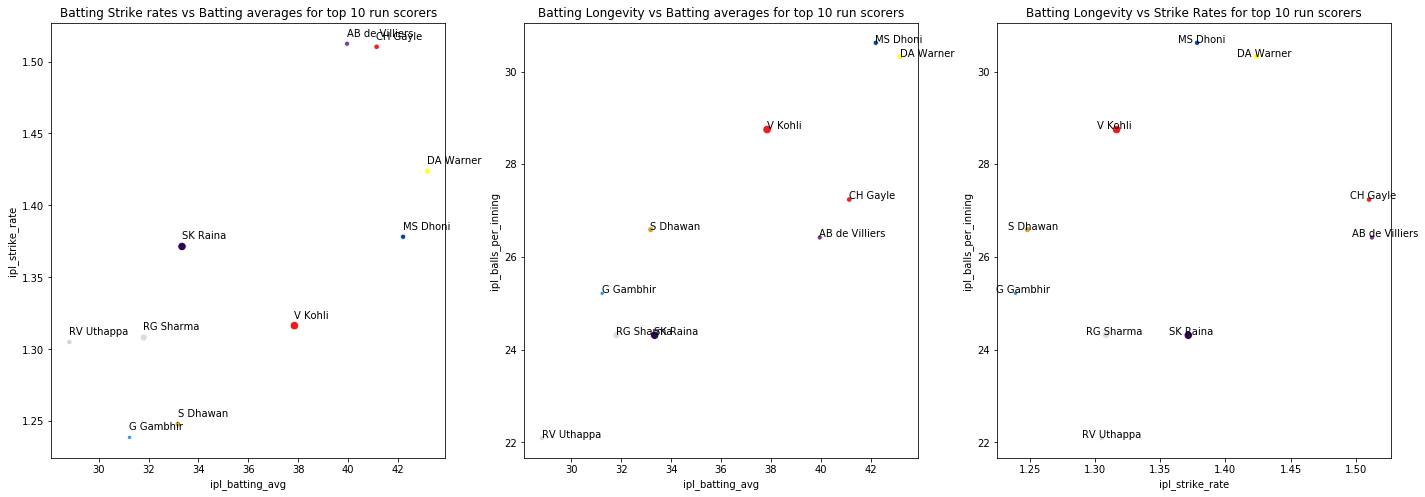

In [105]:
plt.figure(figsize=(24,8))

gs_batsman_1 = gridspec.GridSpec(1, 3)
plt.subplot(gs_batsman_1[0, 0])
p_batsman_1 = sns.scatterplot(x="ipl_batting_avg", y="ipl_strike_rate",\
                     hue='batsman', hue_order=top_ten_batsmen_list,size='runs_scored',\
                     data=df_top10_batsmen_alltime_comparison,legend=False\
                     
                    );
for line in range(0,df_top10_batsmen_alltime_comparison.shape[0]):
  p_batsman_1.text(df_top10_batsmen_alltime_comparison.ipl_batting_avg[line]-0.015,\
                   df_top10_batsmen_alltime_comparison.ipl_strike_rate[line]+0.005,\
                   df_top10_batsmen_alltime_comparison.batsman[line])

p_batsman_1.set_title('Batting Strike rates vs Batting averages for top 10 run scorers')

plt.subplot(gs_batsman_1[0, 1])
p_batsman_2 = sns.scatterplot(x="ipl_batting_avg", y="ipl_balls_per_inning",\
                     hue='batsman', hue_order=top_ten_batsmen_list,size='runs_scored',\
                     data=df_top10_batsmen_alltime_comparison,legend=False\
                     
                    );
for line in range(0,df_top10_batsmen_alltime_comparison.shape[0]):
  p_batsman_2.text(df_top10_batsmen_alltime_comparison.ipl_batting_avg[line]-0.015,\
                   df_top10_batsmen_alltime_comparison.ipl_balls_per_inning[line]+0.005,\
                   df_top10_batsmen_alltime_comparison.batsman[line])

p_batsman_2.set_title('Batting Longevity vs Batting averages for top 10 run scorers')


plt.subplot(gs_batsman_1[0, 2])
p_batsman_3 = sns.scatterplot(x="ipl_strike_rate", y="ipl_balls_per_inning",\
                     hue='batsman', hue_order=top_ten_batsmen_list,size='runs_scored',\
                     data=df_top10_batsmen_alltime_comparison,legend=False\
                     
                    );
for line in range(0,df_top10_batsmen_alltime_comparison.shape[0]):
  p_batsman_3.text(df_top10_batsmen_alltime_comparison.ipl_strike_rate[line]-0.015,\
                   df_top10_batsmen_alltime_comparison.ipl_balls_per_inning[line]+0.005,\
                   df_top10_batsmen_alltime_comparison.batsman[line])

p_batsman_3.set_title('Batting Longevity vs Strike Rates for top 10 run scorers');

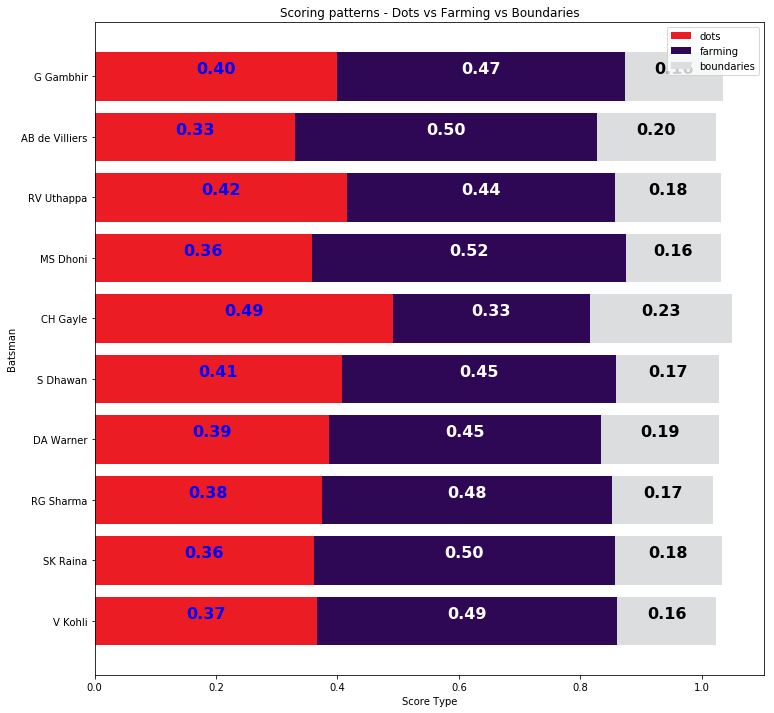

In [106]:
plt.figure(figsize=(12,12))

p_batsman_4 = plt.barh(y=df_top10_batsmen_alltime_comparison['batsman'],width=df_top10_batsmen_alltime_comparison['dot_rate'])
p_batsman_5 = plt.barh(y=df_top10_batsmen_alltime_comparison['batsman'],width=df_top10_batsmen_alltime_comparison['farming_rate'],\
                       left=df_top10_batsmen_alltime_comparison['dot_rate'])
p_batsman_6 = plt.barh(y=df_top10_batsmen_alltime_comparison['batsman'],width=df_top10_batsmen_alltime_comparison['boundary_hit_rate'],\
                       left=df_top10_batsmen_alltime_comparison['dot_rate']+df_top10_batsmen_alltime_comparison['farming_rate'])


for r1, r2, r3 in zip(p_batsman_4, p_batsman_5, p_batsman_6):
    w1 = r1.get_width()
    w2 = r2.get_width()
    w3 = r3.get_width()
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x()+w1/2.,r1.get_y()+h1/2.,"%.2f" % w1,ha="center", va="bottom", color="blue", fontsize=16, fontweight="bold")
    plt.text(r2.get_x()+w2/2.,r2.get_y()+h2/2.,"%.2f" % w2,ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
    plt.text(r3.get_x()+w3/2.,r3.get_y()+h3/2.,"%.2f" % w3,ha="center", va="bottom", color="black", fontsize=16, fontweight="bold")
        
    

plt.ylabel('Batsman')
plt.xlabel('Score Type')
plt.title('Scoring patterns - Dots vs Farming vs Boundaries')

plt.legend((p_batsman_4,p_batsman_5,p_batsman_6),('dots','farming','boundaries'),loc='best')

plt.show()

## Lets visualize a few more plots of our batsmen performances to compare the top 10 all time run scorers along different parameters

In [107]:
df_best_batsman = df_batsman.merge(df_top_ten_batsmen,how='right',left_on=['batsman'],right_on=['batsman'])
df_best_batsman.head()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,batting_strike_rate,inning,player_out,out,batting_team,200s,100s,50s,30s,boundary_hit_rate,farming_rate,dot_rate
0,335982,2008,2008-04-18,V Kohli,1.0,5,0,0,4,0.0,0.0,1,0,0,0,5.0,0.200000,inning_2,V Kohli,1.0,RCB,0,0,0,0,0.000000,0.200000,0.800000
1,335985,2008,2008-04-20,V Kohli,23.0,15,3,1,6,1.0,0.0,5,0,0,0,14.0,1.642857,inning_2,V Kohli,1.0,RCB,0,0,0,0,0.285714,0.357143,0.428571
2,335992,2008,2008-04-26,V Kohli,13.0,16,0,1,9,2.0,0.0,5,1,0,0,14.0,0.928571,inning_1,V Kohli,1.0,RCB,0,0,0,0,0.071429,0.428571,0.642857
3,335996,2008,2008-04-28,V Kohli,12.0,7,2,0,2,0.0,0.0,2,1,0,0,7.0,1.714286,inning_2,V Kohli,1.0,RCB,0,0,0,0,0.285714,0.428571,0.285714
4,335998,2008,2008-04-30,V Kohli,1.0,1,0,0,0,0.0,0.0,1,0,0,0,1.0,1.000000,NaN,NaN,NaN,RCB,0,0,0,0,0.000000,1.000000,0.000000


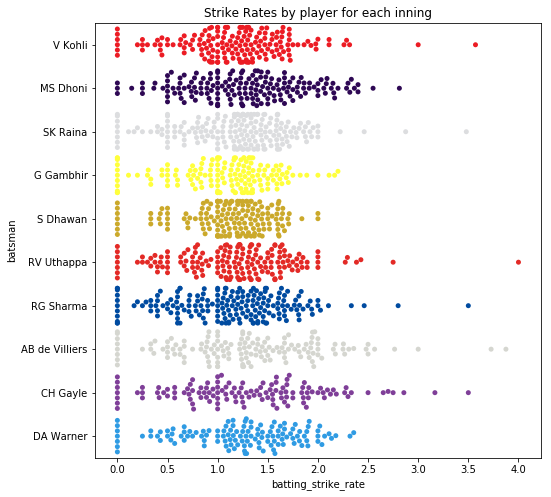

In [108]:
# Create a swarm plot for each inning
plt.figure(figsize=(8,8));
sns.swarmplot(data=df_best_batsman,x='batting_strike_rate',y='batsman').set_title('Strike Rates by player for each inning');

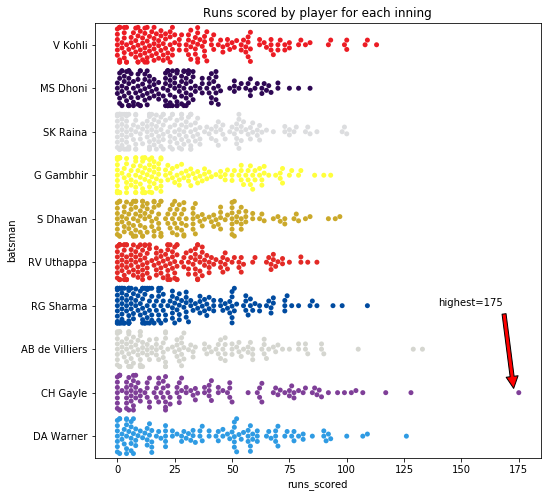

In [109]:
plt.figure(figsize=(8,8))
s_runs = sns.swarmplot(data=df_best_batsman,x='runs_scored',y='batsman').set_title('Runs scored by player for each inning');

plt.annotate('highest=175', color="black", fontsize=10, xy=(173, 8.0), xytext=(140, 6),arrowprops=dict(facecolor='red', shrink=0.05));

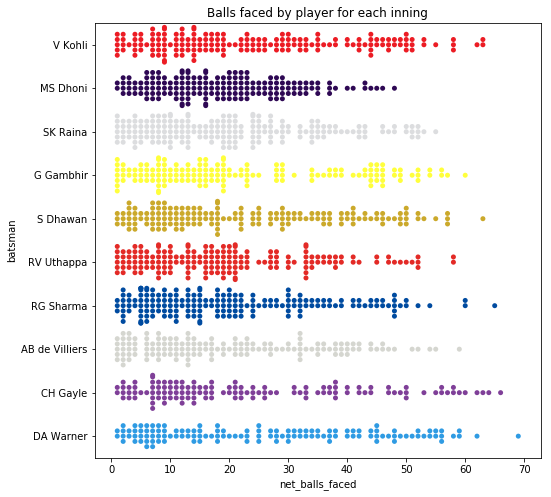

In [110]:
plt.figure(figsize=(8,8))
sns.swarmplot(data=df_best_batsman,x='net_balls_faced',y='batsman').set_title('Balls faced by player for each inning');

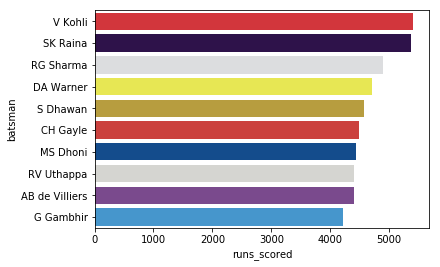

In [111]:
sns.barplot(data=df_top10_batsmen_alltime_comparison,x='runs_scored',y='batsman');

In [112]:
# who's got the most number of player of the match
df_match_summary['player_of_match'].value_counts()

CH Gayle             21
AB de Villiers       20
RG Sharma            17
MS Dhoni             17
DA Warner            17
YK Pathan            16
SR Watson            15
SK Raina             14
G Gambhir            13
MEK Hussey           12
V Kohli              12
AM Rahane            12
V Sehwag             11
A Mishra             11
AD Russell           11
DR Smith             11
JH Kallis            10
KA Pollard           10
SE Marsh              9
AT Rayudu             9
SP Narine             9
SR Tendulkar          8
Harbhajan Singh       8
UT Yadav              8
RA Jadeja             8
RV Uthappa            7
Rashid Khan           7
AC Gilchrist          7
HH Pandya             6
M Vijay               6
                     ..
SP Goswami            1
LJ Wright             1
S Sohal               1
BCJ Cutting           1
SM Katich             1
AS Joseph             1
AC Voges              1
MS Bisla              1
AA Jhunjhunwala       1
RE Levi               1
Mujeeb Ur Rahman

In [113]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178949 entries, 0 to 178948
Data columns (total 48 columns):
batsman                       178940 non-null object
batsman_runs                  178940 non-null float64
batting_team                  178949 non-null object
bowler                        178940 non-null object
byes                          480 non-null float64
extras_runs                   178299 non-null float64
kind                          8827 non-null object
legbyes                       2933 non-null float64
inning                        178949 non-null object
delivery                      178949 non-null object
match_id                      178949 non-null int64
noballs                       712 non-null float64
non_striker                   178940 non-null object
player_out                    8827 non-null object
total                         178940 non-null float64
wides                         5405 non-null float64
non_boundary                  14 non-null float64

In [114]:
# Lets now analyze a random match by how each inning progressed 
df_details.query('match_id==335982' ).groupby(['inning','inning_quarter'],as_index=False)['total','batsman_runs','extras_runs','byes','legbyes','wides','noballs'].sum()

,inning,inning_quarter,total,batsman_runs,extras_runs,byes,legbyes,wides,noballs
0,inning_1,Q1,60.0,50.0,10.0,0.0,4.0,6.0,0.0
1,inning_1,Q2,27.0,27.0,0.0,0.0,0.0,0.0,0.0
2,inning_1,Q3,67.0,60.0,7.0,4.0,0.0,3.0,0.0
3,inning_1,Q4,68.0,68.0,0.0,0.0,0.0,0.0,0.0
4,inning_2,Q1,24.0,17.0,7.0,0.0,5.0,2.0,0.0
5,inning_2,Q2,27.0,20.0,7.0,0.0,2.0,5.0,0.0
6,inning_2,Q3,30.0,26.0,4.0,0.0,1.0,3.0,0.0
7,inning_2,Q4,1.0,0.0,1.0,0.0,0.0,1.0,0.0


# Bowler Statistics Analyzed

## Create a `df_bowler` DataFrame to start tracking bowling performances

In [115]:
# Now we create similar comparisons for best bowling performances
# Define the aggregation calculations
bowler_aggregations = {\
                       
    'delivery': {'balls_bowled': 'count'},\
    'batsman_runs': {'batsman_runs_conceded':'sum'},\
    'total': { 'total_runs_conceded': 'sum'},\
    'extras_runs': { 'extras conceded': 'sum'},\
    'wides': {'extras_wides':'sum'},\
    'noballs': {'extras_noballs':'sum'},\
    'byes': {'extras_byes':'sum'},\
    'legbyes': {'extras_legbyes':'sum'},\
    'player_out': {'wickets_incl_run_outs': 'count'},\
    'kind' : {'wicket_type':'count'},\
    'wicket_attributed_to':{'wickets_for_bowler':'count'},\
    'dot_ball_flag': {'dot_balls_bowled':'count'},\
    '1_run_flag' : {'1_run_balls_bowled': 'count'},\
    '2_run_flag' : {'2_run_balls_bowled': 'count'},\
    '3_run_flag' : {'3_run_balls_bowled': 'count'},\
    '4_flag' : {'4_run_balls_bowled': 'count'},\
    '5_run_flag' : {'5_run_balls_bowled': 'count'},\
    '6_flag' : {'6_run_balls_bowled': 'count'},\
    'caught_flag':{'wicket_type_caught':'sum'},\
    'bowled_flag':{'wicket_type_bowled':'sum'},\
    'lbw_flag':{'wicket_type_lbw':'sum'},\
    'stumped_flag':{'wicket_type_stumped':'sum'},\
    'run_out_flag':{'wicket_type_run_out':'sum'},\
    'hit_wicket_flag':{'wicket_type_hit_wicket':'sum'},\
    'caught_and_bowled_flag':{'wicket_type_caught_and_bowled':'sum'},\
    'retired_hurt_flag':{'wicket_type_retired_hurt':'sum'},\
    'obstructing_the_field_flag':{'wicket_type_obstructing_the_field_flag':'sum'}
    }



df_bowler = df_combined.groupby(['match_id','season','bowler'],as_index=False)\
                                                                      ['delivery','total','batsman_runs','extras_runs','wides','noballs','byes','legbyes',\
                                                                       'player_out','kind','wicket_attributed_to','dot_ball_flag','1_run_flag',\
                                                                      '2_run_flag','3_run_flag','4_flag','5_run_flag',\
                                                                      '6_flag','wide_flag','noball_flag', 'caught_flag',\
                                                                       'lbw_flag','bowled_flag','stumped_flag','run_out_flag',\
                                                                       'hit_wicket_flag','caught_and_bowled_flag',\
                                                                       'retired_hurt_flag','obstructing_the_field_flag'\
                                                                      ].agg(bowler_aggregations)



/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [116]:
df_bowler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8977 entries, 0 to 8976
Data columns (total 30 columns):
match_id                                  8977 non-null int64
season                                    8977 non-null int64
bowler                                    8977 non-null object
balls_bowled                              8977 non-null int64
batsman_runs_conceded                     8977 non-null float64
total_runs_conceded                       8977 non-null float64
extras conceded                           8977 non-null float64
extras_wides                              8977 non-null float64
extras_noballs                            8977 non-null float64
extras_byes                               8977 non-null float64
extras_legbyes                            8977 non-null float64
wickets_incl_run_outs                     8977 non-null int64
wicket_type                               8977 non-null int64
wickets_for_bowler                        8977 non-null int64
dot_balls_

In [117]:
df_bowler.head()

,match_id,season,bowler,balls_bowled,batsman_runs_conceded,total_runs_conceded,extras conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,wickets_incl_run_outs,wicket_type,wickets_for_bowler,dot_balls_bowled,1_run_balls_bowled,2_run_balls_bowled,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,wicket_type_caught,wicket_type_bowled,wicket_type_lbw,wicket_type_stumped,wicket_type_run_out,wicket_type_hit_wicket,wicket_type_caught_and_bowled,wicket_type_retired_hurt,wicket_type_obstructing_the_field_flag
0,335982,2008,AA Noffke,25,35.0,41.0,6.0,5.0,0.0,0.0,1.0,1,1,1,8,11,2,0,2,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,335982,2008,AB Agarkar,28,21.0,25.0,4.0,4.0,0.0,0.0,0.0,3,3,3,19,5,1,0,2,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,335982,2008,AB Dinda,20,7.0,9.0,2.0,2.0,0.0,0.0,0.0,2,2,2,13,7,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,335982,2008,CL White,7,22.0,24.0,2.0,2.0,0.0,0.0,0.0,0,0,0,1,2,0,0,2,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,335982,2008,I Sharma,19,6.0,13.0,7.0,1.0,0.0,0.0,6.0,1,1,1,14,4,1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_bowler['wickets'] = df_bowler['wicket_type_caught'] + df_bowler['wicket_type_lbw'] + df_bowler['wicket_type_bowled'] +\
df_bowler['wicket_type_stumped']	+ df_bowler['wicket_type_caught_and_bowled'] + df_bowler['wicket_type_hit_wicket']

In [119]:

# Define the aggregation calculations
bowler_aggregations = {\
                       
    'delivery': {'balls_bowled': 'count'},\
    'batsman_runs': {'batsman_runs_conceded':'sum'},\
    'total': { 'total_runs_conceded': 'sum'},\
    'extras_runs': { 'extras conceded': 'sum'},\
    'wides': {'extras_wides':'sum'},\
    'noballs': {'extras_noballs':'sum'},\
    'byes': {'extras_byes':'sum'},\
    'legbyes': {'extras_legbyes':'sum'},\
    'player_out': {'wickets_incl_run_outs': 'count'},\
    'kind' : {'wicket_type':'count'},\
    'wicket_attributed_to':{'wickets_for_bowler':'count'},\
    'dot_ball_flag': {'dot_balls_bowled':'count'},\
    '1_run_flag' : {'1_run_balls_bowled': 'count'},\
    '2_run_flag' : {'2_run_balls_bowled': 'count'},\
    '3_run_flag' : {'3_run_balls_bowled': 'count'},\
    '4_flag' : {'4_run_balls_bowled': 'count'},\
    '5_run_flag' : {'5_run_balls_bowled': 'count'},\
    '6_flag' : {'6_run_balls_bowled': 'count'},\
    'caught_flag':{'wicket_type_caught':'sum'},\
    'bowled_flag':{'wicket_type_bowled':'sum'},\
    'lbw_flag':{'wicket_type_lbw':'sum'},\
    'stumped_flag':{'wicket_type_stumped':'sum'},\
    'run_out_flag':{'wicket_type_run_out':'sum'},\
    'hit_wicket_flag':{'wicket_type_hit_wicket':'sum'},\
    'caught_and_bowled_flag':{'wicket_type_caught_and_bowled':'sum'},\
    'retired_hurt_flag':{'wicket_type_retired_hurt':'sum'},\
    'obstructing_the_field_flag':{'wicket_type_obstructing_the_field_flag':'sum'}
    }



df_bowler = df_combined.groupby(['match_id','season','bowler'],as_index=False)\
                                                                      ['delivery','total','batsman_runs','extras_runs','wides','noballs','byes','legbyes',\
                                                                       'player_out','kind','wicket_attributed_to','dot_ball_flag','1_run_flag',\
                                                                      '2_run_flag','3_run_flag','4_flag','5_run_flag',\
                                                                      '6_flag','wide_flag','noball_flag', 'caught_flag',\
                                                                       'lbw_flag','bowled_flag','stumped_flag','run_out_flag',\
                                                                       'hit_wicket_flag','caught_and_bowled_flag',\
                                                                       'retired_hurt_flag','obstructing_the_field_flag'\
                                                                      ].agg(bowler_aggregations)



/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [120]:
df_bowler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8977 entries, 0 to 8976
Data columns (total 30 columns):
match_id                                  8977 non-null int64
season                                    8977 non-null int64
bowler                                    8977 non-null object
balls_bowled                              8977 non-null int64
batsman_runs_conceded                     8977 non-null float64
total_runs_conceded                       8977 non-null float64
extras conceded                           8977 non-null float64
extras_wides                              8977 non-null float64
extras_noballs                            8977 non-null float64
extras_byes                               8977 non-null float64
extras_legbyes                            8977 non-null float64
wickets_incl_run_outs                     8977 non-null int64
wicket_type                               8977 non-null int64
wickets_for_bowler                        8977 non-null int64
dot_balls_

In [121]:
df_bowler.head()

,match_id,season,bowler,balls_bowled,batsman_runs_conceded,total_runs_conceded,extras conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,wickets_incl_run_outs,wicket_type,wickets_for_bowler,dot_balls_bowled,1_run_balls_bowled,2_run_balls_bowled,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,wicket_type_caught,wicket_type_bowled,wicket_type_lbw,wicket_type_stumped,wicket_type_run_out,wicket_type_hit_wicket,wicket_type_caught_and_bowled,wicket_type_retired_hurt,wicket_type_obstructing_the_field_flag
0,335982,2008,AA Noffke,25,35.0,41.0,6.0,5.0,0.0,0.0,1.0,1,1,1,8,11,2,0,2,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,335982,2008,AB Agarkar,28,21.0,25.0,4.0,4.0,0.0,0.0,0.0,3,3,3,19,5,1,0,2,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,335982,2008,AB Dinda,20,7.0,9.0,2.0,2.0,0.0,0.0,0.0,2,2,2,13,7,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,335982,2008,CL White,7,22.0,24.0,2.0,2.0,0.0,0.0,0.0,0,0,0,1,2,0,0,2,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,335982,2008,I Sharma,19,6.0,13.0,7.0,1.0,0.0,0.0,6.0,1,1,1,14,4,1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_bowler['wickets'] = df_bowler['wicket_type_caught'] + df_bowler['wicket_type_lbw'] + df_bowler['wicket_type_bowled'] +\
df_bowler['wicket_type_stumped']	+ df_bowler['wicket_type_caught_and_bowled'] + df_bowler['wicket_type_hit_wicket']

# Add more features to analyze bowling

### Flag those bowling performances where bowler took 6, 5, 4, 3,2, 1 wickets

In [ ]:
def flag_6_wickets(row):
  '''
  This function helps track individual innings where a bowler got 6 or more dismissals
  INPUT: row of a DataFrame
  OUTPUT: 1 if a 6+ wicket performance and 0 if not
  '''
  if row['wickets'] >= 6:
    value = 1
  else:
    value = 0
  return value

def flag_5_wickets(row):
  '''
  This function helps track individual innings where a bowler got 5 dismissals
  INPUT: row of a DataFrame
  OUTPUT: 1 if a 5 wicket performance and 0 if not
  '''
  if (row['wickets'] == 5):
    value = 1
  else:
    value = 0
  return value

def flag_4_wickets(row):
  '''
  This function helps track individual innings where a bowler got 4 dismissals
  INPUT: row of a DataFrame
  OUTPUT: 1 if a 4 wicket performance and 0 if not
  '''
  if (row['wickets'] == 4):
    value = 1
  else:
    value = 0
  return value


def flag_3_wickets(row):
  '''
  This function helps track individual innings where a bowler got 3 dismissals
  INPUT: row of a DataFrame
  OUTPUT: 1 if a 3 wicket performance and 0 if not
  '''
  if (row['wickets'] == 3):
    value = 1
  else:
    value = 0
  return value

def flag_2_wickets(row):
  '''
  This function helps track individual innings where a bowler got 2 dismissals
  INPUT: row of a DataFrame
  OUTPUT: 1 if a 2 wicket performance and 0 if not
  '''
  if (row['wickets'] == 2):
    value = 1
  else:
    value = 0
  return value

def flag_1_wickets(row):
  '''
  This function helps track individual innings where a bowler got 1 dismissals
  INPUT: row of a DataFrame
  OUTPUT: 1 if a 1 wicket performance and 0 if not
  '''
  if (row['wickets'] == 1):
    value = 1
  else:
    value = 0
  return value

def flag_0_wickets(row):
  '''
  This function helps track individual innings where a bowler got 0 dismissals
  INPUT: row of a DataFrame
  OUTPUT: 1 if a 0 wicket performance and 0 if not
  '''
  if (row['wickets'] == 0):
    value = 1
  else:
    value = 0
  return value

# Create wicket haul columns using lambda functions  
df_bowler['wicket_haul_6'] = df_bowler.apply(lambda row: flag_6_wickets(row), axis=1)
df_bowler['wicket_haul_5'] = df_bowler.apply(lambda row: flag_5_wickets(row), axis=1)
df_bowler['wicket_haul_4'] = df_bowler.apply(lambda row: flag_4_wickets(row), axis=1)
df_bowler['wicket_haul_3'] = df_bowler.apply(lambda row: flag_3_wickets(row), axis=1)
df_bowler['wicket_haul_2'] = df_bowler.apply(lambda row: flag_2_wickets(row), axis=1)
df_bowler['wicket_haul_1'] = df_bowler.apply(lambda row: flag_1_wickets(row), axis=1)
df_bowler['wicket_haul_0'] = df_bowler.apply(lambda row: flag_0_wickets(row), axis=1)


#### calc bowling efficiencies such as bowling_economy_rate, bowling_strike_rate and balls_bowled_per_wicket
#### calc the composition of the runs conceded by the bowler - boundary_rate, farming_rate and dot_rate 

In [124]:
def calc_bowling_economy_rate(row):
  '''
  This function helps track bowling efficiency
  INPUT: row of a DataFrame
  OUTPUT: runs/ball
  '''

  if row['balls_bowled'] != 0:
    value = row['total_runs_conceded'] / row['balls_bowled']
  else:
    value = 0  
  return value

def calc_bowling_strike_rate(row):
  '''
  This function helps track bowling strike rae
  INPUT: row of a DataFrame
  OUTPUT: runs/wicket
  '''
  if row['wickets'] != 0:
    value = row['total_runs_conceded'] / row['wickets']
  else:
    value = 0  
  return value

def calc_balls_bowled_per_wicket(row):
  '''
  This function helps track how many balls are required by the bowler to take a wicket 
  INPUT: row of a DataFrame
  OUTPUT: balls/wicket
  '''
  if row['wickets'] != 0:
    value = row['balls_bowled'] / row['wickets']
  else:
    value = 0
  return value


def calc_bowling_boundary_rate(row):
  '''
  This function helps track propensity of the bowler to yield 4, 5 or 6 runs
  INPUT: row of a DataFrame
  OUTPUT: % of balls that were taken out for 4, 5 or 6
  '''

  if row['balls_bowled'] != 0:
    value = (row['6_run_balls_bowled']+row['5_run_balls_bowled']+row['4_run_balls_bowled'])/row['balls_bowled']
  else:
    value = 0
  return value

def calc_bowling_farming_rate(row):
  '''
  This function helps track propensity of the bowler to yield 1, 2 or 3 runs
  INPUT: row of a DataFrame
  OUTPUT: % of balls that were taken out for 1, 2 or 3
  '''
  if row['balls_bowled'] != 0:
    value = (row['3_run_balls_bowled']+row['2_run_balls_bowled']+row['1_run_balls_bowled'])/row['balls_bowled']
  else:
    value = 0
  return value

def calc_bowling_dot_rate(row):
  '''
  This function helps track propensity of the bowler to bowl dot balls
  INPUT: row of a DataFrame
  OUTPUT: % of balls that were dot balls
  '''
  if row['balls_bowled'] != 0:
    value = (row['dot_balls_bowled'])/row['balls_bowled']
  else:
    value = 0
  return value

# create additional columns providing the bowling features with the lambda functions
df_bowler['bowler_economy_rate'] = df_bowler.apply(lambda row: calc_bowling_economy_rate(row), axis=1)
df_bowler['bowler_strike_rate'] = df_bowler.apply(lambda row: calc_bowling_strike_rate(row), axis=1)
df_bowler['bowler_wicket_rate'] = df_bowler.apply(lambda row: calc_balls_bowled_per_wicket(row), axis=1)

df_bowler.head()

,match_id,season,bowler,balls_bowled,batsman_runs_conceded,total_runs_conceded,extras conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,wickets_incl_run_outs,wicket_type,wickets_for_bowler,dot_balls_bowled,1_run_balls_bowled,2_run_balls_bowled,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,wicket_type_caught,wicket_type_bowled,wicket_type_lbw,wicket_type_stumped,wicket_type_run_out,wicket_type_hit_wicket,wicket_type_caught_and_bowled,wicket_type_retired_hurt,wicket_type_obstructing_the_field_flag,wickets,wicket_haul_6,wicket_haul_5,wicket_haul_4,wicket_haul_3,wicket_haul_2,wicket_haul_1,wicket_haul_0,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate
0,335982,2008,AA Noffke,25,35.0,41.0,6.0,5.0,0.0,0.0,1.0,1,1,1,8,11,2,0,2,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,1,0,1.640000,41.000000,25.000000
1,335982,2008,AB Agarkar,28,21.0,25.0,4.0,4.0,0.0,0.0,0.0,3,3,3,19,5,1,0,2,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,0,0,1,0,0,0,0.892857,8.333333,9.333333
2,335982,2008,AB Dinda,20,7.0,9.0,2.0,2.0,0.0,0.0,0.0,2,2,2,13,7,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0,1,0,0,0.450000,4.500000,10.000000
3,335982,2008,CL White,7,22.0,24.0,2.0,2.0,0.0,0.0,0.0,0,0,0,1,2,0,0,2,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,3.428571,0.000000,0.000000
4,335982,2008,I Sharma,19,6.0,13.0,7.0,1.0,0.0,0.0,6.0,1,1,1,14,4,1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,1,0,0.684211,13.000000,19.000000


In [125]:
df_bowler.drop(columns=['wickets_for_bowler'],inplace=True)
df_bowler.columns

Index(['match_id', 'season', 'bowler', 'balls_bowled', 'batsman_runs_conceded',
       'total_runs_conceded', 'extras conceded', 'extras_wides',
       'extras_noballs', 'extras_byes', 'extras_legbyes',
       'wickets_incl_run_outs', 'wicket_type', 'dot_balls_bowled',
       '1_run_balls_bowled', '2_run_balls_bowled', '3_run_balls_bowled',
       '4_run_balls_bowled', '5_run_balls_bowled', '6_run_balls_bowled',
       'wicket_type_caught', 'wicket_type_bowled', 'wicket_type_lbw',
       'wicket_type_stumped', 'wicket_type_run_out', 'wicket_type_hit_wicket',
       'wicket_type_caught_and_bowled', 'wicket_type_retired_hurt',
       'wicket_type_obstructing_the_field_flag', 'wickets', 'wicket_haul_6',
       'wicket_haul_5', 'wicket_haul_4', 'wicket_haul_3', 'wicket_haul_2',
       'wicket_haul_1', 'wicket_haul_0', 'bowler_economy_rate',
       'bowler_strike_rate', 'bowler_wicket_rate'],
      dtype='object')

In [ ]:
# Create a DataFrame of the top 10 bowlers based on wickets

top_bowler_columns = ['balls_bowled', 'wickets','total_runs_conceded','batsman_runs_conceded', \
                      'extras conceded', 'extras_wides', 'extras_noballs', 'extras_byes','extras_legbyes',\
                      'wickets_incl_run_outs', 'wicket_type_caught', 'wicket_type_bowled','wicket_type_lbw', 'wicket_type_stumped',\
                      'wicket_type_run_out','wicket_type_hit_wicket', 'wicket_type_caught_and_bowled',\
                      'wicket_type_retired_hurt', 'wicket_type_obstructing_the_field_flag',\
                      'dot_balls_bowled', '1_run_balls_bowled','2_run_balls_bowled', '3_run_balls_bowled',\
                      '4_run_balls_bowled','5_run_balls_bowled', '6_run_balls_bowled', 'wicket_haul_6', \
                      'wicket_haul_5', 'wicket_haul_4','wicket_haul_3', 'wicket_haul_2', 'wicket_haul_1', 'wicket_haul_0']






top_bowler_list = df_bowler.groupby(['bowler'],as_index=False)['balls_bowled', 'wickets','total_runs_conceded','batsman_runs_conceded', \
                      'extras conceded', 'extras_wides', 'extras_noballs', 'extras_byes','extras_legbyes',\
                      'wickets_incl_run_outs', 'wicket_type_caught', 'wicket_type_bowled','wicket_type_lbw', 'wicket_type_stumped',\
                      'wicket_type_run_out','wicket_type_hit_wicket', 'wicket_type_caught_and_bowled',\
                      'wicket_type_retired_hurt', 'wicket_type_obstructing_the_field_flag',\
                      'dot_balls_bowled', '1_run_balls_bowled','2_run_balls_bowled', '3_run_balls_bowled',\
                      '4_run_balls_bowled','5_run_balls_bowled', '6_run_balls_bowled', 'wicket_haul_6', \
                      'wicket_haul_5', 'wicket_haul_4','wicket_haul_3', 'wicket_haul_2', 'wicket_haul_1', 'wicket_haul_0']\
.agg('sum')\
.sort_values(by=['wickets'],ascending=False).head(10)['bowler']

df_top_bowlers = pd.DataFrame(top_bowler_list)
df_best_bowler = df_bowler.merge(df_top_bowlers,how='right',left_on=['bowler'],right_on=['bowler'])
			

In [ ]:
df_best_bowler.to_csv('bowler_stats.csv')

In [128]:
# Calculate top bowlers for each season 
df_bowler_seasonal_stats = df_bowler.groupby(['season','bowler'],as_index=False)\
['balls_bowled','wickets','total_runs_conceded','batsman_runs_conceded','extras_wides','extras_noballs','extras_byes','extras_legbyes',\
 'dot_balls_bowled','1_run_balls_bowled', '2_run_balls_bowled', '3_run_balls_bowled','4_run_balls_bowled', '5_run_balls_bowled', '6_run_balls_bowled',\
'wicket_type_caught', 'wicket_type_bowled', 'wicket_type_lbw','wicket_type_stumped', 'wicket_type_run_out', 'wicket_type_hit_wicket',\
 'wicket_type_caught_and_bowled', 'wicket_type_retired_hurt','wicket_type_obstructing_the_field_flag', \
 'wicket_haul_6','wicket_haul_5', 'wicket_haul_4', 'wicket_haul_3', 'wicket_haul_2','wicket_haul_1', 'wicket_haul_0'].sum()


df_bowler_seasonal_stats['bowler_economy_rate'] = df_bowler_seasonal_stats.apply(lambda row: calc_bowling_economy_rate(row), axis=1)
df_bowler_seasonal_stats['bowler_strike_rate'] = df_bowler_seasonal_stats.apply(lambda row: calc_bowling_strike_rate(row), axis=1)
df_bowler_seasonal_stats['bowler_wicket_rate'] = df_bowler_seasonal_stats.apply(lambda row: calc_balls_bowled_per_wicket(row), axis=1)

df_bowler_seasonal_stats.head()

,season,bowler,balls_bowled,wickets,total_runs_conceded,batsman_runs_conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,dot_balls_bowled,1_run_balls_bowled,2_run_balls_bowled,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,wicket_type_caught,wicket_type_bowled,wicket_type_lbw,wicket_type_stumped,wicket_type_run_out,wicket_type_hit_wicket,wicket_type_caught_and_bowled,wicket_type_retired_hurt,wicket_type_obstructing_the_field_flag,wicket_haul_6,wicket_haul_5,wicket_haul_4,wicket_haul_3,wicket_haul_2,wicket_haul_1,wicket_haul_0,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate
0,2008,A Kumble,236,7.0,314.0,294.0,10.0,0.0,0.0,10.0,97,94,4,0,27,0,14,3.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0,0,0,1,1,2,6,1.330508,44.857143,33.714286
1,2008,A Mishra,123,11.0,140.0,134.0,3.0,1.0,0.0,2.0,48,56,7,0,4,0,8,6.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,2,2,1,1.138211,12.727273,11.181818
2,2008,A Nehra,280,12.0,357.0,336.0,11.0,1.0,0.0,9.0,136,81,7,0,47,1,8,9.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0,0,0,2,1,4,7,1.275000,29.750000,23.333333
3,2008,A Nel,18,1.0,31.0,31.0,0.0,0.0,0.0,0.0,7,5,1,0,3,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,1.722222,31.000000,18.000000
4,2008,A Symonds,44,0.0,106.0,94.0,6.0,1.0,4.0,1.0,14,14,1,0,6,0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,3,2.409091,0.000000,0.000000


In [ ]:
top_bowler_list = df_top_bowlers['bowler']

In [130]:
df_top_bowler_comparison = df_bowler_seasonal_stats.groupby('bowler',as_index=False)['wickets','balls_bowled','total_runs_conceded','batsman_runs_conceded',\
                                                                                     'extras_wides','extras_noballs','extras_byes','extras_legbyes',\
                                                                                     'wicket_haul_6','wicket_haul_5','wicket_haul_4','wicket_haul_3',\
                                                                                     'wicket_haul_2','wicket_haul_1','wicket_haul_0',\
                                                                                     'dot_balls_bowled','1_run_balls_bowled', '2_run_balls_bowled', '3_run_balls_bowled',\
                                                                                     '4_run_balls_bowled', '5_run_balls_bowled', '6_run_balls_bowled',\
                                                                                     ].sum().query('bowler in @top_bowler_list') 

df_top_bowler_comparison['bowler_economy_rate'] = df_top_bowler_comparison.apply(lambda row: calc_bowling_economy_rate(row),axis=1)
df_top_bowler_comparison['bowler_strike_rate'] = df_top_bowler_comparison.apply(lambda row: calc_bowling_strike_rate(row),axis=1)
df_top_bowler_comparison['bowler_wicket_rate'] = df_top_bowler_comparison.apply(lambda row: calc_balls_bowled_per_wicket(row),axis=1)

df_top_bowler_comparison['bowler_boundary_rate'] = df_top_bowler_comparison.apply(lambda row: calc_bowling_boundary_rate(row),axis=1)
df_top_bowler_comparison['bowler_farming_rate'] = df_top_bowler_comparison.apply(lambda row: calc_bowling_farming_rate(row),axis=1)
df_top_bowler_comparison['bowler_dot_rate'] = df_top_bowler_comparison.apply(lambda row: calc_bowling_dot_rate(row),axis=1)


df_top_bowler_comparison = df_top_bowler_comparison.sort_values(by=['wickets','balls_bowled','total_runs_conceded',\
                                                                    'wicket_haul_6','wicket_haul_5','wicket_haul_4'],\
                                                                ascending=False).reset_index(drop=True)

df_top_bowler_comparison

,bowler,wickets,balls_bowled,total_runs_conceded,batsman_runs_conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,wicket_haul_6,wicket_haul_5,wicket_haul_4,wicket_haul_3,wicket_haul_2,wicket_haul_1,wicket_haul_0,dot_balls_bowled,1_run_balls_bowled,2_run_balls_bowled,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate,bowler_boundary_rate,bowler_farming_rate,bowler_dot_rate
0,SL Malinga,170.0,2974,3486.0,3193.0,152.0,20.0,28.0,88.0,0,1,6,12,33,39,31,1358,1021,187,7,314,1,86,1.172159,20.505882,17.494118,0.134835,0.408541,0.456624
1,A Mishra,157.0,3172,3841.0,3717.0,58.0,20.0,6.0,40.0,0,1,3,12,26,52,53,1202,1345,231,6,218,0,170,1.210908,24.464968,20.203822,0.122320,0.498739,0.378941
2,Harbhajan Singh,150.0,3451,4038.0,3868.0,96.0,3.0,13.0,58.0,0,1,1,9,32,50,64,1368,1456,184,12,289,0,142,1.170096,26.920000,23.006667,0.124891,0.478702,0.396407
3,PP Chawla,150.0,3157,4139.0,4007.0,64.0,1.0,25.0,42.0,0,0,2,10,25,62,57,1165,1278,231,8,303,1,171,1.311055,27.593333,21.046667,0.150459,0.480519,0.369021
4,DJ Bravo,147.0,2711,3689.0,3488.0,124.0,6.0,3.0,68.0,0,0,2,9,34,44,42,997,1068,215,5,290,1,135,1.360752,25.095238,18.442177,0.157138,0.475101,0.367761
5,B Kumar,133.0,2707,3233.0,3036.0,110.0,8.0,6.0,73.0,0,1,2,9,29,35,41,1273,841,172,9,323,2,87,1.194311,24.308271,20.353383,0.152198,0.377540,0.470262
6,R Ashwin,125.0,3015,3363.0,3196.0,111.0,2.0,9.0,45.0,0,0,1,5,26,54,50,1199,1323,166,9,197,0,121,1.115423,26.904000,24.120000,0.105473,0.496849,0.397678
7,SP Narine,122.0,2594,2900.0,2786.0,57.0,2.0,11.0,44.0,0,1,6,5,18,42,37,1114,988,174,6,220,0,92,1.117965,23.770492,21.262295,0.120278,0.450270,0.429453
8,UT Yadav,119.0,2596,3586.0,3367.0,110.0,19.0,16.0,74.0,0,0,2,12,21,33,50,1108,836,148,8,382,1,113,1.381356,30.134454,21.815126,0.191063,0.382126,0.426810
9,RA Jadeja,108.0,2538,3197.0,3093.0,57.0,2.0,11.0,34.0,0,1,3,7,16,38,77,896,1117,190,6,198,0,131,1.259653,29.601852,23.500000,0.129630,0.517336,0.353034


In [131]:
df_top_bowler_comparison[['bowler','wickets','balls_bowled','total_runs_conceded','bowler_strike_rate','bowler_wicket_rate']]

,bowler,wickets,balls_bowled,total_runs_conceded,bowler_strike_rate,bowler_wicket_rate
0,SL Malinga,170.0,2974,3486.0,20.505882,17.494118
1,A Mishra,157.0,3172,3841.0,24.464968,20.203822
2,Harbhajan Singh,150.0,3451,4038.0,26.920000,23.006667
3,PP Chawla,150.0,3157,4139.0,27.593333,21.046667
4,DJ Bravo,147.0,2711,3689.0,25.095238,18.442177
5,B Kumar,133.0,2707,3233.0,24.308271,20.353383
6,R Ashwin,125.0,3015,3363.0,26.904000,24.120000
7,SP Narine,122.0,2594,2900.0,23.770492,21.262295
8,UT Yadav,119.0,2596,3586.0,30.134454,21.815126
9,RA Jadeja,108.0,2538,3197.0,29.601852,23.500000


### Malinga with 170 wickets is the highest wicket taker in the IPL followed by A Mishra with 157

# Bowling Graphics Visualization

### Plot the bowling efficiency rates for the top wicket-takers on the IPL

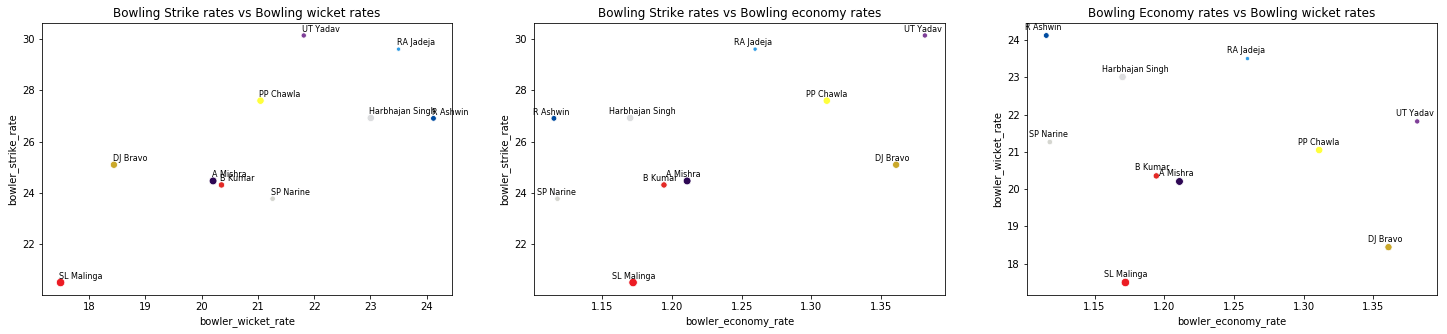

In [132]:
plt.figure(figsize=(25,5))

gs_bowler_1 = gridspec.GridSpec(1, 3)


plt.subplot(gs_bowler_1[0, 0])
p_bowler_1 = sns.scatterplot(x="bowler_wicket_rate", y="bowler_strike_rate",\
                     hue='bowler', hue_order=top_bowler_list,size='wickets',\
                     data=df_top_bowler_comparison, legend=False\
                     
                    )
for line in range(0,df_top_bowler_comparison.shape[0]):
  p_bowler_1.text(df_top_bowler_comparison.bowler_wicket_rate[line]-0.025,df_top_bowler_comparison.bowler_strike_rate[line]+0.15,df_top_bowler_comparison.bowler[line], fontsize=8)

p_bowler_1.set_title('Bowling Strike rates vs Bowling wicket rates')


plt.subplot(gs_bowler_1[0, 1])
p_bowler_2 = sns.scatterplot(x="bowler_economy_rate", y="bowler_strike_rate",\
                     hue='bowler', hue_order=top_bowler_list,size='wickets',\
                     data=df_top_bowler_comparison,\
                     legend=False
                    )
for line in range(0,df_top_bowler_comparison.shape[0]):
  p_bowler_2.text(df_top_bowler_comparison.bowler_economy_rate[line]-0.015,df_top_bowler_comparison.bowler_strike_rate[line]+0.15,df_top_bowler_comparison.bowler[line], fontsize=8)

p_bowler_2.set_title('Bowling Strike rates vs Bowling economy rates')

plt.subplot(gs_bowler_1[0, 2])
p_bowler_3 = sns.scatterplot(x="bowler_economy_rate", y="bowler_wicket_rate",\
                     hue='bowler', hue_order=top_bowler_list,size='wickets',\
                     data=df_top_bowler_comparison, legend=False\
                     
                    )
for line in range(0,df_top_bowler_comparison.shape[0]):
  p_bowler_3.text(df_top_bowler_comparison.bowler_economy_rate[line]-0.015,df_top_bowler_comparison.bowler_wicket_rate[line]+0.15,df_top_bowler_comparison.bowler[line], fontsize=8)

p_bowler_3.set_title('Bowling Economy rates vs Bowling wicket rates');




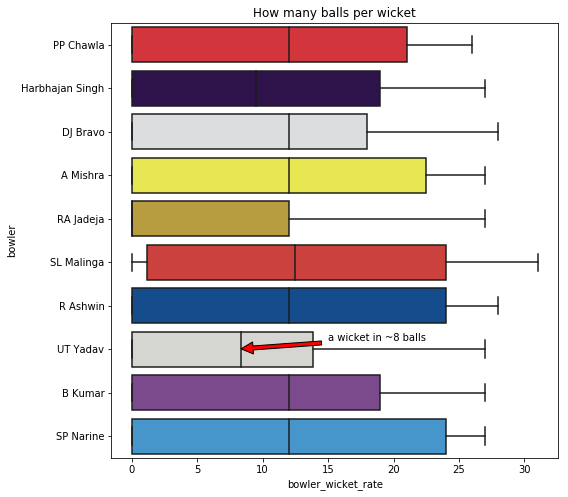

In [133]:
plt.figure(figsize=(8,8))
s_wickets = sns.boxplot(data=df_best_bowler,x='bowler_wicket_rate',y='bowler').set_title('How many balls per wicket');
plt.annotate('a wicket in ~8 balls', color="black", fontsize=10, xy=(8, 7.0), xytext=(15, 6.8),arrowprops=dict(facecolor='red', shrink=0.05));

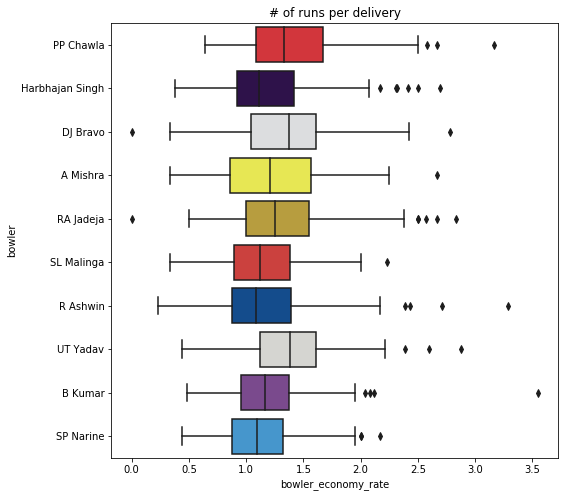

In [134]:
plt.figure(figsize=(8,8))
s_wickets = sns.boxplot(data=df_best_bowler,x='bowler_economy_rate',y='bowler').set_title('# of runs per delivery');

In [135]:
df_best_bowler['bowler_boundary_rate'] = df_best_bowler.apply(lambda row: calc_bowling_boundary_rate(row),axis=1)
df_best_bowler['bowler_farming_rate'] = df_best_bowler.apply(lambda row: calc_bowling_farming_rate(row),axis=1)
df_best_bowler['bowler_dot_rate'] = df_best_bowler.apply(lambda row: calc_bowling_dot_rate(row),axis=1)
df_best_bowler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1334
Data columns (total 43 columns):
match_id                                  1335 non-null int64
season                                    1335 non-null int64
bowler                                    1335 non-null object
balls_bowled                              1335 non-null int64
batsman_runs_conceded                     1335 non-null float64
total_runs_conceded                       1335 non-null float64
extras conceded                           1335 non-null float64
extras_wides                              1335 non-null float64
extras_noballs                            1335 non-null float64
extras_byes                               1335 non-null float64
extras_legbyes                            1335 non-null float64
wickets_incl_run_outs                     1335 non-null int64
wicket_type                               1335 non-null int64
dot_balls_bowled                          1335 non-null int64
1_run_ball

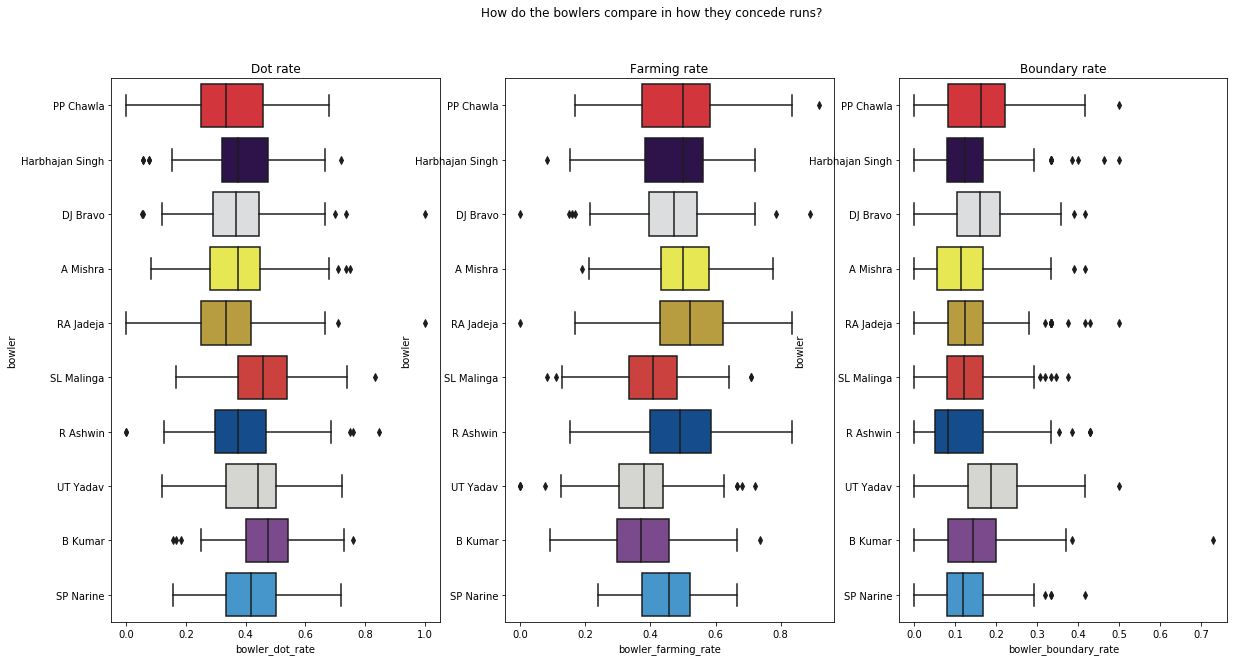

In [136]:
# How do bowlers compare in how they concede runs
grid_height = 1
grid_width = 3

fig_b = plt.figure(figsize=(20,10))
gs_b = gridspec.GridSpec(grid_height, grid_width)


plt.subplot(gs_b[0, 0])
sns.boxplot(data=df_best_bowler,x='bowler_dot_rate',y='bowler').set_title('Dot rate');

plt.subplot(gs_b[0, 1])
sns.boxplot(data=df_best_bowler,x='bowler_farming_rate',y='bowler').set_title('Farming rate');

plt.subplot(gs_b[0, 2])
sns.boxplot(data=df_best_bowler,x='bowler_boundary_rate',y='bowler').set_title('Boundary rate');

fig_b.suptitle('How do the bowlers compare in how they concede runs?');


## Malinga is the top wicket taker - However, has he always been consistent?

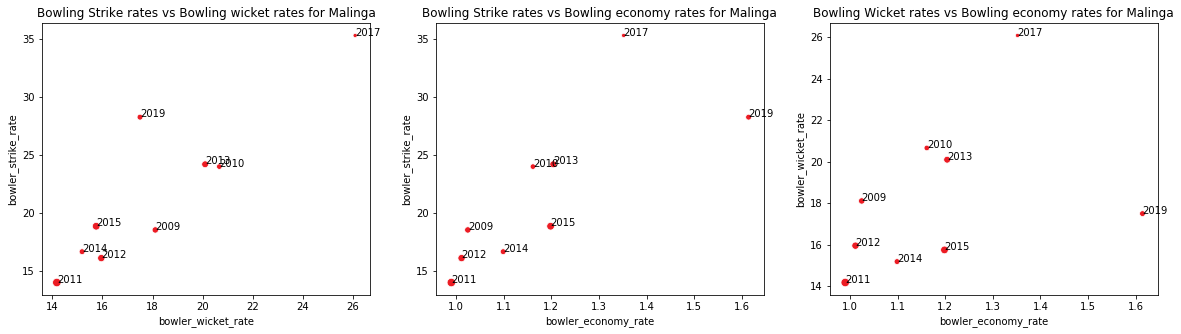

In [137]:
df_malinga_seasonal_stats = df_bowler_seasonal_stats.query('bowler=="SL Malinga"').reset_index()

fig_c = plt.figure(figsize=(20,5))
gs_c = gridspec.GridSpec(1, 3)


plt.subplot(gs_c[0, 0])
p_malinga_1 = sns.scatterplot(x="bowler_wicket_rate", y="bowler_strike_rate",\
                      size='wickets',\
                     data=df_malinga_seasonal_stats, legend=False\
                     
                    )
for line in range(0,df_malinga_seasonal_stats.shape[0]):
  p_malinga_1.text(df_malinga_seasonal_stats.bowler_wicket_rate[line],df_malinga_seasonal_stats.bowler_strike_rate[line],df_malinga_seasonal_stats.season[line])

p_malinga_1.set_title('Bowling Strike rates vs Bowling wicket rates for Malinga')



plt.subplot(gs_c[0, 1])
p_malinga_2 = sns.scatterplot(x="bowler_economy_rate", y="bowler_strike_rate",\
                      size='wickets',\
                     data=df_malinga_seasonal_stats, legend=False\
                     
                    )
for line in range(0,df_malinga_seasonal_stats.shape[0]):
  p_malinga_2.text(df_malinga_seasonal_stats.bowler_economy_rate[line],df_malinga_seasonal_stats.bowler_strike_rate[line],df_malinga_seasonal_stats.season[line])

p_malinga_2.set_title('Bowling Strike rates vs Bowling economy rates for Malinga')


plt.subplot(gs_c[0, 2])
p_malinga_3 = sns.scatterplot(x="bowler_economy_rate", y="bowler_wicket_rate",\
                      size='wickets',\
                     data=df_malinga_seasonal_stats, legend=False\
                     
                    )
for line in range(0,df_malinga_seasonal_stats.shape[0]):
  p_malinga_3.text(df_malinga_seasonal_stats.bowler_economy_rate[line],df_malinga_seasonal_stats.bowler_wicket_rate[line],df_malinga_seasonal_stats.season[line])

p_malinga_3.set_title('Bowling Wicket rates vs Bowling economy rates for Malinga')
plt.show(p_malinga_1)
plt.show(p_malinga_2)
plt.show(p_malinga_3)

In [138]:
df_malinga_seasonal_stats

,index,season,bowler,balls_bowled,wickets,total_runs_conceded,batsman_runs_conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,dot_balls_bowled,1_run_balls_bowled,2_run_balls_bowled,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,wicket_type_caught,wicket_type_bowled,wicket_type_lbw,wicket_type_stumped,wicket_type_run_out,wicket_type_hit_wicket,wicket_type_caught_and_bowled,wicket_type_retired_hurt,wicket_type_obstructing_the_field_flag,wicket_haul_6,wicket_haul_5,wicket_haul_4,wicket_haul_3,wicket_haul_2,wicket_haul_1,wicket_haul_0,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate
0,187,2009,SL Malinga,326,18.0,334.0,281.0,27.0,4.0,6.0,16.0,179,93,20,2,25,0,7,7.0,9.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0,0,0,3,1,7,2,1.024540,18.555556,18.111111
1,312,2010,SL Malinga,310,15.0,360.0,320.0,24.0,0.0,10.0,6.0,141,109,18,3,34,0,5,7.0,8.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0,0,1,1,3,2,6,1.161290,24.000000,20.666667
2,447,2011,SL Malinga,397,28.0,393.0,353.0,19.0,3.0,3.0,15.0,212,119,21,0,39,0,6,10.0,16.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0,1,0,2,7,3,3,0.989924,14.035714,14.178571
3,575,2012,SL Malinga,351,22.0,355.0,331.0,18.0,1.0,0.0,5.0,165,125,23,2,31,0,5,11.0,7.0,2.0,0.0,3.0,0.0,2.0,0.0,0.0,0,0,1,2,5,2,4,1.011396,16.136364,15.954545
4,711,2013,SL Malinga,402,20.0,484.0,453.0,12.0,3.0,1.0,15.0,170,151,20,0,52,0,9,7.0,7.0,5.0,0.0,3.0,0.0,1.0,0.0,0.0,0,0,0,1,5,7,4,1.203980,24.200000,20.100000
5,811,2014,SL Malinga,243,16.0,267.0,244.0,8.0,1.0,0.0,9.0,112,86,17,0,22,0,6,10.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,4,4,1,1.098765,16.687500,15.187500
6,911,2015,SL Malinga,378,24.0,453.0,425.0,15.0,4.0,2.0,7.0,164,133,25,0,47,0,9,17.0,6.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0,0,1,1,5,7,1,1.198413,18.875000,15.750000
7,1120,2017,SL Malinga,287,11.0,388.0,359.0,20.0,2.0,0.0,7.0,113,107,24,0,27,0,16,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3,5,4,1.351916,35.272727,26.090909
8,1324,2019,SL Malinga,280,16.0,452.0,427.0,9.0,2.0,6.0,8.0,102,98,19,0,37,1,23,14.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0,0,2,2,0,2,6,1.614286,28.250000,17.500000


# Last 3 Years bowling comparison

### Who have performed the best bowling over the 2017 to 2019 seasons

In [139]:
top_bowlers_last_3_years = df_bowler.query('season == 2017 | season == 2018 |season == 2019').groupby(['bowler'],as_index=False)['balls_bowled', 'wickets','total_runs_conceded','batsman_runs_conceded', \
                      'extras conceded', 'extras_wides', 'extras_noballs', 'extras_byes','extras_legbyes',\
                      'wickets_incl_run_outs', 'wicket_type_caught', 'wicket_type_bowled','wicket_type_lbw', 'wicket_type_stumped',\
                      'wicket_type_run_out','wicket_type_hit_wicket', 'wicket_type_caught_and_bowled',\
                      'wicket_type_retired_hurt', 'wicket_type_obstructing_the_field_flag',\
                      'dot_balls_bowled', '1_run_balls_bowled','2_run_balls_bowled', '3_run_balls_bowled',\
                      '4_run_balls_bowled','5_run_balls_bowled', '6_run_balls_bowled', 'wicket_haul_6', \
                      'wicket_haul_5', 'wicket_haul_4','wicket_haul_3', 'wicket_haul_2', 'wicket_haul_1', 'wicket_haul_0']\
.agg('sum')\
.sort_values(by=['wickets'],ascending=False).head(10)['bowler']

top_bowlers_last_3_years

62          JJ Bumrah
124       Rashid Khan
56        Imran Tahir
20            B Kumar
61         JD Unadkat
159          UT Yadav
165         YS Chahal
130            S Kaul
148    Sandeep Sharma
9              AJ Tye
Name: bowler, dtype: object

In [140]:
df_top_bowler_comparison_last_3_years = df_bowler_seasonal_stats.query('season == 2017 | season == 2018 |season == 2019').groupby('bowler',as_index=False)['wickets','balls_bowled','total_runs_conceded','batsman_runs_conceded',\
                                                                                     'extras_wides','extras_noballs','extras_byes','extras_legbyes',\
                                                                                     'wicket_haul_6','wicket_haul_5','wicket_haul_4','wicket_haul_3',\
                                                                                     'wicket_haul_2','wicket_haul_1','wicket_haul_0',\
                                                                                     'dot_balls_bowled','1_run_balls_bowled', '2_run_balls_bowled', '3_run_balls_bowled',\
                                                                                     '4_run_balls_bowled', '5_run_balls_bowled', '6_run_balls_bowled',\
                                                                                     ].sum().query('bowler in @top_bowlers_last_3_years') 

df_top_bowler_comparison_last_3_years['bowler_economy_rate'] = df_top_bowler_comparison_last_3_years.apply(lambda row: calc_bowling_economy_rate(row),axis=1)
df_top_bowler_comparison_last_3_years['bowler_strike_rate'] = df_top_bowler_comparison_last_3_years.apply(lambda row: calc_bowling_strike_rate(row),axis=1)
df_top_bowler_comparison_last_3_years['bowler_wicket_rate'] = df_top_bowler_comparison_last_3_years.apply(lambda row: calc_balls_bowled_per_wicket(row),axis=1)

df_top_bowler_comparison_last_3_years['bowler_boundary_rate'] = df_top_bowler_comparison_last_3_years.apply(lambda row: calc_bowling_boundary_rate(row),axis=1)
df_top_bowler_comparison_last_3_years['bowler_farming_rate'] = df_top_bowler_comparison_last_3_years.apply(lambda row: calc_bowling_farming_rate(row),axis=1)
df_top_bowler_comparison_last_3_years['bowler_dot_rate'] = df_top_bowler_comparison_last_3_years.apply(lambda row: calc_bowling_dot_rate(row),axis=1)


df_top_bowler_comparison_last_3_years = df_top_bowler_comparison_last_3_years.sort_values(by=['wickets','balls_bowled','total_runs_conceded',\
                                                                    'wicket_haul_6','wicket_haul_5','wicket_haul_4'],\
                                                                ascending=False).reset_index(drop=True)

df_top_bowler_comparison_last_3_years

,bowler,wickets,balls_bowled,total_runs_conceded,batsman_runs_conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,wicket_haul_6,wicket_haul_5,wicket_haul_4,wicket_haul_3,wicket_haul_2,wicket_haul_1,wicket_haul_0,dot_balls_bowled,1_run_balls_bowled,2_run_balls_bowled,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate,bowler_boundary_rate,bowler_farming_rate,bowler_dot_rate
0,JJ Bumrah,56.0,1076,1257.0,1190.0,18.0,14.0,9.0,26.0,0,0,0,4,13,18,11,448,408,76,6,108,0,30,1.168216,22.446429,19.214286,0.128253,0.455390,0.416357
1,Rashid Khan,55.0,1103,1221.0,1178.0,15.0,0.0,5.0,23.0,0,0,0,6,7,23,10,473,446,48,0,90,0,46,1.106981,22.200000,20.054545,0.123300,0.447869,0.428830
2,Imran Tahir,50.0,800,1003.0,976.0,11.0,1.0,8.0,7.0,0,0,2,4,8,14,7,291,354,47,0,60,0,48,1.253750,20.060000,16.000000,0.135000,0.501250,0.363750
3,B Kumar,48.0,977,1207.0,1150.0,30.0,4.0,4.0,19.0,0,1,0,3,11,12,14,452,298,68,3,114,1,41,1.235415,25.145833,20.354167,0.159672,0.377687,0.462641
4,UT Yadav,45.0,873,1231.0,1160.0,36.0,3.0,6.0,26.0,0,0,1,5,7,12,14,399,255,39,2,123,1,54,1.410080,27.355556,19.400000,0.203895,0.339061,0.457045
5,JD Unadkat,45.0,825,1220.0,1182.0,23.0,1.0,0.0,14.0,0,1,0,2,8,18,9,305,299,57,4,101,1,58,1.478788,27.111111,18.333333,0.193939,0.436364,0.369697
6,YS Chahal,44.0,892,1119.0,1041.0,36.0,5.0,21.0,16.0,0,0,1,2,9,16,13,378,337,57,2,62,0,56,1.254484,25.431818,20.272727,0.132287,0.443946,0.423767
7,S Kaul,43.0,792,1104.0,1069.0,16.0,4.0,4.0,11.0,0,0,1,3,10,10,10,274,329,50,0,97,0,42,1.393939,25.674419,18.418605,0.175505,0.478535,0.345960
8,Sandeep Sharma,41.0,838,1091.0,1053.0,29.0,1.0,0.0,8.0,0,0,1,2,8,15,10,347,294,54,1,102,0,40,1.301909,26.609756,20.439024,0.169451,0.416468,0.414081
9,AJ Tye,39.0,618,838.0,798.0,22.0,2.0,0.0,16.0,0,1,3,1,7,5,9,218,256,43,1,73,1,26,1.355987,21.487179,15.846154,0.161812,0.485437,0.352751


#### Bumrah, Rashid Khan, Imran Tahir and Bhuvaneshwar Kumar have had the best bowling figures

In [141]:
df_top_bowler_comparison_last_3_years[['bowler','wickets','balls_bowled','total_runs_conceded','bowler_strike_rate','bowler_wicket_rate']]

,bowler,wickets,balls_bowled,total_runs_conceded,bowler_strike_rate,bowler_wicket_rate
0,JJ Bumrah,56.0,1076,1257.0,22.446429,19.214286
1,Rashid Khan,55.0,1103,1221.0,22.200000,20.054545
2,Imran Tahir,50.0,800,1003.0,20.060000,16.000000
3,B Kumar,48.0,977,1207.0,25.145833,20.354167
4,UT Yadav,45.0,873,1231.0,27.355556,19.400000
5,JD Unadkat,45.0,825,1220.0,27.111111,18.333333
6,YS Chahal,44.0,892,1119.0,25.431818,20.272727
7,S Kaul,43.0,792,1104.0,25.674419,18.418605
8,Sandeep Sharma,41.0,838,1091.0,26.609756,20.439024
9,AJ Tye,39.0,618,838.0,21.487179,15.846154


#### Lets plot the efficiency rates

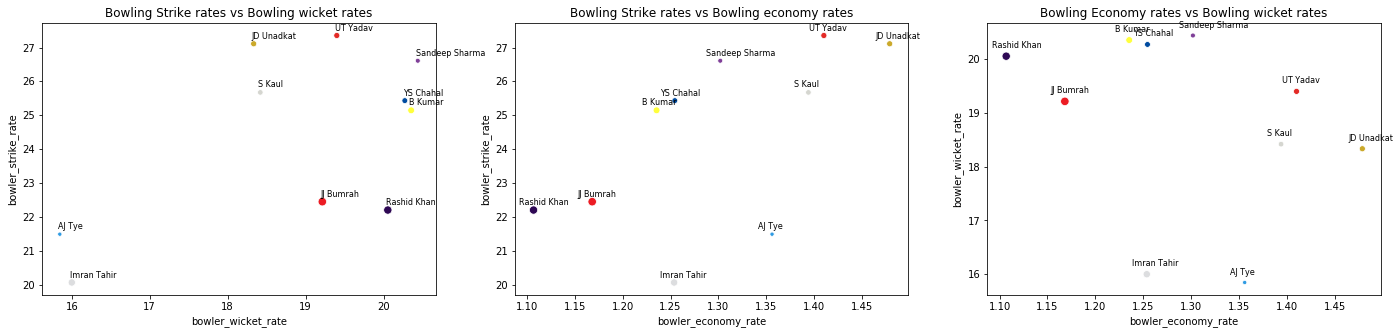

In [142]:
plt.figure(figsize=(24,5))

gs_bowler_3 = gridspec.GridSpec(1, 3)


plt.subplot(gs_bowler_3[0, 0])
p_bowler_11 = sns.scatterplot(x="bowler_wicket_rate", y="bowler_strike_rate",\
                     hue='bowler', hue_order=top_bowlers_last_3_years,size='wickets',\
                     data=df_top_bowler_comparison_last_3_years, legend=False\
                     
                    )
for line in range(0,df_top_bowler_comparison_last_3_years.shape[0]):
  p_bowler_11.text(df_top_bowler_comparison_last_3_years.bowler_wicket_rate[line]-0.025,df_top_bowler_comparison_last_3_years.bowler_strike_rate[line]+0.15,df_top_bowler_comparison_last_3_years.bowler[line], fontsize=8)

p_bowler_11.set_title('Bowling Strike rates vs Bowling wicket rates')


plt.subplot(gs_bowler_3[0, 1])
p_bowler_21 = sns.scatterplot(x="bowler_economy_rate", y="bowler_strike_rate",\
                     hue='bowler', hue_order=top_bowlers_last_3_years,size='wickets',\
                     data=df_top_bowler_comparison_last_3_years,\
                     legend=False
                    )
for line in range(0,df_top_bowler_comparison_last_3_years.shape[0]):
  p_bowler_21.text(df_top_bowler_comparison_last_3_years.bowler_economy_rate[line]-0.015,df_top_bowler_comparison_last_3_years.bowler_strike_rate[line]+0.15,df_top_bowler_comparison_last_3_years.bowler[line], fontsize=8)

p_bowler_21.set_title('Bowling Strike rates vs Bowling economy rates')

plt.subplot(gs_bowler_3[0, 2])
p_bowler_31 = sns.scatterplot(x="bowler_economy_rate", y="bowler_wicket_rate",\
                     hue='bowler', hue_order=top_bowlers_last_3_years,size='wickets',\
                     data=df_top_bowler_comparison_last_3_years, legend=False\
                     
                    )
for line in range(0,df_top_bowler_comparison_last_3_years.shape[0]):
  p_bowler_31.text(df_top_bowler_comparison_last_3_years.bowler_economy_rate[line]-0.015,df_top_bowler_comparison_last_3_years.bowler_wicket_rate[line]+0.15,df_top_bowler_comparison_last_3_years.bowler[line], fontsize=8)

p_bowler_31.set_title('Bowling Economy rates vs Bowling wicket rates');



# 2019 Bowling Performance

#### Now, lets look at only 2019 performances

In [143]:
top_bowlers_2019 = df_bowler.query('season == 2019').groupby(['bowler'],as_index=False)['balls_bowled', 'wickets','total_runs_conceded','batsman_runs_conceded', \
                      'extras conceded', 'extras_wides', 'extras_noballs', 'extras_byes','extras_legbyes',\
                      'wickets_incl_run_outs', 'wicket_type_caught', 'wicket_type_bowled','wicket_type_lbw', 'wicket_type_stumped',\
                      'wicket_type_run_out','wicket_type_hit_wicket', 'wicket_type_caught_and_bowled',\
                      'wicket_type_retired_hurt', 'wicket_type_obstructing_the_field_flag',\
                      'dot_balls_bowled', '1_run_balls_bowled','2_run_balls_bowled', '3_run_balls_bowled',\
                      '4_run_balls_bowled','5_run_balls_bowled', '6_run_balls_bowled', 'wicket_haul_6', \
                      'wicket_haul_5', 'wicket_haul_4','wicket_haul_3', 'wicket_haul_2', 'wicket_haul_1', 'wicket_haul_0']\
.agg('sum')\
.sort_values(by=['wickets'],ascending=False).head(10)['bowler']



df_top_bowler_comparison_2019 = df_bowler_seasonal_stats.query('season==2019').groupby('bowler',as_index=False)['wickets','balls_bowled','total_runs_conceded','batsman_runs_conceded',\
                                                                                     'extras_wides','extras_noballs','extras_byes','extras_legbyes',\
                                                                                     'wicket_haul_6','wicket_haul_5','wicket_haul_4','wicket_haul_3',\
                                                                                     'wicket_haul_2','wicket_haul_1','wicket_haul_0',\
                                                                                     'dot_balls_bowled','1_run_balls_bowled', '2_run_balls_bowled', '3_run_balls_bowled',\
                                                                                     '4_run_balls_bowled', '5_run_balls_bowled', '6_run_balls_bowled',\
                                                                                     ].sum().query('bowler in @top_bowlers_2019') 

df_top_bowler_comparison_2019['bowler_economy_rate'] = df_top_bowler_comparison_2019.apply(lambda row: calc_bowling_economy_rate(row),axis=1)
df_top_bowler_comparison_2019['bowler_strike_rate'] = df_top_bowler_comparison_2019.apply(lambda row: calc_bowling_strike_rate(row),axis=1)
df_top_bowler_comparison_2019['bowler_wicket_rate'] = df_top_bowler_comparison_2019.apply(lambda row: calc_balls_bowled_per_wicket(row),axis=1)

df_top_bowler_comparison_2019['bowler_boundary_rate'] = df_top_bowler_comparison_2019.apply(lambda row: calc_bowling_boundary_rate(row),axis=1)
df_top_bowler_comparison_2019['bowler_farming_rate'] = df_top_bowler_comparison_2019.apply(lambda row: calc_bowling_farming_rate(row),axis=1)
df_top_bowler_comparison_2019['bowler_dot_rate'] = df_top_bowler_comparison_2019.apply(lambda row: calc_bowling_dot_rate(row),axis=1)


df_top_bowler_comparison_2019 = df_top_bowler_comparison_2019.sort_values(by=['wickets','balls_bowled','total_runs_conceded',\
                                                                    'wicket_haul_6','wicket_haul_5','wicket_haul_4'],\
                                                                ascending=False).reset_index(drop=True)

df_top_bowler_comparison_2019

,bowler,wickets,balls_bowled,total_runs_conceded,batsman_runs_conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,wicket_haul_6,wicket_haul_5,wicket_haul_4,wicket_haul_3,wicket_haul_2,wicket_haul_1,wicket_haul_0,dot_balls_bowled,1_run_balls_bowled,2_run_balls_bowled,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate,bowler_boundary_rate,bowler_farming_rate,bowler_dot_rate
0,Imran Tahir,26.0,388,440.0,426.0,5.0,0.0,4.0,5.0,0,0,2,1,5,5,4,151,174,18,0,27,0,18,1.134021,16.923077,14.923077,0.115979,0.494845,0.389175
1,K Rabada,25.0,292,375.0,356.0,12.0,0.0,3.0,4.0,0,0,2,0,7,3,0,123,100,20,0,39,0,10,1.284247,15.000000,11.680000,0.167808,0.410959,0.421233
2,DL Chahar,22.0,400,486.0,469.0,10.0,3.0,0.0,4.0,0,0,0,2,4,8,3,201,102,22,2,60,1,12,1.215000,22.090909,18.181818,0.182500,0.315000,0.502500
3,S Gopal,20.0,289,350.0,346.0,0.0,1.0,1.0,2.0,0,0,0,3,5,1,5,107,128,16,0,21,0,17,1.211073,17.500000,14.450000,0.131488,0.498270,0.370242
4,JJ Bumrah,19.0,378,425.0,400.0,5.0,4.0,5.0,11.0,0,0,0,1,6,4,5,174,131,21,1,41,0,10,1.124339,22.368421,19.894737,0.134921,0.404762,0.460317
5,Mohammed Shami,19.0,331,477.0,461.0,7.0,1.0,3.0,5.0,0,0,0,1,5,6,2,126,119,20,0,47,0,19,1.441088,25.105263,17.421053,0.199396,0.419940,0.380665
6,KK Ahmed,19.0,222,292.0,274.0,13.0,0.0,2.0,3.0,0,0,0,5,1,2,1,100,73,8,1,29,0,11,1.315315,15.368421,11.684211,0.180180,0.369369,0.450450
7,YS Chahal,18.0,308,394.0,374.0,12.0,0.0,5.0,3.0,0,0,1,0,4,6,3,129,114,22,0,21,0,22,1.279221,21.888889,17.111111,0.139610,0.441558,0.418831
8,Rashid Khan,17.0,364,387.0,371.0,6.0,0.0,4.0,6.0,0,0,0,1,2,10,2,170,135,14,0,31,0,14,1.063187,22.764706,21.411765,0.123626,0.409341,0.467033
9,SL Malinga,16.0,280,452.0,427.0,9.0,2.0,6.0,8.0,0,0,2,2,0,2,6,102,98,19,0,37,1,23,1.614286,28.250000,17.500000,0.217857,0.417857,0.364286


#### We now have Rabada and Chahar making it into the top 3. Malinga is back in top 10 at #10

In [144]:
df_top_bowler_comparison_2019[['bowler','wickets','balls_bowled','total_runs_conceded','bowler_strike_rate','bowler_wicket_rate']]

,bowler,wickets,balls_bowled,total_runs_conceded,bowler_strike_rate,bowler_wicket_rate
0,Imran Tahir,26.0,388,440.0,16.923077,14.923077
1,K Rabada,25.0,292,375.0,15.000000,11.680000
2,DL Chahar,22.0,400,486.0,22.090909,18.181818
3,S Gopal,20.0,289,350.0,17.500000,14.450000
4,JJ Bumrah,19.0,378,425.0,22.368421,19.894737
5,Mohammed Shami,19.0,331,477.0,25.105263,17.421053
6,KK Ahmed,19.0,222,292.0,15.368421,11.684211
7,YS Chahal,18.0,308,394.0,21.888889,17.111111
8,Rashid Khan,17.0,364,387.0,22.764706,21.411765
9,SL Malinga,16.0,280,452.0,28.250000,17.500000


In [145]:
df_bowler_seasonal_stats.query('season==2019').head()

,season,bowler,balls_bowled,wickets,total_runs_conceded,batsman_runs_conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,dot_balls_bowled,1_run_balls_bowled,2_run_balls_bowled,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,wicket_type_caught,wicket_type_bowled,wicket_type_lbw,wicket_type_stumped,wicket_type_run_out,wicket_type_hit_wicket,wicket_type_caught_and_bowled,wicket_type_retired_hurt,wicket_type_obstructing_the_field_flag,wicket_haul_6,wicket_haul_5,wicket_haul_4,wicket_haul_3,wicket_haul_2,wicket_haul_1,wicket_haul_0,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate
1237,2019,A Mishra,243,11.0,271.0,267.0,3.0,0.0,0.0,1.0,86,115,18,0,14,0,10,8.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,2,4,4,1.115226,24.636364,22.090909
1238,2019,AD Russell,182,11.0,288.0,286.0,1.0,0.0,0.0,1.0,62,66,12,0,28,0,14,8.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,3,5,4,1.582418,26.181818,16.545455
1239,2019,AJ Tye,137,3.0,233.0,228.0,5.0,0.0,0.0,0.0,35,58,12,0,23,0,9,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,3,3,1.700730,77.666667,45.666667
1240,2019,AR Patel,307,10.0,368.0,363.0,1.0,0.0,4.0,0.0,111,143,13,0,23,0,17,6.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0,0,0,0,1,8,5,1.198697,36.800000,30.700000
1241,2019,AS Joseph,55,6.0,89.0,84.0,3.0,0.0,1.0,1.0,28,10,2,0,10,0,5,2.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,2,1.618182,14.833333,9.166667


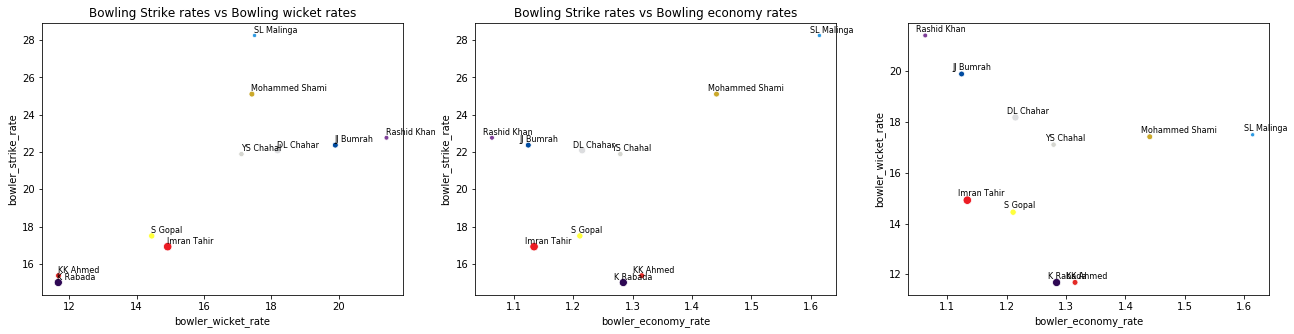

In [146]:
plt.figure(figsize=(22,5))

gs_bowler_3 = gridspec.GridSpec(1, 3)


plt.subplot(gs_bowler_3[0, 0])
p_bowler_12 = sns.scatterplot(x="bowler_wicket_rate", y="bowler_strike_rate",\
                     hue='bowler', hue_order=top_bowlers_2019,size='wickets',\
                     data=df_top_bowler_comparison_2019, legend=False\
                     
                    )
for line in range(0,df_top_bowler_comparison_2019.shape[0]):
  p_bowler_12.text(df_top_bowler_comparison_2019.bowler_wicket_rate[line]-0.025,df_top_bowler_comparison_2019.bowler_strike_rate[line]+0.15,df_top_bowler_comparison_2019.bowler[line], fontsize=8)

p_bowler_12.set_title('Bowling Strike rates vs Bowling wicket rates')


plt.subplot(gs_bowler_3[0, 1])
p_bowler_22 = sns.scatterplot(x="bowler_economy_rate", y="bowler_strike_rate",\
                     hue='bowler', hue_order=top_bowlers_2019,size='wickets',\
                     data=df_top_bowler_comparison_2019,\
                     legend=False
                    )
for line in range(0,df_top_bowler_comparison_2019.shape[0]):
  p_bowler_22.text(df_top_bowler_comparison_2019.bowler_economy_rate[line]-0.015,df_top_bowler_comparison_2019.bowler_strike_rate[line]+0.15,df_top_bowler_comparison_2019.bowler[line], fontsize=8)

p_bowler_22.set_title('Bowling Strike rates vs Bowling economy rates')

plt.subplot(gs_bowler_3[0, 2])
p_bowler_32 = sns.scatterplot(x="bowler_economy_rate", y="bowler_wicket_rate",\
                     hue='bowler', hue_order=top_bowlers_2019,size='wickets',\
                     data=df_top_bowler_comparison_2019, legend=False\
                     
                    )
for line in range(0,df_top_bowler_comparison_2019.shape[0]):
  p_bowler_32.text(df_top_bowler_comparison_2019.bowler_economy_rate[line]-0.015,df_top_bowler_comparison_2019.bowler_wicket_rate[line]+0.15,df_top_bowler_comparison_2019.bowler[line], fontsize=8)

p_bowler_31.set_title('Bowling Economy rates vs Bowling wicket rates');


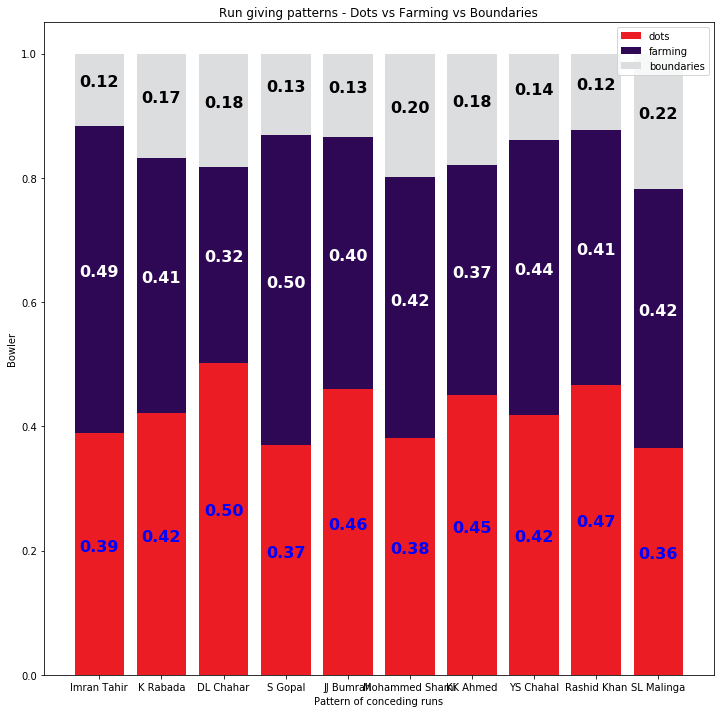

In [147]:
plt.figure(figsize=(12,12))

p_bowler_2019_dot = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['bowler_dot_rate'])
p_bowler_2019_farming = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['bowler_farming_rate'],\
                                 bottom=df_top_bowler_comparison_2019['bowler_dot_rate'])
p_bowler_2019_boundary = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['bowler_boundary_rate'],\
                                  bottom=df_top_bowler_comparison_2019['bowler_dot_rate']+df_top_bowler_comparison_2019['bowler_farming_rate'])


for r1, r2, r3 in zip(p_bowler_2019_dot, p_bowler_2019_farming, p_bowler_2019_boundary):
    w1 = r1.get_width()
    w2 = r2.get_width()
    w3 = r3.get_width()
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x()+w1/2.,r1.get_y()+h1/2.,"%.2f" % h1,ha="center", va="bottom", color="blue", fontsize=16, fontweight="bold")
    plt.text(r2.get_x()+w2/2.,r2.get_y()+h2/2.,"%.2f" % h2,ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
    plt.text(r3.get_x()+w3/2.,r3.get_y()+h3/2.,"%.2f" % h3,ha="center", va="bottom", color="black", fontsize=16, fontweight="bold")
        
    

plt.ylabel('Bowler')
plt.xlabel('Pattern of conceding runs')
plt.title('Run giving patterns - Dots vs Farming vs Boundaries')

plt.legend((p_bowler_2019_dot,p_bowler_2019_farming,p_bowler_2019_boundary),('dots','farming','boundaries'),loc='best')

plt.show()

#### Half of Chahar's deliveries dont yield a run

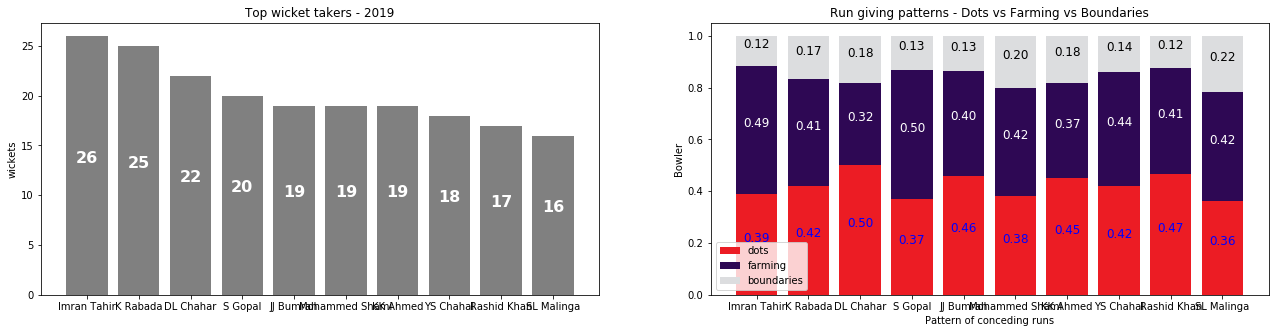

In [148]:
plt.figure(figsize=(22,5))

gs_bowler_4 = gridspec.GridSpec(1, 2)


plt.subplot(gs_bowler_4[0, 0])


p_bowler_2019_dot = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['wickets'],color='grey')

plt.title('Top wicket takers - 2019')
plt.ylabel('wickets')
for r1 in p_bowler_2019_dot:
    w1 = r1.get_width()
    h1 = r1.get_height()
    plt.text(r1.get_x()+w1/2.,r1.get_y()+h1/2.,"%.0f" % h1,ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
        
plt.subplot(gs_bowler_4[0, 1])    

p_bowler_2019_dot = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['bowler_dot_rate'])
p_bowler_2019_farming = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['bowler_farming_rate'],\
                                 bottom=df_top_bowler_comparison_2019['bowler_dot_rate'])
p_bowler_2019_boundary = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['bowler_boundary_rate'],\
                                  bottom=df_top_bowler_comparison_2019['bowler_dot_rate']+df_top_bowler_comparison_2019['bowler_farming_rate'])


for r1, r2, r3 in zip(p_bowler_2019_dot, p_bowler_2019_farming, p_bowler_2019_boundary):
    w1 = r1.get_width()
    w2 = r2.get_width()
    w3 = r3.get_width()
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x()+w1/2.,r1.get_y()+h1/2.,"%.2f" % h1,ha="center", va="bottom", color="blue", fontsize=12)
    plt.text(r2.get_x()+w2/2.,r2.get_y()+h2/2.,"%.2f" % h2,ha="center", va="bottom", color="white", fontsize=12)
    plt.text(r3.get_x()+w3/2.,r3.get_y()+h3/2.,"%.2f" % h3,ha="center", va="bottom", color="black", fontsize=12)
        
    

plt.ylabel('Bowler')
plt.xlabel('Pattern of conceding runs')
plt.title('Run giving patterns - Dots vs Farming vs Boundaries')

plt.legend((p_bowler_2019_dot,p_bowler_2019_farming,p_bowler_2019_boundary),('dots','farming','boundaries'),loc='best')

plt.show()

In [149]:
df_bowler.head()

,match_id,season,bowler,balls_bowled,batsman_runs_conceded,total_runs_conceded,extras conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,wickets_incl_run_outs,wicket_type,dot_balls_bowled,1_run_balls_bowled,2_run_balls_bowled,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,wicket_type_caught,wicket_type_bowled,wicket_type_lbw,wicket_type_stumped,wicket_type_run_out,wicket_type_hit_wicket,wicket_type_caught_and_bowled,wicket_type_retired_hurt,wicket_type_obstructing_the_field_flag,wickets,wicket_haul_6,wicket_haul_5,wicket_haul_4,wicket_haul_3,wicket_haul_2,wicket_haul_1,wicket_haul_0,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate
0,335982,2008,AA Noffke,25,35.0,41.0,6.0,5.0,0.0,0.0,1.0,1,1,8,11,2,0,2,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,1,0,1.640000,41.000000,25.000000
1,335982,2008,AB Agarkar,28,21.0,25.0,4.0,4.0,0.0,0.0,0.0,3,3,19,5,1,0,2,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,0,0,1,0,0,0,0.892857,8.333333,9.333333
2,335982,2008,AB Dinda,20,7.0,9.0,2.0,2.0,0.0,0.0,0.0,2,2,13,7,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0,1,0,0,0.450000,4.500000,10.000000
3,335982,2008,CL White,7,22.0,24.0,2.0,2.0,0.0,0.0,0.0,0,0,1,2,0,0,2,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,3.428571,0.000000,0.000000
4,335982,2008,I Sharma,19,6.0,13.0,7.0,1.0,0.0,0.0,6.0,1,1,14,4,1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,1,0,0.684211,13.000000,19.000000


# IPL All-time fielder performance

In [150]:
df_combined['kind'].value_counts()

caught                   5299
bowled                   1578
run out                   850
lbw                       539
stumped                   284
caught and bowled         254
retired hurt               11
hit wicket                 10
obstructing the field       2
Name: kind, dtype: int64

In [151]:
df_combined.query('kind == "caught"').head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,over,fielder_1,fielder_2,fielder_3,delivery_in_over,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag,match_date,season,match_id_ipl_summary,toss_decision,eliminator,method,neutral_venue,player_of_match,result,venue,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date_ipl_summary,season_ipl_summary,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4
9,PA Patel,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,1.4,548314,NaN,S Dhawan,PA Patel,0.0,NaN,NaN,NaN,2,RG Sharma,None,None,4,Q1,RG Sharma,MM Patel,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,2012-04-09,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,B Chipli,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,3.1,548314,NaN,S Dhawan,B Chipli,0.0,NaN,NaN,NaN,4,SL Malinga,None,None,1,Q1,SL Malinga,MM Patel,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,2012-04-09,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,S Dhawan,0.0,DC-Chargers,SL Malinga,NaN,0.0,caught,NaN,inning_1,6.6,548314,NaN,DT Christian,S Dhawan,0.0,NaN,NaN,NaN,7,KA Pollard,None,None,6,Q2,KA Pollard,SL Malinga,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,2012-04-09,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,DT Christian,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,17.6,548314,NaN,CL White,DT Christian,0.0,NaN,NaN,NaN,18,KA Pollard,None,None,6,Q4,KA Pollard,MM Patel,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,2012-04-09,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,A Mishra,0.0,DC-Chargers,SL Malinga,NaN,0.0,caught,NaN,inning_1,18.4,548314,NaN,CL White,A Mishra,0.0,NaN,NaN,NaN,19,MM Patel,None,None,4,Q4,MM Patel,SL Malinga,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,2012-04-09,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
df_combined.head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,over,fielder_1,fielder_2,fielder_3,delivery_in_over,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag,match_date,season,match_id_ipl_summary,toss_decision,eliminator,method,neutral_venue,player_of_match,result,venue,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date_ipl_summary,season_ipl_summary,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4
0,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,1,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,2012-04-09,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,2012-04-09,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PA Patel,1.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,1,NaN,NaN,NaN,3,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,2012-04-09,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,4,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,2012-04-09,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,5,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,2012-04-09,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
fielder_cols = ['match_id','match_date','season','batsman','non_striker','player_out','bowler',\
                'fielder_1','fielder_2','fielder_3',\
                'caught_flag','lbw_flag','bowled_flag','stumped_flag','run_out_flag','hit_wicket_flag',\
                'caught_and_bowled_flag','retired_hurt_flag','obstructing_the_field_flag']


df_fielders = df_combined[fielder_cols]
df_fielders.dropna(how='any',subset=['player_out'],axis=0,inplace=True)
df_fielders.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,match_id,match_date,season,batsman,non_striker,player_out,bowler,fielder_1,fielder_2,fielder_3,caught_flag,lbw_flag,bowled_flag,stumped_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag
9,548314,2012-04-09,2012,PA Patel,S Dhawan,PA Patel,MM Patel,RG Sharma,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,548314,2012-04-09,2012,B Chipli,S Dhawan,B Chipli,MM Patel,SL Malinga,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,548314,2012-04-09,2012,S Dhawan,DT Christian,S Dhawan,SL Malinga,KA Pollard,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,548314,2012-04-09,2012,KC Sangakkara,DT Christian,KC Sangakkara,MM Patel,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
109,548314,2012-04-09,2012,DT Christian,CL White,DT Christian,MM Patel,KA Pollard,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
df_fielders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8827 entries, 9 to 178945
Data columns (total 19 columns):
match_id                      8827 non-null int64
match_date                    8827 non-null datetime64[ns]
season                        8827 non-null int64
batsman                       8827 non-null object
non_striker                   8827 non-null object
player_out                    8827 non-null object
bowler                        8827 non-null object
fielder_1                     6338 non-null object
fielder_2                     391 non-null object
fielder_3                     11 non-null object
caught_flag                   5299 non-null float64
lbw_flag                      539 non-null float64
bowled_flag                   1578 non-null float64
stumped_flag                  284 non-null float64
run_out_flag                  850 non-null float64
hit_wicket_flag               10 non-null float64
caught_and_bowled_flag        254 non-null float64
retired_hurt_flag   

In [155]:
df_fielders.head()

,match_id,match_date,season,batsman,non_striker,player_out,bowler,fielder_1,fielder_2,fielder_3,caught_flag,lbw_flag,bowled_flag,stumped_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag
9,548314,2012-04-09,2012,PA Patel,S Dhawan,PA Patel,MM Patel,RG Sharma,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,548314,2012-04-09,2012,B Chipli,S Dhawan,B Chipli,MM Patel,SL Malinga,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,548314,2012-04-09,2012,S Dhawan,DT Christian,S Dhawan,SL Malinga,KA Pollard,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,548314,2012-04-09,2012,KC Sangakkara,DT Christian,KC Sangakkara,MM Patel,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
109,548314,2012-04-09,2012,DT Christian,CL White,DT Christian,MM Patel,KA Pollard,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:

df_wicket_details = pd.melt(df_fielders,\
                            id_vars=['match_id','match_date','season','batsman','non_striker','player_out','bowler','fielder_1','fielder_2','fielder_3'],\
                            var_name='wicket_type', \
                            value_name='wicket')
df_wicket_details.dropna(how='any',subset=['wicket'],axis=0,inplace=True)
df_wicket_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8827 entries, 0 to 79054
Data columns (total 12 columns):
match_id       8827 non-null int64
match_date     8827 non-null datetime64[ns]
season         8827 non-null int64
batsman        8827 non-null object
non_striker    8827 non-null object
player_out     8827 non-null object
bowler         8827 non-null object
fielder_1      6338 non-null object
fielder_2      391 non-null object
fielder_3      11 non-null object
wicket_type    8827 non-null object
wicket         8827 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 896.5+ KB


In [157]:
df_wicket_details.head()

,match_id,match_date,season,batsman,non_striker,player_out,bowler,fielder_1,fielder_2,fielder_3,wicket_type,wicket
0,548314,2012-04-09,2012,PA Patel,S Dhawan,PA Patel,MM Patel,RG Sharma,None,None,caught_flag,1.0
1,548314,2012-04-09,2012,B Chipli,S Dhawan,B Chipli,MM Patel,SL Malinga,None,None,caught_flag,1.0
2,548314,2012-04-09,2012,S Dhawan,DT Christian,S Dhawan,SL Malinga,KA Pollard,None,None,caught_flag,1.0
4,548314,2012-04-09,2012,DT Christian,CL White,DT Christian,MM Patel,KA Pollard,None,None,caught_flag,1.0
6,548314,2012-04-09,2012,A Mishra,CL White,A Mishra,SL Malinga,MM Patel,None,None,caught_flag,1.0


In [158]:
df_wicket_details[df_wicket_details.fielder_2.notnull() & df_wicket_details.wicket_type == 'run_out_flag']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,match_id,match_date,season,batsman,non_striker,player_out,bowler,fielder_1,fielder_2,fielder_3,wicket_type,wicket


In [ ]:
df_stumping_dismissals = df_wicket_details.query('wicket_type=="stumped_flag"')
df_run_out_dismissals = df_wicket_details.query('wicket_type=="run_out_flag"')
df_catch_dismissals = df_wicket_details.query('wicket_type=="caught_flag" | wicket_type=="caught_and_bowled_flag" ')
df_bowled_dismissals = df_wicket_details.query('wicket_type=="bowled_flag"')
df_lbw_dismissals = df_wicket_details.query('wicket_type=="lbw_flag"')
df_other_modes_of_dismissals = df_wicket_details.query('wicket_type=="hit_wicket_flag" | wicket_type=="retired_hurt_flag" | wicket_type=="obstructing_the_field_flag"')


### Getting someone bowled is a sight to watch for the bowler - Who crashes the stumps most often?

In [163]:
df_bowled_dismissals.groupby(['bowler'],as_index=False)['wicket'].sum().sort_values(by=['wicket','bowler'],ascending=False).head(10)

,bowler,wicket
208,SL Malinga,63.0
166,PP Chawla,43.0
212,SP Narine,35.0
34,B Kumar,35.0
76,Harbhajan Singh,29.0
179,RA Jadeja,27.0
66,DW Steyn,26.0
184,RP Singh,25.0
2,A Mishra,25.0
4,A Nehra,23.0


### Who's got the most wickets through catches?

In [164]:
df_catch_dismissals.groupby(['bowler'],as_index=False)['wicket'].sum().sort_values(by=['wicket'],ascending=False).head(10)

,bowler,wicket
79,DJ Bravo,121.0
282,SL Malinga,96.0
109,Harbhajan Singh,94.0
5,A Mishra,92.0
319,UT Yadav,89.0
46,B Kumar,89.0
238,R Vinay Kumar,86.0
227,R Ashwin,81.0
7,A Nehra,78.0
222,PP Chawla,76.0


### Who's got the most catches in the field?

In [165]:
df_catch_dismissals.groupby(['fielder_1'],as_index=False)['wicket'].sum().sort_values(by=['wicket'],ascending=False).head(10)

,fielder_1,wicket
207,KD Karthik,109.0
412,SK Raina,99.0
280,MS Dhoni,98.0
16,AB de Villiers,93.0
377,RV Uthappa,84.0
358,RG Sharma,82.0
201,KA Pollard,76.0
474,V Kohli,73.0
316,PA Patel,69.0
384,S Dhawan,68.0


### Which player got dismissed by run-out the most?

In [166]:
df_run_out_dismissals.groupby(['player_out'],as_index=False)['wicket'].sum().sort_values(by=['wicket'],ascending=False).head(10)

,player_out,wicket
78,G Gambhir,16.0
217,S Dhawan,14.0
234,SK Raina,13.0
27,AT Rayudu,13.0
143,M Vijay,12.0
287,YK Pathan,11.0
286,Y Venugopal Rao,11.0
118,KD Karthik,11.0
3,A Mishra,10.0
178,P Kumar,10.0


### Who's got the most stumpings?

In [167]:
df_stumping_dismissals.groupby(['fielder_1'],as_index=False)['wicket'].sum().sort_values(by=['wicket'],ascending=False).head(10)

,fielder_1,wicket
23,MS Dhoni,38.0
31,RV Uthappa,32.0
16,KD Karthik,30.0
35,WP Saha,19.0
27,PA Patel,16.0
1,AC Gilchrist,16.0
30,RR Pant,11.0
26,NV Ojha,10.0
15,KC Sangakkara,9.0
29,Q de Kock,8.0


# Lets now try to analyze the team's inning to see the progression of the inning 

In [ ]:
df_inning_wise = df_details[['match_id','inning','inning_quarter',\
                             'player_out','batsman_runs','total','6_flag','4_flag',\
                             'dot_ball_flag','delivery','wides','noballs']].groupby(['match_id',\
                                                                             'inning',\
                                                                             'inning_quarter'],as_index=False)['batsman_runs','total','player_out','delivery',\
                                                                                                               'wides','noballs','6_flag',\
                                                                                                               '4_flag','dot_ball_flag'].agg({'batsman_runs':'sum','total':'sum',\
                                                                                                               'player_out':'count','delivery':'count',\
                                                                                                               'wides':'sum','noballs':'sum',\
                                                                                                               '6_flag':'count','4_flag':'count',\
                                                                                                               'dot_ball_flag':'count'})



### For the `match_id` 335982 the first inning had scores of 60, 27, 67 and 68 (total of 222 for 3 wickets) and the second inning had scores of 24, 27, 30, 1 (total of 82 for 10 wickets) 

#### should have been a 1-sided match with the team_batting first  winning the game by a large margin 

In [169]:
df_inning_wise.head(8)

,match_id,inning,inning_quarter,batsman_runs,total,player_out,delivery,wides,noballs,6_flag,4_flag,dot_ball_flag
0,335982,inning_1,Q1,50.0,60.0,0,32,6.0,0.0,3,7,18
1,335982,inning_1,Q2,27.0,27.0,1,30,0.0,0.0,1,0,10
2,335982,inning_1,Q3,60.0,67.0,1,32,3.0,0.0,4,5,10
3,335982,inning_1,Q4,68.0,68.0,1,30,0.0,0.0,6,3,7
4,335982,inning_2,Q1,17.0,24.0,3,32,2.0,0.0,1,0,21
5,335982,inning_2,Q2,20.0,27.0,4,35,5.0,0.0,0,2,23
6,335982,inning_2,Q3,26.0,30.0,2,32,3.0,0.0,2,1,19
7,335982,inning_2,Q4,0.0,1.0,1,2,1.0,0.0,0,0,2


In [170]:
df_match_summary.query('match_id==335982')[['winner','winner_toss','toss_decision','outcome_by_runs','outcome_by_wickets','player_of_match']]

,winner,winner_toss,toss_decision,outcome_by_runs,outcome_by_wickets,player_of_match
676,KKR,RCB,field,140.0,NaN,BB McCullum


In [171]:
df_batsman.query('match_id==335982').sort_values(by='runs_scored',ascending=False).head(5)

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,batting_strike_rate,inning,player_out,out,batting_team,200s,100s,50s,30s,boundary_hit_rate,farming_rate,dot_rate
2,335982,2008,2008-04-18,BB McCullum,158.0,77,10,13,23,4.0,0.0,22,9,0,0,73.0,2.164384,NaN,NaN,NaN,KKR,0,1,0,0,0.315068,0.424658,0.315068
10,335982,2008,2008-04-18,RT Ponting,20.0,20,1,1,9,0.0,0.0,8,1,0,0,20.0,1.000000,inning_1,RT Ponting,1.0,KKR,0,0,0,0,0.100000,0.450000,0.450000
8,335982,2008,2008-04-18,P Kumar,18.0,17,1,2,12,2.0,0.0,2,0,0,0,15.0,1.200000,NaN,NaN,NaN,RCB,0,0,0,0,0.200000,0.133333,0.800000
4,335982,2008,2008-04-18,DJ Hussey,12.0,12,1,0,4,0.0,0.0,6,1,0,0,12.0,1.000000,inning_1,DJ Hussey,1.0,KKR,0,0,0,0,0.083333,0.583333,0.333333
12,335982,2008,2008-04-18,SC Ganguly,10.0,12,2,0,8,0.0,0.0,2,0,0,0,12.0,0.833333,inning_1,SC Ganguly,1.0,KKR,0,0,0,0,0.166667,0.166667,0.666667


#### Yes, RCB won the toss and decided to field. 
#### KKR amassed a massive 222 for 3 on the back of a superlative batting performance by McCullum of 158 not out off 73 deliveries
#### KKR won the match by 140 runs

In [172]:
# Create a df_match_outcomes DataFrame to create a preediction model
df_match_outcomes = df_match_summary[['match_id','winner_toss','toss_decision','result','winner','outcome_by_runs','outcome_by_wickets','team_1','team_2']]
df_match_outcomes.head()

,match_id,winner_toss,toss_decision,result,winner,outcome_by_runs,outcome_by_wickets,team_1,team_2
0,548314,DC-Chargers,bat,NaN,MI,NaN,5.0,DC-Chargers,MI
1,1178429,RCB,field,NaN,RCB,NaN,4.0,RCB,SRH
2,419157,RCB,field,NaN,MI,57.0,NaN,RCB,MI
3,548375,KKR,bat,NaN,KKR,34.0,NaN,PW,KKR
4,392234,CSK,bat,NaN,CSK,24.0,NaN,CSK,KXP


In [ ]:
def determine_team_batting_first(row):
  '''
  This function determines which of the 2 teams batted first 
  INPUT: row of a DataFrame
  OUTPUT: The team that batted first
  '''
  if row['toss_decision'] == 'bat':
    value = row['winner_toss']
  elif (row['toss_decision'] == 'field') & (row['team_1']==row['winner_toss']):
    value = row['team_2']
  else:
    value = row['team_1']
  return value

def determine_team_batting_second(row):
  '''
  This function determines which of the 2 teams batted second 
  INPUT: row of a DataFrame
  OUTPUT: The team that batted second
  '''
  if row['toss_decision'] == 'field':
    value = row['winner_toss']
  elif (row['toss_decision'] == 'bat') & (row['team_1']==row['winner_toss']):
    value = row['team_2']
  else:
    value = row['team_1']
  return value

def determine_winner(row):
  '''
  This function determines which of the 2 teams won the match 
  INPUT: row of a DataFrame
  OUTPUT: The team that won the match
  '''

  if row['batting_team'] == row['winner']:
    value = 1
  else:
    value = 0
  return value



def check_if_winner_of_toss_won_the_match(row):
  '''
  This function determines is the team that won the toss also won 
  INPUT: row of a DataFrame
  OUTPUT: 1 if the team that won the toss also won
  '''
  if row['winner_toss'] == row['winner']:
    value = 1
  else:
    value = 0
  return value

In [174]:
# Determine the team that batted first and second
    
df_match_outcomes['inning_1'] = df_match_outcomes.apply(lambda row: determine_team_batting_first(row),axis=1)
df_match_outcomes['inning_2'] = df_match_outcomes.apply(lambda row: determine_team_batting_second(row),axis=1)
df_match_outcomes.drop(columns=['team_1','team_2'],axis=1,inplace=True)
df_match_outcomes.head()

# Create 
df_match_inning = pd.melt(df_match_outcomes,\
        id_vars=['match_id','winner_toss','toss_decision','result',\
                 'winner','outcome_by_runs','outcome_by_wickets'],\
        value_vars=['inning_1','inning_2']).sort_values(\
                                                                             by=['match_id','variable'])

df_match_inning.rename(columns={'variable':'inning','value':'batting_team'},inplace=True)

df_match_inning['winning_inning'] = df_match_inning.apply(lambda row: determine_winner(row),axis=1)
df_match_inning['win_vs_toss'] = df_match_inning.apply(lambda row: check_if_winner_of_toss_won_the_match(row),axis=1)

df_match_inning.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

,match_id,winner_toss,toss_decision,result,winner,outcome_by_runs,outcome_by_wickets,inning,batting_team,winning_inning,win_vs_toss
676,335982,RCB,field,NaN,KKR,140.0,NaN,inning_1,KKR,1,0
1432,335982,RCB,field,NaN,KKR,140.0,NaN,inning_2,RCB,0,0
382,335983,CSK,bat,NaN,CSK,33.0,NaN,inning_1,CSK,1,1
1138,335983,CSK,bat,NaN,CSK,33.0,NaN,inning_2,KXP,0,1
534,335984,RR,bat,NaN,DD,NaN,9.0,inning_1,RR,0,0
1290,335984,RR,bat,NaN,DD,NaN,9.0,inning_2,DD,1,0
333,335985,MI,bat,NaN,RCB,NaN,5.0,inning_1,MI,0,0
1089,335985,MI,bat,NaN,RCB,NaN,5.0,inning_2,RCB,1,0
348,335986,DC-Chargers,bat,NaN,KKR,NaN,5.0,inning_1,DC-Chargers,0,0
1104,335986,DC-Chargers,bat,NaN,KKR,NaN,5.0,inning_2,KKR,1,0


In [175]:
# Create a subset dataframe that shows the linkage beween the winning team and the winner of the toss
df_match_inning_subset = df_match_inning[['match_id','inning','batting_team','win_vs_toss','winning_inning']]
df_match_inning_subset.head()

,match_id,inning,batting_team,win_vs_toss,winning_inning
676,335982,inning_1,KKR,0,1
1432,335982,inning_2,RCB,0,0
382,335983,inning_1,CSK,1,1
1138,335983,inning_2,KXP,1,0
534,335984,inning_1,RR,0,0


In [ ]:
df_match_outcomes[df_match_outcomes['result'].notna()]

,match_id,winner_toss,toss_decision,result,winner,outcome_by_runs,outcome_by_wickets,inning_1,inning_2
9,1178426,NaN,bat,tie,MI,NaN,NaN,NaN,MI
22,829763,NaN,field,no result,RR,NaN,NaN,RCB,NaN
82,1082625,NaN,bat,tie,GL,NaN,NaN,NaN,GL
88,829813,NaN,field,no result,RCB,NaN,NaN,RCB,NaN
155,501265,NaN,bat,no result,DD,NaN,NaN,NaN,DD
254,419121,NaN,field,tie,CSK,NaN,NaN,CSK,NaN
329,598004,NaN,bat,tie,RCB,NaN,NaN,NaN,SRH
345,829741,NaN,field,tie,KXP,NaN,NaN,RR,NaN
530,1175365,NaN,field,tie,DC-Capitals,NaN,NaN,DC-Capitals,NaN
553,729315,NaN,bat,tie,RR,NaN,NaN,NaN,KKR


In [176]:
df_match_inning.head()

,match_id,winner_toss,toss_decision,result,winner,outcome_by_runs,outcome_by_wickets,inning,batting_team,winning_inning,win_vs_toss
676,335982,RCB,field,NaN,KKR,140.0,NaN,inning_1,KKR,1,0
1432,335982,RCB,field,NaN,KKR,140.0,NaN,inning_2,RCB,0,0
382,335983,CSK,bat,NaN,CSK,33.0,NaN,inning_1,CSK,1,1
1138,335983,CSK,bat,NaN,CSK,33.0,NaN,inning_2,KXP,0,1
534,335984,RR,bat,NaN,DD,NaN,9.0,inning_1,RR,0,0


In [177]:
df_match_summary.query('match_id == 598017')

,match_id,toss_decision,eliminator,method,neutral_venue,player_of_match,result,venue,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date,season,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4
640,598017,field,Royal Challengers Bangalore,NaN,NaN,V Kohli,tie,"Chinnaswamy, Bengaluru",RCB,NaN,NaN,NaN,2013-04-16,2013,RCB,DD,M Erasmus,VA Kulkarni,None,None


In [178]:
df_inning_wise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5924 entries, 0 to 5923
Data columns (total 12 columns):
match_id          5924 non-null int64
inning            5924 non-null object
inning_quarter    5924 non-null object
batsman_runs      5924 non-null float64
total             5924 non-null float64
player_out        5924 non-null int64
delivery          5924 non-null int64
wides             5924 non-null float64
noballs           5924 non-null float64
6_flag            5924 non-null int64
4_flag            5924 non-null int64
dot_ball_flag     5924 non-null int64
dtypes: float64(4), int64(6), object(2)
memory usage: 601.7+ KB


In [ ]:
# Unstack the df_inning_wise DataFrame
df_unstacked = df_inning_wise.set_index(\
                                        ['match_id','inning','inning_quarter']\
                                        ).unstack()



In [180]:
df_unstacked.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1510 entries, (335982, inning_1) to (1181768, inning_2)
Data columns (total 36 columns):
(batsman_runs, Q1)     1510 non-null float64
(batsman_runs, Q2)     1504 non-null float64
(batsman_runs, Q3)     1486 non-null float64
(batsman_runs, Q4)     1424 non-null float64
(total, Q1)            1510 non-null float64
(total, Q2)            1504 non-null float64
(total, Q3)            1486 non-null float64
(total, Q4)            1424 non-null float64
(player_out, Q1)       1510 non-null float64
(player_out, Q2)       1504 non-null float64
(player_out, Q3)       1486 non-null float64
(player_out, Q4)       1424 non-null float64
(delivery, Q1)         1510 non-null float64
(delivery, Q2)         1504 non-null float64
(delivery, Q3)         1486 non-null float64
(delivery, Q4)         1424 non-null float64
(wides, Q1)            1510 non-null float64
(wides, Q2)            1504 non-null float64
(wides, Q3)            1486 non-null float64
(wides

In [181]:
df_unstacked.head()

batsman_runs              ... dot_ball_flag            
inning_quarter              Q1    Q2    Q3  ...            Q2    Q3    Q4
match_id inning                             ...                          
335982   inning_1         50.0  27.0  60.0  ...          10.0  10.0   7.0
         inning_2         17.0  20.0  26.0  ...          23.0  19.0   2.0
335983   inning_1         39.0  46.0  70.0  ...          10.0   7.0   4.0
         inning_2         47.0  59.0  51.0  ...           7.0   9.0   7.0
335984   inning_1         36.0  16.0  37.0  ...          15.0  13.0  14.0

[5 rows x 36 columns]

In [182]:
df_unstacked.columns.names

FrozenList([None, 'inning_quarter'])

In [183]:
df_unstacked.columns.values

array([('batsman_runs', 'Q1'), ('batsman_runs', 'Q2'),
       ('batsman_runs', 'Q3'), ('batsman_runs', 'Q4'), ('total', 'Q1'),
       ('total', 'Q2'), ('total', 'Q3'), ('total', 'Q4'),
       ('player_out', 'Q1'), ('player_out', 'Q2'), ('player_out', 'Q3'),
       ('player_out', 'Q4'), ('delivery', 'Q1'), ('delivery', 'Q2'),
       ('delivery', 'Q3'), ('delivery', 'Q4'), ('wides', 'Q1'),
       ('wides', 'Q2'), ('wides', 'Q3'), ('wides', 'Q4'),
       ('noballs', 'Q1'), ('noballs', 'Q2'), ('noballs', 'Q3'),
       ('noballs', 'Q4'), ('6_flag', 'Q1'), ('6_flag', 'Q2'),
       ('6_flag', 'Q3'), ('6_flag', 'Q4'), ('4_flag', 'Q1'),
       ('4_flag', 'Q2'), ('4_flag', 'Q3'), ('4_flag', 'Q4'),
       ('dot_ball_flag', 'Q1'), ('dot_ball_flag', 'Q2'),
       ('dot_ball_flag', 'Q3'), ('dot_ball_flag', 'Q4')], dtype=object)

In [ ]:
df_unstacked.columns = ['_'.join(col).strip() for col in df_unstacked.columns.values]

In [185]:
df_unstacked.columns.values

array(['batsman_runs_Q1', 'batsman_runs_Q2', 'batsman_runs_Q3',
       'batsman_runs_Q4', 'total_Q1', 'total_Q2', 'total_Q3', 'total_Q4',
       'player_out_Q1', 'player_out_Q2', 'player_out_Q3', 'player_out_Q4',
       'delivery_Q1', 'delivery_Q2', 'delivery_Q3', 'delivery_Q4',
       'wides_Q1', 'wides_Q2', 'wides_Q3', 'wides_Q4', 'noballs_Q1',
       'noballs_Q2', 'noballs_Q3', 'noballs_Q4', '6_flag_Q1', '6_flag_Q2',
       '6_flag_Q3', '6_flag_Q4', '4_flag_Q1', '4_flag_Q2', '4_flag_Q3',
       '4_flag_Q4', 'dot_ball_flag_Q1', 'dot_ball_flag_Q2',
       'dot_ball_flag_Q3', 'dot_ball_flag_Q4'], dtype=object)

In [186]:
df_unstacked.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1510 entries, (335982, inning_1) to (1181768, inning_2)
Data columns (total 36 columns):
batsman_runs_Q1     1510 non-null float64
batsman_runs_Q2     1504 non-null float64
batsman_runs_Q3     1486 non-null float64
batsman_runs_Q4     1424 non-null float64
total_Q1            1510 non-null float64
total_Q2            1504 non-null float64
total_Q3            1486 non-null float64
total_Q4            1424 non-null float64
player_out_Q1       1510 non-null float64
player_out_Q2       1504 non-null float64
player_out_Q3       1486 non-null float64
player_out_Q4       1424 non-null float64
delivery_Q1         1510 non-null float64
delivery_Q2         1504 non-null float64
delivery_Q3         1486 non-null float64
delivery_Q4         1424 non-null float64
wides_Q1            1510 non-null float64
wides_Q2            1504 non-null float64
wides_Q3            1486 non-null float64
wides_Q4            1424 non-null float64
noballs_Q1          1

In [187]:
df_unstacked = df_unstacked.reset_index()
df_unstacked.head()

,match_id,inning,batsman_runs_Q1,batsman_runs_Q2,batsman_runs_Q3,batsman_runs_Q4,total_Q1,total_Q2,total_Q3,total_Q4,player_out_Q1,player_out_Q2,player_out_Q3,player_out_Q4,delivery_Q1,delivery_Q2,delivery_Q3,delivery_Q4,wides_Q1,wides_Q2,wides_Q3,wides_Q4,noballs_Q1,noballs_Q2,noballs_Q3,noballs_Q4,6_flag_Q1,6_flag_Q2,6_flag_Q3,6_flag_Q4,4_flag_Q1,4_flag_Q2,4_flag_Q3,4_flag_Q4,dot_ball_flag_Q1,dot_ball_flag_Q2,dot_ball_flag_Q3,dot_ball_flag_Q4
0,335982,inning_1,50.0,27.0,60.0,68.0,60.0,27.0,67.0,68.0,0.0,1.0,1.0,1.0,32.0,30.0,32.0,30.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,6.0,7.0,0.0,5.0,3.0,18.0,10.0,10.0,7.0
1,335982,inning_2,17.0,20.0,26.0,0.0,24.0,27.0,30.0,1.0,3.0,4.0,2.0,1.0,32.0,35.0,32.0,2.0,2.0,5.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,21.0,23.0,19.0,2.0
2,335983,inning_1,39.0,46.0,70.0,79.0,42.0,46.0,73.0,79.0,1.0,2.0,1.0,1.0,32.0,30.0,32.0,30.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,7.0,8.0,3.0,4.0,5.0,18.0,10.0,7.0,4.0
3,335983,inning_2,47.0,59.0,51.0,39.0,47.0,63.0,55.0,42.0,0.0,1.0,2.0,1.0,30.0,33.0,31.0,30.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,1.0,7.0,6.0,3.0,2.0,10.0,7.0,9.0,7.0
4,335984,inning_1,36.0,16.0,37.0,33.0,37.0,20.0,39.0,33.0,2.0,2.0,3.0,1.0,31.0,30.0,31.0,30.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,6.0,0.0,3.0,5.0,18.0,15.0,13.0,14.0


In [ ]:
def compute_total_runs(row):
  '''
  This function computes the total runs that were scored in an inning by summing up the runs scored in each 5 over quarter
  INPUT: row in a DataFrame
  OUTPUT: total_runs in an inning
  '''
  total_runs = 0
  if np.isnan(row['total_Q1']):
    total_runs += 0
  else:
    total_runs += row['total_Q1']

  if np.isnan(row['total_Q2']):
    total_runs += 0
  else:
    total_runs += row['total_Q2']

  if np.isnan(row['total_Q3']):
    total_runs += 0    
  else:
    total_runs += row['total_Q3']
    
  if np.isnan(row['total_Q4']):
    total_runs += 0    
  else:
    total_runs += row['total_Q4']
    
  return total_runs

def compute_total_deliveries(row):
  '''
  This function computes the total deliveries that were bowled in an inning by summing up the legal deliveries in each 5 over quarter
  INPUT: row in a DataFrame
  OUTPUT: total_deliveries in an inning
  '''
  total_deliveries = 0
  if np.isnan(row['delivery_Q1']):
    total_deliveries += 0
  else:
    total_deliveries += row['delivery_Q1']

  if np.isnan(row['delivery_Q2']):
    total_deliveries += 0
  else:
    total_deliveries += row['delivery_Q2']

  if np.isnan(row['delivery_Q3']):
    total_deliveries += 0
  else:
    total_deliveries += row['delivery_Q3']
    
  if np.isnan(row['delivery_Q4']):
    total_deliveries += 0
  else:
    total_deliveries += row['delivery_Q4']
    
  return total_deliveries


def compute_total_dots(row):
  '''
  This function computes the total number of dot balls in an inning by summing up the dots in each 5 over quarter
  INPUT: row in a DataFrame
  OUTPUT: total_dot_balls in an inning
  '''

  total_dots = 0
  if np.isnan(row['dot_ball_flag_Q1']):
    total_dots += 0
  else:
    total_dots += row['dot_ball_flag_Q1']

  if np.isnan(row['dot_ball_flag_Q2']):
    total_dots += 0    
  else:
    total_dots += row['dot_ball_flag_Q2']

  if np.isnan(row['dot_ball_flag_Q3']):
    total_dots += 0
    
  else:
    total_dots += row['dot_ball_flag_Q3']
    
  if np.isnan(row['dot_ball_flag_Q4']):
    total_dots += 0
  else:
    total_dots += row['dot_ball_flag_Q4']
    
  return total_dots

def compute_total_wickets(row):
  '''
  This function computes the total wickets that were lost in an inning by summing up the wickets in each 5 over quarter
  INPUT: row in a DataFrame
  OUTPUT: total_wickets in an inning
  '''

  total_wickets = 0
  if np.isnan(row['player_out_Q1']):
    total_wickets += 0
  else:
    total_wickets += row['player_out_Q1']

  if np.isnan(row['player_out_Q2']):
    total_wickets += 0    
  else:
    total_wickets += row['player_out_Q2']

  if np.isnan(row['player_out_Q3']):
    total_wickets += 0
    
  else:
    total_wickets += row['player_out_Q3']
    
  if np.isnan(row['player_out_Q4']):
    total_wickets += 0
  else:
    total_wickets += row['player_out_Q4']
    
  return total_wickets

In [190]:
print(df_unstacked.loc[13]['total_Q4'])
np.isnan(df_unstacked.loc[13]['total_Q4'])

nan


True

In [192]:
# Calculate the total runs, total deliveries, total dot balls, total wickets
df_unstacked['total_runs']=df_unstacked.apply(lambda row: compute_total_runs(row), axis =1)
df_unstacked['total_deliveries']=df_unstacked.apply(lambda row: compute_total_deliveries(row), axis =1)
df_unstacked['total_dot_balls']=df_unstacked.apply(lambda row: compute_total_dots(row), axis =1)
df_unstacked['total_wickets']=df_unstacked.apply(lambda row: compute_total_wickets(row), axis =1)
df_unstacked['dot_composition']=df_unstacked.apply(lambda row: row['total_dot_balls'] / row['total_deliveries'], axis =1)


df_unstacked.head()

,match_id,inning,batsman_runs_Q1,batsman_runs_Q2,batsman_runs_Q3,batsman_runs_Q4,total_Q1,total_Q2,total_Q3,total_Q4,player_out_Q1,player_out_Q2,player_out_Q3,player_out_Q4,delivery_Q1,delivery_Q2,delivery_Q3,delivery_Q4,wides_Q1,wides_Q2,wides_Q3,wides_Q4,noballs_Q1,noballs_Q2,noballs_Q3,noballs_Q4,6_flag_Q1,6_flag_Q2,6_flag_Q3,6_flag_Q4,4_flag_Q1,4_flag_Q2,4_flag_Q3,4_flag_Q4,dot_ball_flag_Q1,dot_ball_flag_Q2,dot_ball_flag_Q3,dot_ball_flag_Q4,total_runs,total_deliveries,total_dot_balls,total_wickets,dot_composition
0,335982,inning_1,50.0,27.0,60.0,68.0,60.0,27.0,67.0,68.0,0.0,1.0,1.0,1.0,32.0,30.0,32.0,30.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,6.0,7.0,0.0,5.0,3.0,18.0,10.0,10.0,7.0,222.0,124.0,45.0,3.0,0.362903
1,335982,inning_2,17.0,20.0,26.0,0.0,24.0,27.0,30.0,1.0,3.0,4.0,2.0,1.0,32.0,35.0,32.0,2.0,2.0,5.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,21.0,23.0,19.0,2.0,82.0,101.0,65.0,10.0,0.643564
2,335983,inning_1,39.0,46.0,70.0,79.0,42.0,46.0,73.0,79.0,1.0,2.0,1.0,1.0,32.0,30.0,32.0,30.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,7.0,8.0,3.0,4.0,5.0,18.0,10.0,7.0,4.0,240.0,124.0,39.0,5.0,0.314516
3,335983,inning_2,47.0,59.0,51.0,39.0,47.0,63.0,55.0,42.0,0.0,1.0,2.0,1.0,30.0,33.0,31.0,30.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,1.0,7.0,6.0,3.0,2.0,10.0,7.0,9.0,7.0,207.0,124.0,33.0,4.0,0.266129
4,335984,inning_1,36.0,16.0,37.0,33.0,37.0,20.0,39.0,33.0,2.0,2.0,3.0,1.0,31.0,30.0,31.0,30.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,6.0,0.0,3.0,5.0,18.0,15.0,13.0,14.0,129.0,122.0,60.0,8.0,0.491803


In [193]:
df_unstacked_subset = df_unstacked[['match_id',	'inning',	'total_Q1',	'total_Q2',	'total_Q3',	'total_Q4',	\
                                    'player_out_Q1',	'player_out_Q2',	'player_out_Q3',	'player_out_Q4', \
                                    'total_runs','total_deliveries','dot_composition','total_wickets'	]]
df_outcome = df_unstacked_subset.merge(df_match_inning_subset,how='left',on=['match_id','inning'])
df_outcome.head()

,match_id,inning,total_Q1,total_Q2,total_Q3,total_Q4,player_out_Q1,player_out_Q2,player_out_Q3,player_out_Q4,total_runs,total_deliveries,dot_composition,total_wickets,batting_team,win_vs_toss,winning_inning
0,335982,inning_1,60.0,27.0,67.0,68.0,0.0,1.0,1.0,1.0,222.0,124.0,0.362903,3.0,KKR,0,1
1,335982,inning_2,24.0,27.0,30.0,1.0,3.0,4.0,2.0,1.0,82.0,101.0,0.643564,10.0,RCB,0,0
2,335983,inning_1,42.0,46.0,73.0,79.0,1.0,2.0,1.0,1.0,240.0,124.0,0.314516,5.0,CSK,1,1
3,335983,inning_2,47.0,63.0,55.0,42.0,0.0,1.0,2.0,1.0,207.0,124.0,0.266129,4.0,KXP,1,0
4,335984,inning_1,37.0,20.0,39.0,33.0,2.0,2.0,3.0,1.0,129.0,122.0,0.491803,8.0,RR,0,0


In [194]:
# Calculate the % of runs scored in each quarter as well asthe % of wickets in each quarter

df_outcome['Q1_run_frac'] = df_outcome['total_Q1']/df_outcome['total_runs']
df_outcome['Q2_run_frac'] = df_outcome['total_Q2']/df_outcome['total_runs']
df_outcome['Q3_run_frac'] = df_outcome['total_Q3']/df_outcome['total_runs']
df_outcome['Q4_run_frac'] = df_outcome['total_Q4']/df_outcome['total_runs']

df_outcome['Q1_wicket_frac'] = df_outcome['player_out_Q1']/df_outcome['total_wickets']
df_outcome['Q2_wicket_frac'] = df_outcome['player_out_Q2']/df_outcome['total_wickets']
df_outcome['Q3_wicket_frac'] = df_outcome['player_out_Q3']/df_outcome['total_wickets']
df_outcome['Q4_wicket_frac'] = df_outcome['player_out_Q4']/df_outcome['total_wickets']

df_outcome.head()

,match_id,inning,total_Q1,total_Q2,total_Q3,total_Q4,player_out_Q1,player_out_Q2,player_out_Q3,player_out_Q4,total_runs,total_deliveries,dot_composition,total_wickets,batting_team,win_vs_toss,winning_inning,Q1_run_frac,Q2_run_frac,Q3_run_frac,Q4_run_frac,Q1_wicket_frac,Q2_wicket_frac,Q3_wicket_frac,Q4_wicket_frac
0,335982,inning_1,60.0,27.0,67.0,68.0,0.0,1.0,1.0,1.0,222.0,124.0,0.362903,3.0,KKR,0,1,0.270270,0.121622,0.301802,0.306306,0.00,0.333333,0.333333,0.333333
1,335982,inning_2,24.0,27.0,30.0,1.0,3.0,4.0,2.0,1.0,82.0,101.0,0.643564,10.0,RCB,0,0,0.292683,0.329268,0.365854,0.012195,0.30,0.400000,0.200000,0.100000
2,335983,inning_1,42.0,46.0,73.0,79.0,1.0,2.0,1.0,1.0,240.0,124.0,0.314516,5.0,CSK,1,1,0.175000,0.191667,0.304167,0.329167,0.20,0.400000,0.200000,0.200000
3,335983,inning_2,47.0,63.0,55.0,42.0,0.0,1.0,2.0,1.0,207.0,124.0,0.266129,4.0,KXP,1,0,0.227053,0.304348,0.265700,0.202899,0.00,0.250000,0.500000,0.250000
4,335984,inning_1,37.0,20.0,39.0,33.0,2.0,2.0,3.0,1.0,129.0,122.0,0.491803,8.0,RR,0,0,0.286822,0.155039,0.302326,0.255814,0.25,0.250000,0.375000,0.125000


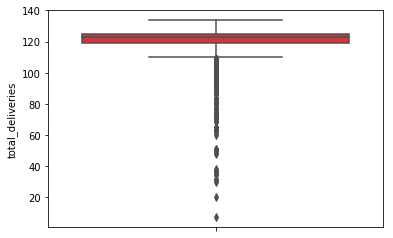

In [195]:
sns.boxplot(data=df_outcome, y='total_deliveries')

In [196]:
df_outcome.describe()

,match_id,total_Q1,total_Q2,total_Q3,total_Q4,player_out_Q1,player_out_Q2,player_out_Q3,player_out_Q4,total_runs,total_deliveries,dot_composition,total_wickets,win_vs_toss,winning_inning,Q1_run_frac,Q2_run_frac,Q3_run_frac,Q4_run_frac,Q1_wicket_frac,Q2_wicket_frac,Q3_wicket_frac,Q4_wicket_frac
count,1.510000e+03,1510.000000,1504.000000,1486.000000,1424.000000,1510.000000,1504.000000,1486.000000,1424.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1504.000000,1486.000000,1424.000000,1497.000000,1493.000000,1478.000000,1422.000000
mean,7.197906e+05,37.523841,36.649601,39.510094,44.187500,1.182119,1.144947,1.359354,2.317416,154.580795,118.509272,0.403978,5.845695,0.513907,0.496689,0.251224,0.240322,0.253765,0.275360,0.215483,0.208621,0.236511,0.361032
std,2.876590e+05,10.516062,10.315784,11.827644,16.199714,1.017708,0.999135,1.054126,1.568427,31.444731,13.634667,0.074354,2.468496,0.499972,0.500155,0.092915,0.066345,0.060594,0.082349,0.205536,0.203169,0.189570,0.203836
min,3.359820e+05,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.000000,0.205357,0.000000,0.000000,0.000000,0.085106,0.041667,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012112e+05,30.000000,30.000000,31.000000,34.000000,0.000000,0.000000,1.000000,1.000000,136.000000,119.000000,0.352115,4.000000,0.000000,0.000000,0.200296,0.195873,0.213853,0.230653,0.000000,0.000000,0.111111,0.250000
50%,5.980535e+05,37.000000,36.000000,38.000000,45.000000,1.000000,1.000000,1.000000,2.000000,157.000000,123.000000,0.400000,6.000000,1.000000,0.000000,0.239313,0.234483,0.250000,0.281690,0.200000,0.200000,0.222222,0.375000
75%,9.810005e+05,44.000000,43.000000,46.000000,54.000000,2.000000,2.000000,2.000000,3.000000,176.000000,125.000000,0.448000,8.000000,1.000000,1.000000,0.281690,0.274510,0.291836,0.330084,0.333333,0.333333,0.333333,0.500000
max,1.181768e+06,85.000000,83.000000,84.000000,112.000000,7.000000,6.000000,6.000000,8.000000,263.000000,134.000000,0.725806,10.000000,1.000000,1.000000,1.000000,0.603604,0.562500,0.520270,1.000000,1.000000,1.000000,1.000000


### On avg 154 runs are scored for 5.8 wickets. While the medians are 157 runs for 6 wickets

### If there is no value for either runs or wickets in an inning quarter, thats most probably because that session was no played. highly unlikely that a 5 over session didnt generate any wicket or any runs
Replace any missing values with the mean 

### Impute any missing values

In [197]:
df_outcome[df_outcome.total_runs.isna()]


,match_id,inning,total_Q1,total_Q2,total_Q3,total_Q4,player_out_Q1,player_out_Q2,player_out_Q3,player_out_Q4,total_runs,total_deliveries,dot_composition,total_wickets,batting_team,win_vs_toss,winning_inning,Q1_run_frac,Q2_run_frac,Q3_run_frac,Q4_run_frac,Q1_wicket_frac,Q2_wicket_frac,Q3_wicket_frac,Q4_wicket_frac


In [198]:
df_outcome.groupby(['winning_inning'],as_index=False)['total_runs'].agg({'avg':'mean','median':'median'})

,winning_inning,avg,median
0,0,147.444737,149.0
1,1,161.812000,164.0


### If playing first, the median winning score is 149 while that for batting second is 164

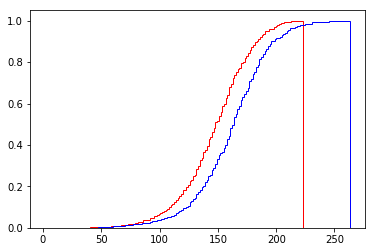

In [199]:
plt.hist(df_outcome.query('winning_inning==0')['total_runs'],density=True,color='red',bins=150,histtype='step',cumulative=True);
plt.hist(df_outcome.query('winning_inning==1')['total_runs'],density=True,color='blue',bins=150,histtype='step',cumulative=True);

In [200]:
df_outcome.columns

Index(['match_id', 'inning', 'total_Q1', 'total_Q2', 'total_Q3', 'total_Q4',
       'player_out_Q1', 'player_out_Q2', 'player_out_Q3', 'player_out_Q4',
       'total_runs', 'total_deliveries', 'dot_composition', 'total_wickets',
       'batting_team', 'win_vs_toss', 'winning_inning', 'Q1_run_frac',
       'Q2_run_frac', 'Q3_run_frac', 'Q4_run_frac', 'Q1_wicket_frac',
       'Q2_wicket_frac', 'Q3_wicket_frac', 'Q4_wicket_frac'],
      dtype='object')

In [ ]:
feature_cols = ['total_runs', 'total_deliveries', 'total_wickets','dot_composition', 'win_vs_toss',\
                'Q1_run_frac', 'Q2_run_frac','Q3_run_frac', 'Q4_run_frac',\
                'Q1_wicket_frac', 'Q2_wicket_frac','Q3_wicket_frac', 'Q4_wicket_frac']
# you want all rows, and the feature_cols' columns
X = df_outcome.loc[:, feature_cols]

y = df_outcome['winning_inning']


In [202]:
print(X.shape,y.shape)

(1510, 13) (1510,)


In [ ]:
X.isna().sum()

total_runs           0
total_deliveries     0
total_wickets        0
dot_composition      0
win_vs_toss          0
Q1_run_frac          0
Q2_run_frac          6
Q3_run_frac         24
Q4_run_frac         86
Q1_wicket_frac      13
Q2_wicket_frac      17
Q3_wicket_frac      32
Q4_wicket_frac      88
dtype: int64

In [203]:
X.Q4_wicket_frac.mean()

0.3610321367177903

# Data Modeling

# Create Model Pipelines

### Create a model to predict the winner of the game
#### The independent variables are the runs the team makes, the number of wickets the team loses, the number of deliveries and how many of those were dot balls
#### The momentum could also be a factor i.e. how each quarter of 5 overs panned out - if the first 5 overs and the next 5 overs had a lot of runs without the loss of a wicket, hey put a lot of pressure on the opponent
#### so these would need to be added to the model rather than just a total score



#### These variables would also need to be imputed if missing values are found - missing values for any of the run_frac or wicket_frac could only mean that those values are 0 - impute with strategy of constant and fill_value of 0
#### These should also be properly scaled 
#### While this would lead to a lot of potential variables, these can be reduced through principal components
#### This can be then modeed through different classifiers and the model hyperparameters can be optimized through gridsearch
#### All these sequential steps can be added to a pipeline (one for each classifier)

#### For each of the pipelines, do a GridSearchCV for the best hyper parameters
Store the best model parameters for each classifier separately

Select the best classifier based on accuracy and run-time

In [204]:
!pip install joblib

In [ ]:
def calc_metrics(model_object, X_test, y_test, start_timer, stop_timer):
  '''
  This function evaluates the performance of the model given the model, test values and training time
  INPUT: Model, X_test, y_test, start_time, end_time
  OUTPUT: A dictionary containing the key metrics such as accuracy, precision, recall, confusion_matrix, f1, and training time 
  '''
  y_pred = model_object.predict(X_test)
  
  report_accuracy = model_object.best_score_
  report_test_accuracy = accuracy_score(y_test, y_pred)
  report_conf_matrix = confusion_matrix(y_test, y_pred)
  report_precision_rate = precision_score(y_test, y_pred)
  report_recall_rate = recall_score(y_test, y_pred)
  report_f1 = f1_score(y_test, y_pred)
  
  performance_metrics = {'training_accuracy':report_accuracy,\
                         'training_time': stop_timer - start_timer,\
                         'test_accuracy': report_test_accuracy,\
                         'confusion_matrix': report_conf_matrix,\
                         'precision': report_precision_rate,\
                         'recall': report_recall_rate,\
                         'f1': report_f1\
                         
                        }
  return performance_metrics


In [207]:
# split the data set between training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reduce the number of principal compoenents to 2
pca_components = 2
start = timeit.default_timer()


# Construct pipelines for each including an Imputer, Scaler, PCA and classifier
pipe_logreg = Pipeline([('imp', SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)),\
                    ('scl', StandardScaler()),\
                    ('pca', PCA(n_components=pca_components)),
                    ('clf', LogisticRegression(random_state=42,solver='lbfgs'))\
                   ])

pipe_svm = Pipeline([('imp', SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)),\
                     ('scl', StandardScaler()),\
                     ('pca', PCA(n_components=pca_components)),\
                     ('clf', SVC(random_state=42))\
                    ])
			
pipe_decisiontree = Pipeline([('imp', SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)),\
                     ('scl', StandardScaler()),\
                     ('pca', PCA(n_components=pca_components)),\
                     ('clf', DecisionTreeClassifier(random_state=42))\
                   ])

pipe_adaboost = Pipeline([('imp', SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)),\
                     ('scl', StandardScaler()),\
                     ('pca', PCA(n_components=pca_components)),\
                     ('clf', AdaBoostClassifier(random_state=42))\
                   ])

pipe_randomforest = Pipeline([('imp', SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)),\
                     ('scl', StandardScaler()),\
                     ('pca', PCA(n_components=pca_components)),\
                     ('clf', RandomForestClassifier(random_state=42))\
                   ])

pipe_gradboost = Pipeline([('imp', SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)),\
                     ('scl', StandardScaler()),\
                     ('pca', PCA(n_components=pca_components)),\
                     ('clf', GradientBoostingClassifier(random_state=42))\
                   ])

pipe_mlp = Pipeline([('imp', SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)),\
                     ('scl', StandardScaler()),\
                     ('pca', PCA(n_components=pca_components)),\
                     ('clf', MLPClassifier(random_state=42, activation='relu', solver='adam', max_iter=300))\
                   ])


# List of pipelines for ease of iteration
pipelines = [pipe_logreg, pipe_svm, pipe_decisiontree, pipe_adaboost, pipe_randomforest, pipe_gradboost, pipe_mlp]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Support Vector Machine', 2: 'Decision Tree', 3: 'AdaBoost', 4: 'RandomForest', 5: 'GradientBoost', 6: 'MultiLayerPerceptron'}

# Set grid search params
grid_params = [{'clf__C': np.logspace(-5, 8, 20)},\
               
               {'clf__kernel': ['linear', 'rbf', 'poly'],\
                'clf__C': np.linspace(1,10,10),\
                'clf__gamma':[1e-4, 1e-3, 1e-2, 1e-1]},\
               
               {'clf__criterion': ['gini', 'entropy'],\
                'clf__min_samples_leaf': [1, 2, 3, 4, 5],\
                'clf__max_depth': [1, 2, 3, 4, 5],\
                'clf__min_samples_split': [1, 2, 3, 4, 5][1:],\
                'clf__presort': [True, False]},\
               
               {'clf__n_estimators': [10,20,30,40,50,60,70,80,90,100,150],\
                'clf__learning_rate': np.logspace(-5,0,15)},\
               
               {'clf__n_estimators': [10,20,30,40,50,60,70,80,90,100,150],\
                'clf__max_depth': [1,2,3,4,5,6,7,8,9,10]},\

               {'clf__n_estimators': [10,20,30,40,50,60,70,80,90,100,150],\
                'clf__learning_rate': np.logspace(-5,0,15)},\
               
               {'clf__hidden_layer_sizes': [(500, 10),(500, ),(400, 10),(400, ),(300, 10),(300, ),(200, 10),(200, ),(100, 10),(100, )],\
                'clf__learning_rate':['constant', 'invscaling', 'adaptive']}\
                            
             ]

model_file_names = ['logistic_regression.pkl','svm.pkl','decision_tree.pkl',\
                    'adaboost.pkl','random_forest.pkl','gradient_boos.pkl',\
                    'multi_layer_perceptron.pkl']

classifier_scores=[]

best_models=[]
# Fit the pipelines
for pipe, param, model_file in zip(pipelines, grid_params, model_file_names):
  
  # Start Timer for model fit
  model_start_time = timeit.default_timer()
  # Construct grid search
  gs = GridSearchCV(estimator=pipe,\
                    param_grid=param,\
                    scoring='accuracy',\
                    cv=5)
	# Fit using grid search
  gs.fit(X_train, y_train)
  # Best accuracy
  print('Best accuracy: %.3f' % gs.best_score_)
  # Best params
  print('\nBest params:\n', gs.best_params_)
  model_stop_time = timeit.default_timer()
  
  classifier_scores.append(calc_metrics(gs, X_test, y_test, model_start_time, model_stop_time))
  joblib.dump(gs.best_estimator_, model_file)
  best_models.append(model_file)

stop = timeit.default_timer()

print('Total Execution Time: ', stop - start)

df_model_performance = pd.DataFrame(classifier_scores, \
                                    index=['Logistic Regression', 'Support Vector Machine', \
                                           'Decision Tree', 'AdaBoost', 'RandomForest', \
                                           'GradientBoost', 'MultiLayerPerceptron'\
                                          ]\
                                   )
df_model_performance



Best accuracy: 0.695

Best params:
 {'clf__C': 0.00023357214690901214}
Best accuracy: 0.701

Best params:
 {'clf__C': 3.0, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
Best accuracy: 0.685

Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 2, 'clf__presort': True}
Best accuracy: 0.692

Best params:
 {'clf__learning_rate': 0.19306977288832497, 'clf__n_estimators': 30}
Best accuracy: 0.695

Best params:
 {'clf__max_depth': 3, 'clf__n_estimators': 50}
Best accuracy: 0.709

Best params:
 {'clf__learning_rate': 0.08483428982440726, 'clf__n_estimators': 40}
Best accuracy: 0.704

Best params:
 {'clf__hidden_layer_sizes': (200,), 'clf__learning_rate': 'constant'}
Total Execution Time:  510.1902435539996


,confusion_matrix,f1,precision,recall,test_accuracy,training_accuracy,training_time
Logistic Regression,"[[176, 52], [70, 155]]",0.717593,0.748792,0.688889,0.730684,0.695364,1.641312
Support Vector Machine,"[[173, 55], [63, 162]]",0.733032,0.746544,0.720000,0.739514,0.701041,27.666688
Decision Tree,"[[176, 52], [68, 157]]",0.723502,0.751196,0.697778,0.735099,0.684957,28.681468
AdaBoost,"[[165, 63], [55, 170]]",0.742358,0.729614,0.755556,0.739514,0.691580,110.803013
RandomForest,"[[166, 62], [55, 170]]",0.743982,0.732759,0.755556,0.741722,0.695364,61.070215
GradientBoost,"[[173, 55], [68, 157]]",0.718535,0.740566,0.697778,0.728477,0.708609,68.248573
MultiLayerPerceptron,"[[174, 54], [60, 165]]",0.743243,0.753425,0.733333,0.748344,0.703879,211.899235


In [208]:
df_model_performance.sort_values(by='test_accuracy',ascending=False)

,confusion_matrix,f1,precision,recall,test_accuracy,training_accuracy,training_time
MultiLayerPerceptron,"[[174, 54], [60, 165]]",0.743243,0.753425,0.733333,0.748344,0.703879,211.899235
RandomForest,"[[166, 62], [55, 170]]",0.743982,0.732759,0.755556,0.741722,0.695364,61.070215
Support Vector Machine,"[[173, 55], [63, 162]]",0.733032,0.746544,0.720000,0.739514,0.701041,27.666688
AdaBoost,"[[165, 63], [55, 170]]",0.742358,0.729614,0.755556,0.739514,0.691580,110.803013
Decision Tree,"[[176, 52], [68, 157]]",0.723502,0.751196,0.697778,0.735099,0.684957,28.681468
Logistic Regression,"[[176, 52], [70, 155]]",0.717593,0.748792,0.688889,0.730684,0.695364,1.641312
GradientBoost,"[[173, 55], [68, 157]]",0.718535,0.740566,0.697778,0.728477,0.708609,68.248573


In [209]:
y_test.mean()

0.4966887417218543

# Evaluate Results

# The MultiLayerPerceptron model gives a test_accuracy of ~75% while the rest of the models hover around 73% to 74%


### The naive accuracy was at 50% - so the model is able to predict the winner of an IPL match with 75% accuracy given a bunch of variables about the inning. i.e.


1.   Total number of runs scored
2.   Total deliveries faced
3.   Total wickets lost
4.   % of deliveries with no score i.e. dot balls
5.   Did the team win the toss
6.   % of runs scored in each quarter (4 columns)
7.   % of wickets lost in each quarter (4 columns)

#### Lets see for a bunch of generated values, what are the results

In [220]:
X_random_check = [[155, 123, 9, 0.4, 0, 0.23, 0.24, 0.23, 0.3, 0.333, 0.333, 0.333, 0.0],\
                  [155, 120, 9, 0.4, 0, 0.23, 0.24, 0.23, 0.3, 0.333, 0.333, 0.333, 0.0],\
                  [105, 123, 10, 0.6, 0, 0.23, 0.24, 0.23, 0.3, 0.333, 0.333, 0.333, 0.0],\
                  [243, 123, 2, 0.1, 0, 0.23, 0.24, 0.23, 0.3, 0.333, 0.333, 0.333, 0.0],\
                  [115, 123, 6, 0.6, 0, 0.23, 0.24, 0.23, 0.3, 0.333, 0.333, 0.333, 0.0]]
joblib.load('multi_layer_perceptron.pkl').predict_proba(X_random_check)[:,1]*100


array([46.77645522, 50.19047777,  2.24581456, 92.85388107, 15.50563078])

Using 2 principal components in the pipeline reduces the total varaibles to 2 from 13. These 2 principal components are able to explain 0.9958 of the data which seems to be good enough

In [ ]:
PCA(n_components=2).fit((SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(X_test))).explained_variance_ratio_

0.9958147001031001